### Import libraries





In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from pandas_profiling import ProfileReport
%matplotlib inline



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import dataset 

In [5]:
data = '..data/weatherAUS.csv'
df = pd.read_csv(data)

In [6]:
df.dropna(subset=['RainTomorrow'], inplace=True)

### Exploratory Data Analysis



#### Dataset Overview

In [ ]:
df.shape

(142193, 23)

In [ ]:
df.head()

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No

[5 rows x 23 columns]

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
# Statistic properties of dataset
df.describe()

MinTemp        MaxTemp  ...        Temp9am        Temp3pm
count  141556.000000  141871.000000  ...  141289.000000  139467.000000
mean       12.186400      23.226784  ...      16.987509      21.687235
std         6.403283       7.117618  ...       6.492838       6.937594
min        -8.500000      -4.800000  ...      -7.200000      -5.400000
25%         7.600000      17.900000  ...      12.300000      16.600000
50%        12.000000      22.600000  ...      16.700000      21.100000
75%        16.800000      28.200000  ...      21.600000      26.400000
max        33.900000      48.100000  ...      40.200000      46.700000

[8 rows x 16 columns]

#### Univariate Analysis

##### Explore **RainTomorrow** target variable

Check for missing value

In [ ]:
df['RainTomorrow'].isnull().sum()

0

View unique values

In [ ]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

View the frequency distribution of values

In [ ]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

View percentage of frequency distribution of values

In [ ]:
df['RainTomorrow'].value_counts()/len(df)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

Visualize frequency distribution of **RainTomorrow** variable

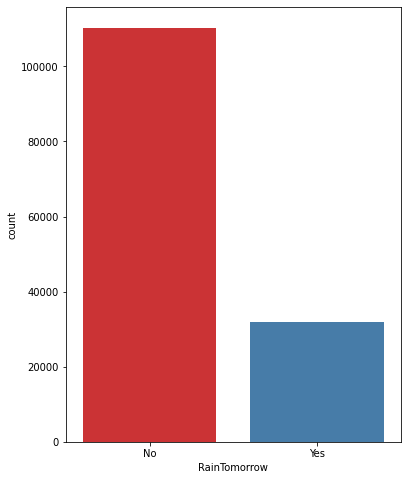

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

##### Explore Categorical Variables

In [ ]:

categorical = [col for col in df.columns if df[col].dtypes == 'O']

categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
df[categorical].head()

Date Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0  2008-12-01   Albury           W          W        WNW        No           No
1  2008-12-02   Albury         WNW        NNW        WSW        No           No
2  2008-12-03   Albury         WSW          W        WSW        No           No
3  2008-12-04   Albury          NE         SE          E        No           No
4  2008-12-05   Albury           W        ENE         NW        No           No

Check for missing values

In [ ]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

Frequency count of categorical variables

In [ ]:
for var in categorical: 
    
    print(df[var].value_counts())

2016-05-17    49
2014-11-06    49
2013-07-31    49
2013-11-27    49
2013-06-17    49
              ..
2007-11-16     1
2007-11-25     1
2008-01-15     1
2007-12-10     1
2007-11-05     1
Name: Date, Length: 3436, dtype: int64
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964

Number of labels in categorical variables

In [ ]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


###### Explore **Location** variable

Check for number of labels and unique values

In [ ]:
# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')


Location contains 49 labels


In [ ]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Check frequency distribution of values 

In [ ]:
df.Location.value_counts(normalize=True)

Canberra            0.024038
Sydney              0.023468
Perth               0.022455
Darwin              0.022448
Hobart              0.022420
Brisbane            0.022230
Adelaide            0.021731
Bendigo             0.021337
Townsville          0.021330
AliceSprings        0.021316
MountGambier        0.021309
Ballarat            0.021295
Launceston          0.021295
Albany              0.021211
Albury              0.021175
MelbourneAirport    0.021161
PerthAirport        0.021161
Mildura             0.021147
SydneyAirport       0.021133
Nuriootpa           0.021112
Sale                0.021098
Watsonia            0.021091
Tuggeranong         0.021084
Portland            0.021070
Woomera             0.021028
Cobar               0.021014
Cairns              0.021014
Wollongong          0.020979
GoldCoast           0.020957
WaggaWagga          0.020929
NorfolkIsland       0.020845
Penrith             0.020845
Newcastle           0.020782
SalmonGums          0.020782
CoffsHarbour  

Visualize frequency distribution

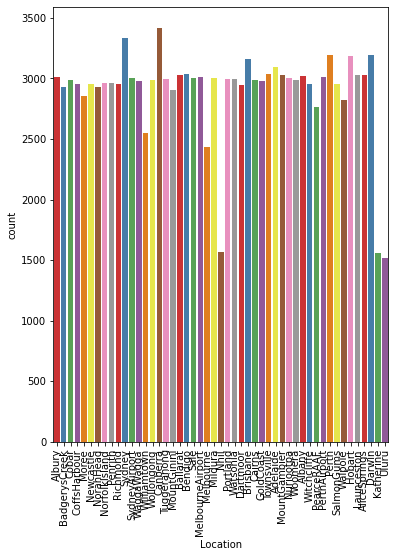

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="Location", data=df, palette="Set1")
plt.xticks(rotation=90)

plt.show()

###### Explore **WindGustDir** variable

Check for number of labels and unique values

In [ ]:
# print number of labels in Location variable

print('WindGustDir contains', len(df.WindGustDir.unique()), 'labels')


WindGustDir contains 17 labels


In [ ]:
df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

Check frequency distribution of values 

In [ ]:
df.WindGustDir.value_counts(normalize=True)

W      0.073610
SE     0.070065
E      0.068273
N      0.067987
SSE    0.067686
S      0.067355
WSW    0.066994
SW     0.066211
SSW    0.064804
WNW    0.060709
NW     0.060235
ENE    0.060152
ESE    0.054981
NE     0.053137
NNW    0.049382
NNE    0.048418
Name: WindGustDir, dtype: float64

Visualize frequency distribution

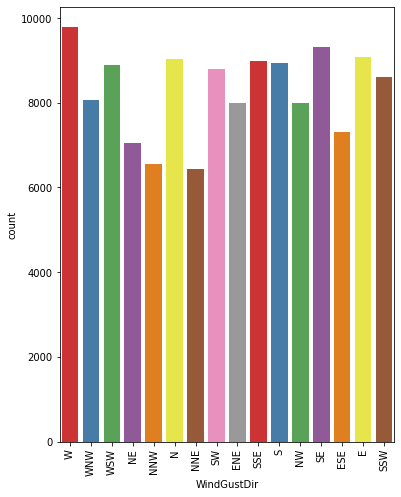

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="WindGustDir", data=df, palette="Set1")
plt.xticks(rotation=90)

plt.show()

###### Explore **WindDir9am** variable

Check for number of labels and unique values

In [ ]:
# print number of labels in Location variable

print('WindDir9am contains', len(df.WindDir9am.unique()), 'labels')


WindDir9am contains 17 labels


In [ ]:
df.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

Check frequency distribution of values 

In [ ]:
df.WindDir9am.value_counts(normalize=True)

N      0.086193
SE     0.069315
E      0.068271
SSE    0.067832
NW     0.064700
S      0.064253
W      0.062491
SW     0.062317
NNE    0.060130
NNW    0.059313
ENE    0.058519
ESE    0.057180
NE     0.056945
SSW    0.056347
WNW    0.054426
WSW    0.051770
Name: WindDir9am, dtype: float64

Visualize frequency distribution

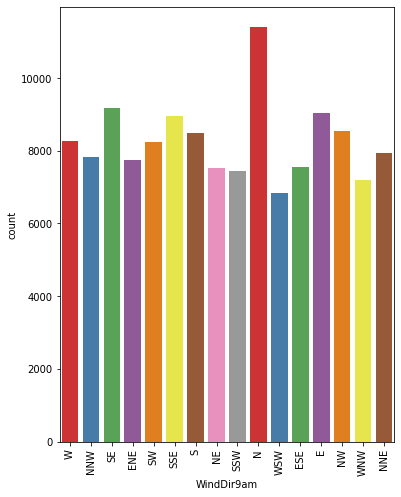

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="WindDir9am", data=df, palette="Set1")
plt.xticks(rotation=90)

plt.show()

###### Explore **WindDir3pm** variable

Check for number of labels and unique values

In [ ]:
# print number of labels in Location variable

print('WindDir3pm contains', len(df.WindDir3pm.unique()), 'labels')


WindDir3pm contains 17 labels


In [ ]:
df.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

Check frequency distribution of values 

In [ ]:
df.WindDir3pm.value_counts(normalize=True)

SE     0.077036
W      0.071604
S      0.069342
WSW    0.067399
SW     0.066337
SSE    0.066048
N      0.062616
WNW    0.062537
NW     0.061178
ESE    0.060557
E      0.060268
NE     0.058982
SSW    0.057869
NNW    0.055868
ENE    0.055803
NNE    0.046556
Name: WindDir3pm, dtype: float64

Visualize frequency distribution

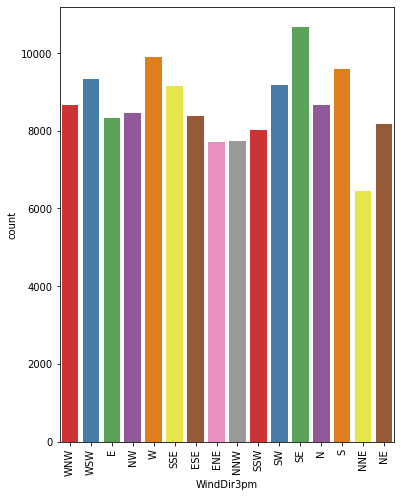

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="WindDir3pm", data=df, palette="Set1")
plt.xticks(rotation=90)

plt.show()

###### Explore **RainToday** variable

Check for number of labels and unique values

In [ ]:
# print number of labels in Location variable

print('RainToday contains', len(df.WindDir9am.unique()), 'labels')


RainToday contains 17 labels


In [ ]:
df.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

Check frequency distribution of values 

In [ ]:
df.RainToday.value_counts(normalize=True)

No     0.776577
Yes    0.223423
Name: RainToday, dtype: float64

Visualize frequency distribution

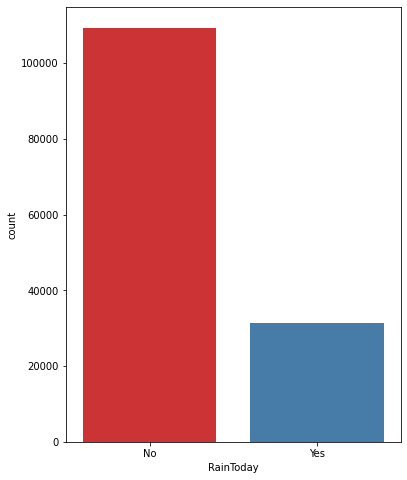

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainToday", data=df, palette="Set1")
plt.show()

##### Explore Numerical Variables

In [ ]:
# display numerical variables

numerical = [col for col in df.columns if df[col].dtypes != 'O']
print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
# view the numerical variables
df[numerical].head()

MinTemp  MaxTemp  Rainfall  ...  Cloud3pm  Temp9am  Temp3pm
0     13.4     22.9       0.6  ...       NaN     16.9     21.8
1      7.4     25.1       0.0  ...       NaN     17.2     24.3
2     12.9     25.7       0.0  ...       2.0     21.0     23.2
3      9.2     28.0       0.0  ...       NaN     18.1     26.5
4     17.5     32.3       1.0  ...       8.0     17.8     29.7

[5 rows x 16 columns]

**Summary of numerical variables** 

* There are 16 numerical variables.
* These are given by MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am and Temp3pm.
* All of the numerical variables are of continuous type.

**Check for missing values in numerical variables**

In [ ]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

**Outliers in numerial variables**

View summary statistics in numerical variables

In [ ]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  ...  Cloud3pm   Temp9am   Temp3pm
count  141556.0  141871.0  140787.0  ...   85099.0  141289.0  139467.0
mean       12.0      23.0       2.0  ...       5.0      17.0      22.0
std         6.0       7.0       8.0  ...       3.0       6.0       7.0
min        -8.0      -5.0       0.0  ...       0.0      -7.0      -5.0
25%         8.0      18.0       0.0  ...       2.0      12.0      17.0
50%        12.0      23.0       0.0  ...       5.0      17.0      21.0
75%        17.0      28.0       1.0  ...       7.0      22.0      26.0
max        34.0      48.0     371.0  ...       9.0      40.0      47.0

[8 rows x 16 columns] 2


###### Draw boxplots to visualise outliers

Text(0, 0.5, 'WindSpeed3pm')

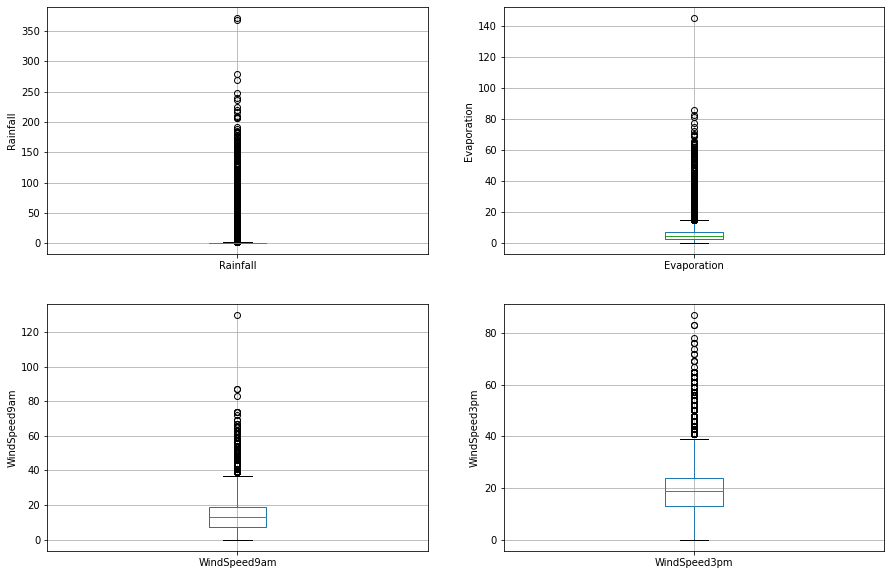

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'WindGustSpeed')

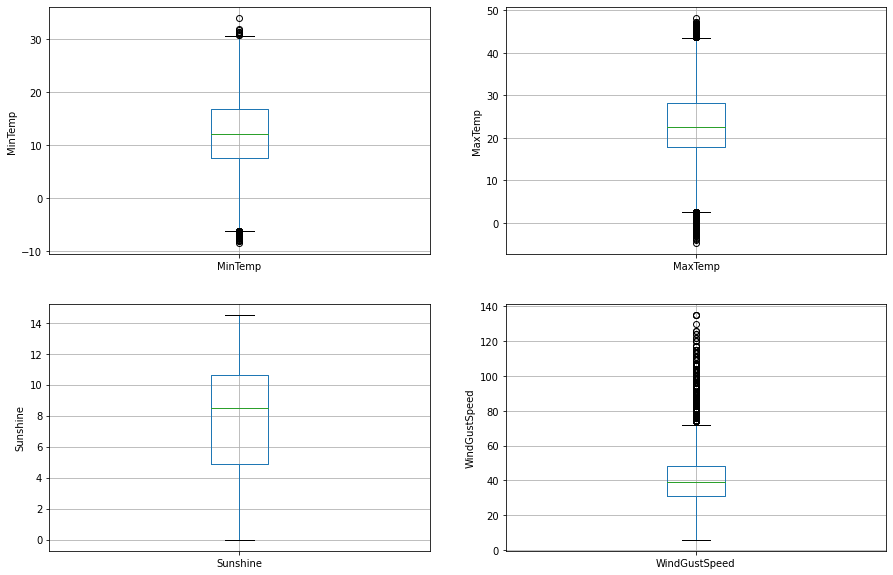

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')

plt.subplot(2,2,2)
fig = df.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Sunshine')
fig.set_title('')
fig.set_ylabel('Sunshine')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

Text(0, 0.5, 'Pressure3pm')

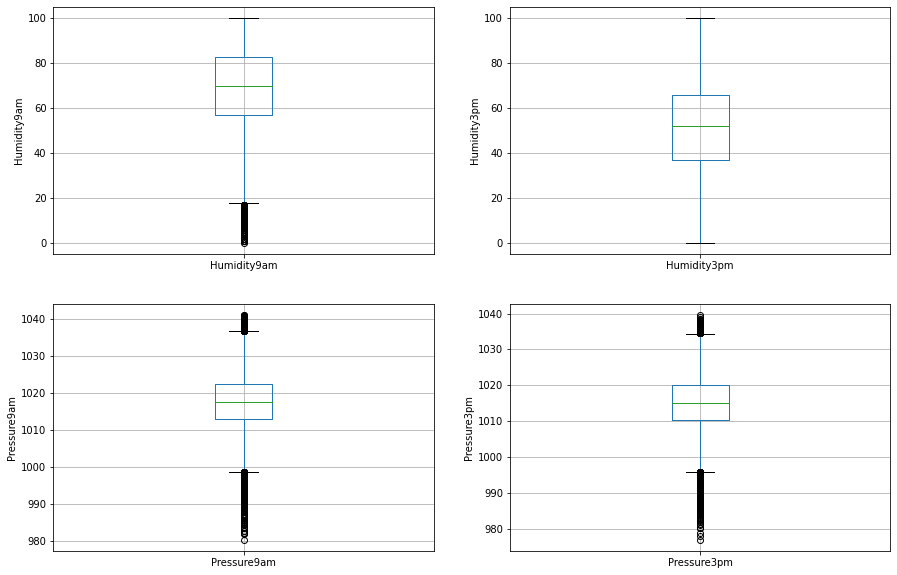

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Humidity9am')
fig.set_title('')
fig.set_ylabel('Humidity9am')

plt.subplot(2,2,2)
fig = df.boxplot(column='Humidity3pm')
fig.set_title('')
fig.set_ylabel('Humidity3pm')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Pressure9am')
fig.set_title('')
fig.set_ylabel('Pressure9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Pressure3pm')
fig.set_title('')
fig.set_ylabel('Pressure3pm')

Text(0, 0.5, 'Temp3pm')

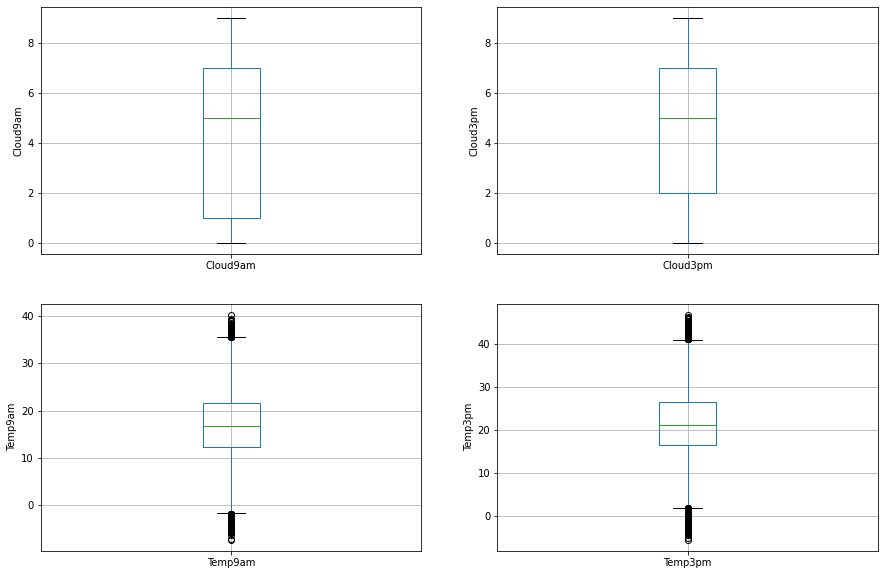

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Cloud9am')
fig.set_title('')
fig.set_ylabel('Cloud9am')

plt.subplot(2,2,2)
fig = df.boxplot(column='Cloud3pm')
fig.set_title('')
fig.set_ylabel('Cloud3pm')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Temp9am')
fig.set_title('')
fig.set_ylabel('Temp9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Temp3pm')
fig.set_title('')
fig.set_ylabel('Temp3pm')

###### Plot histogram to check for distribution

Text(0.5, 0, 'WindSpeed3pm')

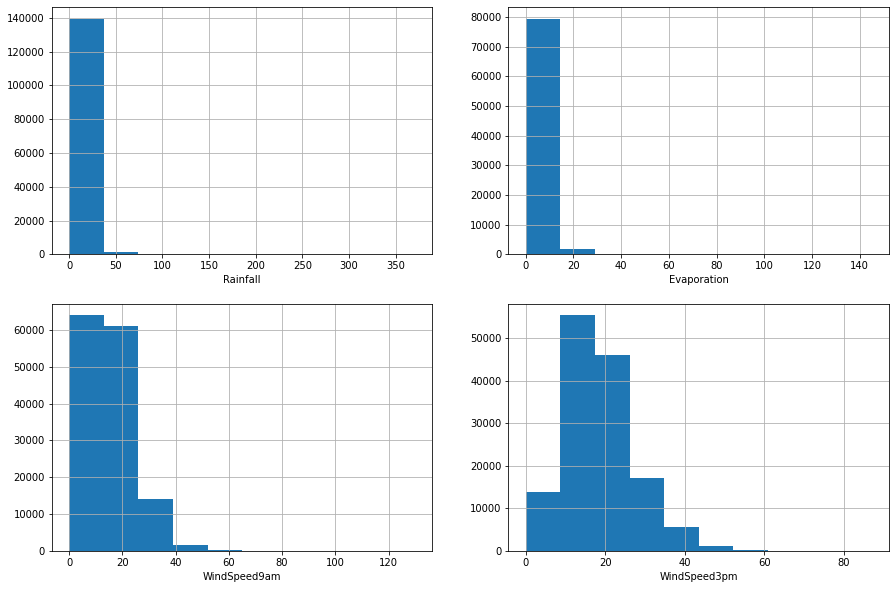

In [ ]:


plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')



plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')



plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')



plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')


Text(0.5, 0, 'WindGustSpeed')

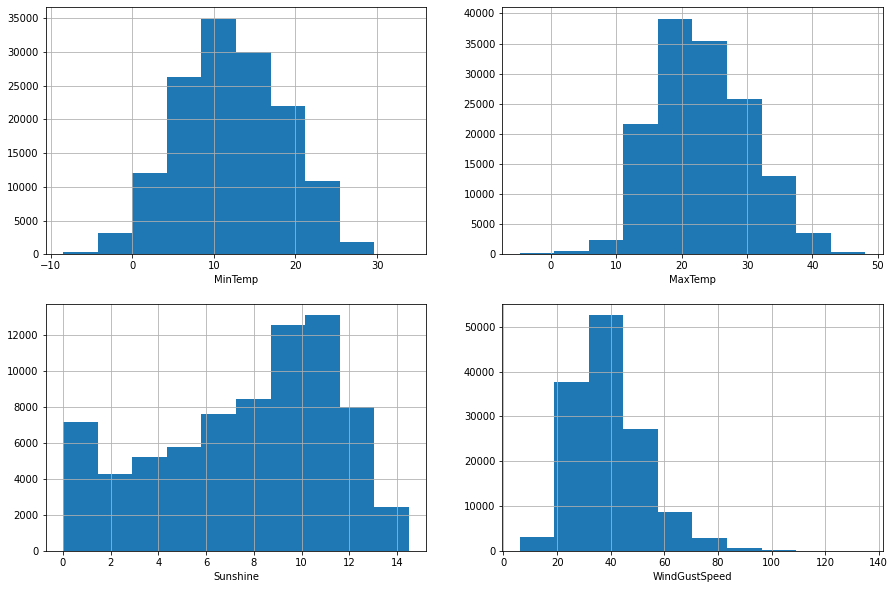

In [ ]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.MinTemp.hist(bins=10)
fig.set_xlabel('MinTemp')



plt.subplot(2, 2, 2)
fig = df.MaxTemp.hist(bins=10)
fig.set_xlabel('MaxTemp')



plt.subplot(2, 2, 3)
fig = df.Sunshine.hist(bins=10)
fig.set_xlabel('Sunshine')



plt.subplot(2, 2, 4)
fig = df.WindGustSpeed.hist(bins=10)
fig.set_xlabel('WindGustSpeed')


Text(0.5, 0, 'Pressure3pm')

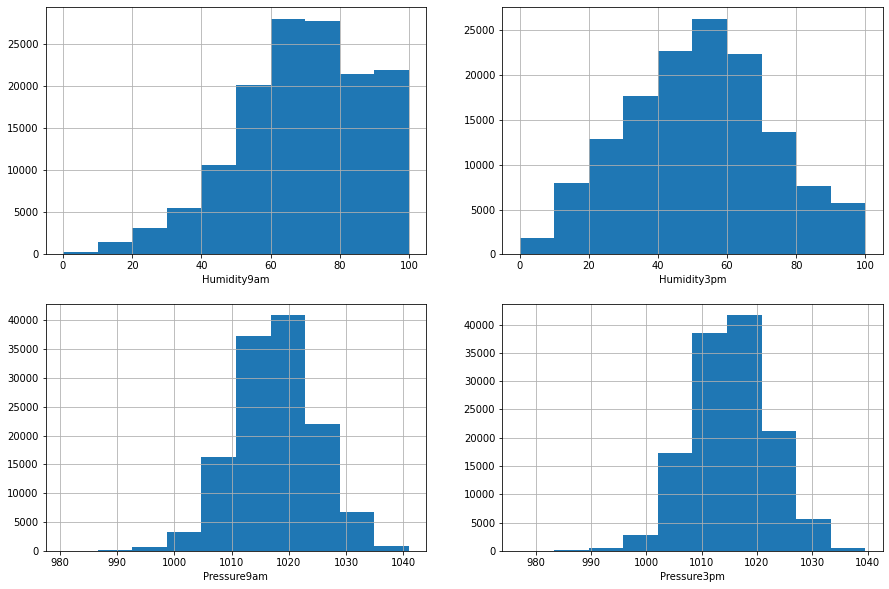

In [ ]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Humidity9am.hist(bins=10)
fig.set_xlabel('Humidity9am')



plt.subplot(2, 2, 2)
fig = df.Humidity3pm.hist(bins=10)
fig.set_xlabel('Humidity3pm')



plt.subplot(2, 2, 3)
fig = df.Pressure9am.hist(bins=10)
fig.set_xlabel('Pressure9am')



plt.subplot(2, 2, 4)
fig = df.Pressure3pm.hist(bins=10)
fig.set_xlabel('Pressure3pm')


Text(0.5, 0, 'Temp3pm')

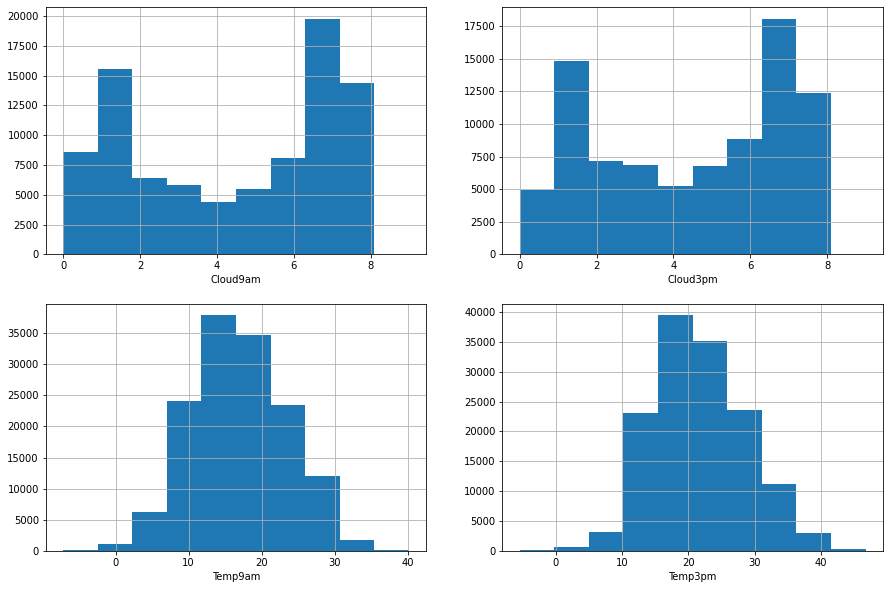

In [ ]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Cloud9am.hist(bins=10)
fig.set_xlabel('Cloud9am')



plt.subplot(2, 2, 2)
fig = df.Cloud3pm.hist(bins=10)
fig.set_xlabel('Cloud3pm')



plt.subplot(2, 2, 3)
fig = df.Temp9am.hist(bins=10)
fig.set_xlabel('Temp9am')



plt.subplot(2, 2, 4)
fig = df.Temp3pm.hist(bins=10)
fig.set_xlabel('Temp3pm')


#### Multivariate Analysis

##### Catplot to show relationship between variables and target variable

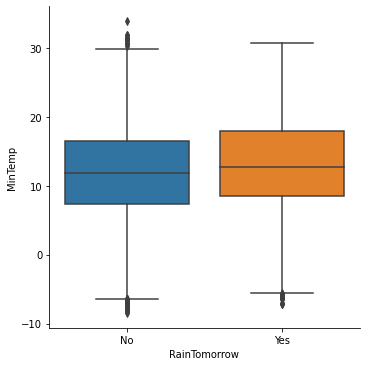

In [ ]:
sns.catplot(x="RainTomorrow", y="MinTemp", kind="box", data=df)

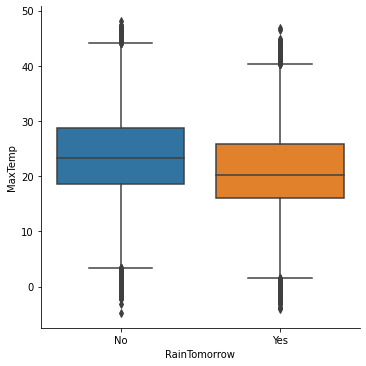

In [ ]:
sns.catplot(x="RainTomorrow", y="MaxTemp", kind="box", data=df)

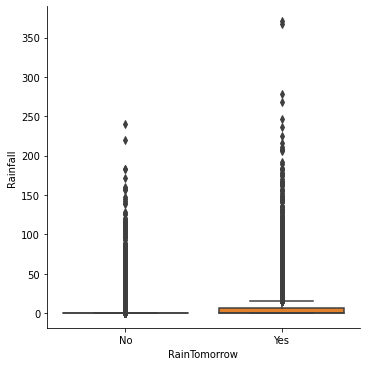

In [ ]:
sns.catplot(x="RainTomorrow", y="Rainfall", kind="box", data=df)

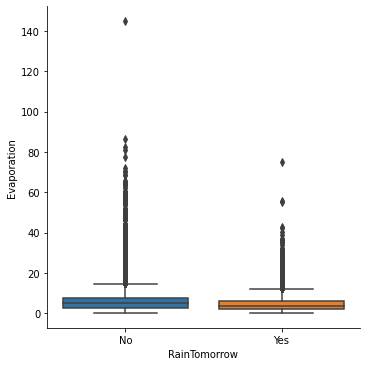

In [ ]:
sns.catplot(x="RainTomorrow", y="Evaporation", kind="box", data=df)

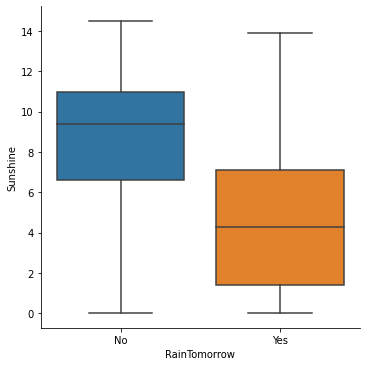

In [ ]:
sns.catplot(x="RainTomorrow", y="Sunshine", kind="box", data=df)

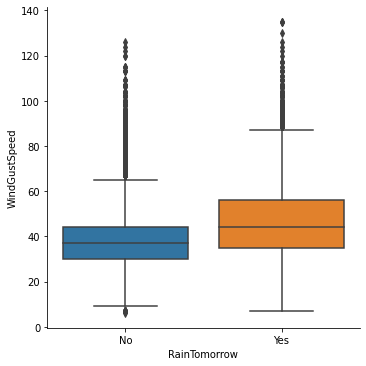

In [ ]:
sns.catplot(x="RainTomorrow", y="WindGustSpeed", kind="box", data=df)

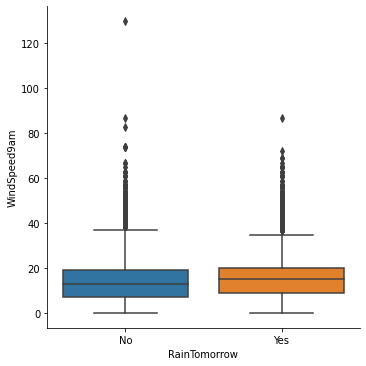

In [ ]:
sns.catplot(x="RainTomorrow", y="WindSpeed9am", kind="box", data=df)

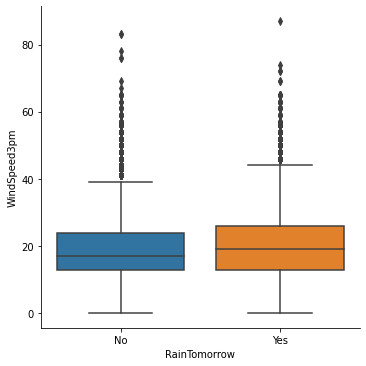

In [ ]:
sns.catplot(x="RainTomorrow", y="WindSpeed3pm", kind="box", data=df)

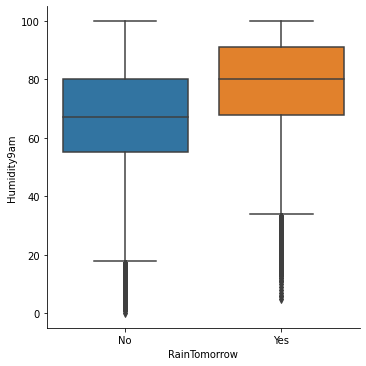

In [ ]:
sns.catplot(x="RainTomorrow", y="Humidity9am", kind="box", data=df)

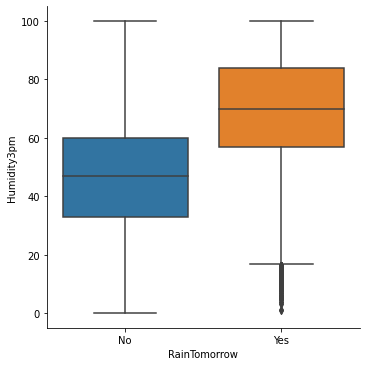

In [ ]:
sns.catplot(x="RainTomorrow", y="Humidity3pm", kind="box", data=df)

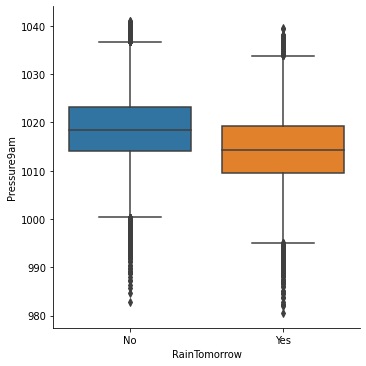

In [ ]:
sns.catplot(x="RainTomorrow", y="Pressure9am", kind="box", data=df)

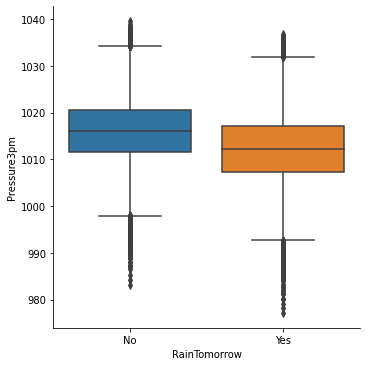

In [ ]:
sns.catplot(x="RainTomorrow", y="Pressure3pm", kind="box", data=df)

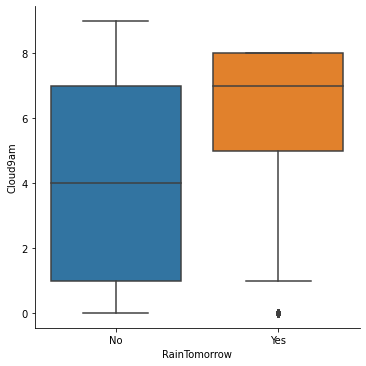

In [ ]:
sns.catplot(x="RainTomorrow", y="Cloud9am", kind="box", data=df)

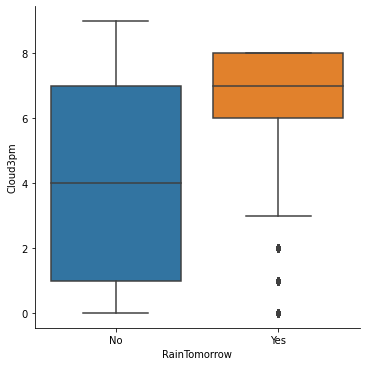

In [ ]:
sns.catplot(x="RainTomorrow", y="Cloud3pm", kind="box", data=df)

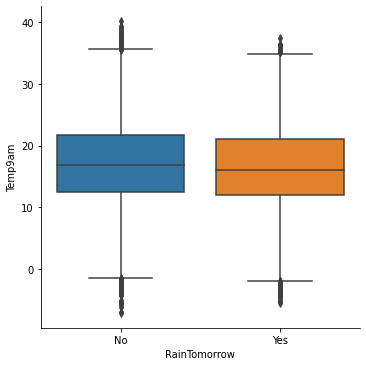

In [ ]:
sns.catplot(x="RainTomorrow", y="Temp9am", kind="box", data=df)

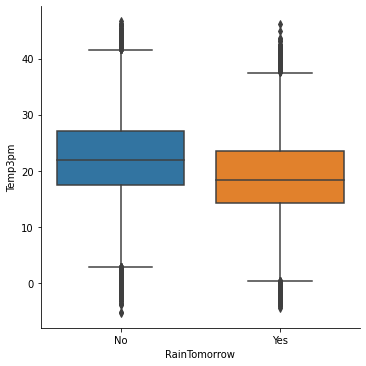

In [ ]:
sns.catplot(x="RainTomorrow", y="Temp3pm", kind="box", data=df)

##### Heat Map

In [ ]:
correlation = df.corr()

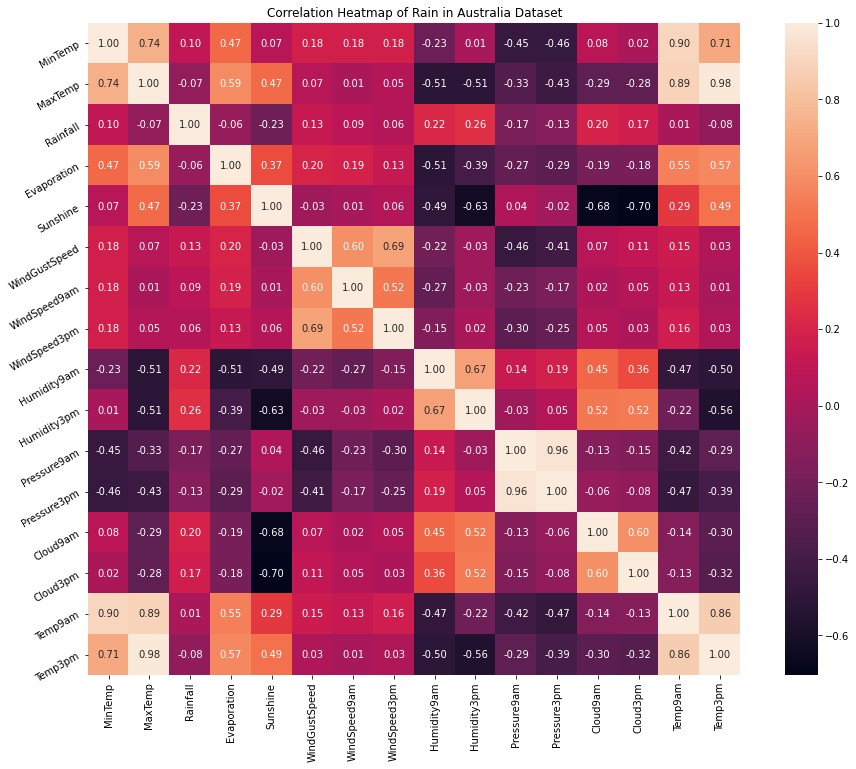

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Interpretation
* MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

* MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

* MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

* MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

* MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

* WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

* Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

* Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

### Feature Engineering

#### Extract month, day and year from Date variable

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

# extract month from date

df['Month'] = df['Date'].dt.month

# extract day from date

df['Day'] = df['Date'].dt.day

In [8]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [9]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  ...  RainTomorrow  Year Month  Day
0   Albury     13.4     22.9       0.6  ...            No  2008    12    1
1   Albury      7.4     25.1       0.0  ...            No  2008    12    2
2   Albury     12.9     25.7       0.0  ...            No  2008    12    3
3   Albury      9.2     28.0       0.0  ...            No  2008    12    4
4   Albury     17.5     32.3       1.0  ...            No  2008    12    5

[5 rows x 25 columns]

#### Detect outliers range for numerical variable

In [10]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [11]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [12]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


#### Declare feature vector and target variable and split data into train and test set

In [13]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((113754, 24), (28439, 24))

In [16]:
y.value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

#### Get categorical and numerical columns

In [17]:
categorical = [col for col in X.columns if X[col].dtypes == 'O']

In [18]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [19]:
numerical = [col for col in X.columns if X[col].dtypes != 'O']


In [20]:
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

#### Engineering missing values in numerical variables

In [21]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [22]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

In [23]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)  

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [24]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [25]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

#### Engineering missing values in categorical variables

In [26]:

X_train[categorical].isnull().sum()

Location          0
WindGustDir    7407
WindDir9am     7978
WindDir3pm     3008
RainToday      1139
dtype: int64

In [27]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2.loc[:]['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2.loc[:]['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2.loc[:]['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2.loc[:]['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [28]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [29]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

#### Engineering outliers in numerical variable

In [30]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3.loc[:]['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3.loc[:]['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3.loc[:]['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3.loc[:]['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [31]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [32]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [33]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [34]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

#### Encode categorical variables

In [35]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)



/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [36]:
X_train.head()

Location  MinTemp  MaxTemp  Rainfall  ...  RainToday_1  Year Month  Day
113462   Witchcliffe     13.9     22.6       0.2  ...            1  2014     4   25
89638         Cairns     22.4     29.4       2.0  ...            0  2015    11    2
138130  AliceSprings      9.7     36.2       0.0  ...            1  2014    10   19
87898         Cairns     20.5     30.1       0.0  ...            1  2010    10   30
16484      Newcastle     16.8     29.2       0.0  ...            1  2012    11    8

[5 rows x 25 columns]

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [38]:
y_train 

array([0, 0, 0, ..., 0, 0, 1])

In [39]:
# X = pd.concat([X[numerical], X[['RainToday_0', 'RainToday_1']],
#                      pd.get_dummies(X, columns=["Location", "WindGustDir", "WindDir9am", "WindDir3pm"])], 
#                      axis=1)
# X_dummy = pd.get_dummies(X,  columns=["Location"])
X_train = pd.get_dummies(X_train,  columns=["Location", "WindGustDir", "WindDir9am", "WindDir3pm"])
X_test = pd.get_dummies(X_test,  columns=["Location", "WindGustDir", "WindDir9am", "WindDir3pm"])

# X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
#                      pd.get_dummies(X_train.Location), 
#                      pd.get_dummies(X_train.WindGustDir),
#                      pd.get_dummies(X_train.WindDir9am),
#                      pd.get_dummies(X_train.WindDir3pm)], axis=1)


In [40]:
X_train.head()

MinTemp  MaxTemp  ...  WindDir3pm_WNW  WindDir3pm_WSW
113462     13.9     22.6  ...               0               0
89638      22.4     29.4  ...               0               0
138130      9.7     36.2  ...               0               0
87898      20.5     30.1  ...               0               0
16484      16.8     29.2  ...               0               0

[5 rows x 118 columns]

In [41]:
X_test.head()

MinTemp  MaxTemp  ...  WindDir3pm_WNW  WindDir3pm_WSW
88578      17.4     29.0  ...               0               0
59016       6.8     14.4  ...               0               0
127049     10.1     15.4  ...               0               0
120886     14.4     33.4  ...               0               0
136649      6.8     14.3  ...               0               0

[5 rows x 118 columns]

#### Feature scaling 

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_transformed = scaler.fit_transform(X_train)

X_test_transformed = scaler.transform(X_test)

In [43]:
X_train_transformed_split, X_val_transformed, y_train_split, y_val = train_test_split(X_train_transformed, y_train, test_size=0.2, random_state = 0)

#### Save input data and labels to csv files

In [44]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)
y_train_df = pd.DataFrame(y_train, columns=['RainTomorrow']).reset_index(drop=True)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=X_test.columns)
y_test_df = pd.DataFrame(y_test, columns=['RainTomorrow']).reset_index(drop=True)


In [45]:
X_train_transformed_df.head()

MinTemp   MaxTemp  Rainfall  ...  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW
0  0.524941  0.517958    0.0625  ...           0.0             0.0             0.0
1  0.726841  0.646503    0.6250  ...           0.0             0.0             0.0
2  0.425178  0.775047    0.0000  ...           0.0             0.0             0.0
3  0.681710  0.659735    0.0000  ...           0.0             0.0             0.0
4  0.593824  0.642722    0.0000  ...           0.0             0.0             0.0

[5 rows x 118 columns]

In [46]:
y_train_df 

RainTomorrow
0                  0
1                  0
2                  0
3                  0
4                  1
...              ...
113749             0
113750             0
113751             0
113752             0
113753             1

[113754 rows x 1 columns]

In [47]:
# X_train_transformed_df.to_csv('X_train_origin.csv', index=False)
y_train_df.to_csv('y_train_origin.csv', index=False)

### Modeling

#### Default Configuration for 3 models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
log_reg = LogisticRegression(max_iter=10000, random_state=1)
linear_svm = LinearSVC(max_iter=10000, random_state=1)
kernel_svm = SVC(random_state=1)
tree_clf = DecisionTreeClassifier(random_state=1)

In [ ]:
_ = log_reg.fit(X_train_transformed, y_train)
_ = linear_svm.fit(X_train_transformed, y_train)
_ = kernel_svm.fit(X_train_tranformed, y_train)
_ = tree_clf.fit(X_train_transformed, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred_log = log_reg.predict(X_test_transformed)
y_pred_linear_svm = linear_svm.predict(X_test_transformed)
y_pred_tree = tree_clf.predict(X_test_transformed)

In [ ]:
confusion_matrix(y_pred_log, y_test)

array([[20891,  3085],
       [ 1176,  3287]])

In [ ]:
print(classification_report(y_pred_log, y_test))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     23976
           1       0.52      0.74      0.61      4463

    accuracy                           0.85     28439
   macro avg       0.73      0.80      0.76     28439
weighted avg       0.88      0.85      0.86     28439



### Hyperparameter tuning

#### Script for hyperparameter tuning

In [48]:
import time 
from tqdm import tqdm
import os 
import pickle 
import itertools

In [49]:

def save_checkpoint(model, output_dir, filename):
    if not os.path.isfile(os.path.join(output_dir, filename)):
        with open(os.path.join(output_dir, filename), 'wb') as f:
            print('Saving model information to {}'.format(os.path.join(output_dir, filename)))
            pickle.dump(model, f)
def load_checkpoint(output_dir, filename):
    if os.path.isfile(os.path.join(output_dir, filename)):
        print('Loading model information from {}'.format(os.path.join(output_dir, filename)))
        with open(os.path.join(output_dir, filename), 'rb') as f:
            return pickle.load(f)  
    return None  

def train(model_name, params, X_train, X_val, y_train, y_val, output_dir, prefix):
    train_scores = []
    val_scores = []
    fit_time = []
    models = []
    best_train_score = 0
    best_val_score = 0
    best_fit_time = None
    best_model = None 
    keys, values = zip(*params.items())
    params_combination = [dict(zip(keys, v)) for v in itertools.product(*values)]
    print(params_combination)
    for params_comb in tqdm(params_combination):
        print()
        filename = prefix
        for key, value in params_comb.items():
            filename += key + '_' + str(value) + '_'
            print('{}: {}'.format(key, value)) 
        filename = filename[:-1] + '.pkl' 
        checkpoint_model = load_checkpoint(output_dir, filename)
        if checkpoint_model is not None: 
            continue
        if model_name == 'logistic_regression':
            model = LogisticRegression(max_iter=10000)
        elif model_name == 'linear_svm':
            model = LinearSVC(max_iter=10000)
        elif model_name == 'rbf_svm':
            model = SVC()
        elif model_name == 'sigmoid_svm':
            model = SVC(kernel='sigmoid')
        elif model_name == 'poly_svm':
            model = SVC(kernel='poly')
        else:
            model = DecisionTreeClassifier()
        model.set_params(**params_comb)
        start = time.time()
        _ = model.fit(X_train, y_train)
        models.append(model)
        ft = time.time() - start
        fit_time.append(ft)
        train_score = model.score(X_train, y_train)
        val_score = model.score(X_val, y_val)
        train_scores.append(train_score)
        model_info = {"model": model, "train_score": train_score, "validation_score": val_score, "fit_time": ft}
        save_checkpoint(model_info, output_dir, filename)
        val_scores.append(val_score)
        if (val_score > best_val_score):
            best_train_score = train_score
            best_val_score = val_score 
            best_fit_time = ft
            best_model = model 
        print('Train score: {}'.format(train_score))
        print('Validation score: {}'.format(val_score))
        print('-'*100)
    best_model_info = {"model": best_model, "train_score": best_train_score, "validation_score": best_val_score, "fit_time": best_fit_time}
    save_checkpoint(best_model_info, output_dir, "best_model.pkl")
    return {"best_model": best_model, "best_score": best_val_score,"models": models, "train_scores": train_scores, "validation_scores": val_scores, "fit_time": fit_time}



#### Logistic Regression

In [ ]:
params = {'C':[1e-4, 5e-4, 1e-3, 5e-3, 0.01, 0.05, 0.1, 0.5, 1, 10, 100, 1000, 10000]}
output_dir = 'grid_search_logistic'

In [ ]:
result = train('logistic_regression',params, X_train_split, X_val, y_train_split, y_val, output_dir, 'logistic_')

  0%|          | 0/13 [00:00<?, ?it/s]

[{'C': 0.0001}, {'C': 0.0005}, {'C': 0.001}, {'C': 0.005}, {'C': 0.01}, {'C': 0.05}, {'C': 0.1}, {'C': 0.5}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}, {'C': 10000}]

C: 0.0001


  8%|▊         | 1/13 [00:01<00:13,  1.13s/it]

Saving model information to grid_search_logistic/logistic_C_0.0001.pkl
Train score: 0.7753700427458435
Validation score: 0.7774603314140037
----------------------------------------------------------------------------------------------------

C: 0.0005


 15%|█▌        | 2/13 [00:02<00:13,  1.19s/it]

Saving model information to grid_search_logistic/logistic_C_0.0005.pkl
Train score: 0.8088085008186543
Validation score: 0.8103380071205661
----------------------------------------------------------------------------------------------------

C: 0.001


 23%|██▎       | 3/13 [00:03<00:12,  1.28s/it]

Saving model information to grid_search_logistic/logistic_C_0.001.pkl
Train score: 0.8178631473687681
Validation score: 0.8165794910113842
----------------------------------------------------------------------------------------------------

C: 0.005


 31%|███       | 4/13 [00:06<00:14,  1.63s/it]

Saving model information to grid_search_logistic/logistic_C_0.005.pkl
Train score: 0.8368185664208873
Validation score: 0.8365346578172388
----------------------------------------------------------------------------------------------------

C: 0.01


 38%|███▊      | 5/13 [00:09<00:16,  2.06s/it]

Saving model information to grid_search_logistic/logistic_C_0.01.pkl
Train score: 0.8406865707723922
Validation score: 0.8407102984484198
----------------------------------------------------------------------------------------------------

C: 0.05


 46%|████▌     | 6/13 [00:14<00:21,  3.00s/it]

Saving model information to grid_search_logistic/logistic_C_0.05.pkl
Train score: 0.8455984967528543
Validation score: 0.8462924706606303
----------------------------------------------------------------------------------------------------

C: 0.1


 54%|█████▍    | 7/13 [00:19<00:21,  3.63s/it]

Saving model information to grid_search_logistic/logistic_C_0.1.pkl
Train score: 0.8459940881069855
Validation score: 0.8473913234583095
----------------------------------------------------------------------------------------------------

C: 0.5


 62%|██████▏   | 8/13 [00:27<00:23,  4.77s/it]

Saving model information to grid_search_logistic/logistic_C_0.5.pkl
Train score: 0.8475654648747843
Validation score: 0.8474352775702166
----------------------------------------------------------------------------------------------------

C: 1


 69%|██████▉   | 9/13 [00:37<00:25,  6.35s/it]

Saving model information to grid_search_logistic/logistic_C_1.pkl
Train score: 0.8476863400107689
Validation score: 0.8474352775702166
----------------------------------------------------------------------------------------------------

C: 10


 77%|███████▋  | 10/13 [00:44<00:19,  6.55s/it]

Saving model information to grid_search_logistic/logistic_C_10.pkl
Train score: 0.8480709427161742
Validation score: 0.8473034152344951
----------------------------------------------------------------------------------------------------

C: 100


 85%|████████▍ | 11/13 [00:51<00:13,  6.83s/it]

Saving model information to grid_search_logistic/logistic_C_100.pkl
Train score: 0.8479940221750931
Validation score: 0.8474352775702166
----------------------------------------------------------------------------------------------------

C: 1000


 92%|█████████▏| 12/13 [01:00<00:07,  7.29s/it]

Saving model information to grid_search_logistic/logistic_C_1000.pkl
Train score: 0.8480269881212708
Validation score: 0.8474352775702166
----------------------------------------------------------------------------------------------------

C: 10000


100%|██████████| 13/13 [01:07<00:00,  5.22s/it]

Saving model information to grid_search_logistic/logistic_C_10000.pkl
Train score: 0.8480269881212708
Validation score: 0.8474352775702166
----------------------------------------------------------------------------------------------------
Saving model information to grid_search_logistic/best_model.pkl


In [ ]:
C = params['C']
train_scores = result['train_scores']
val_scores = result['validation_scores']

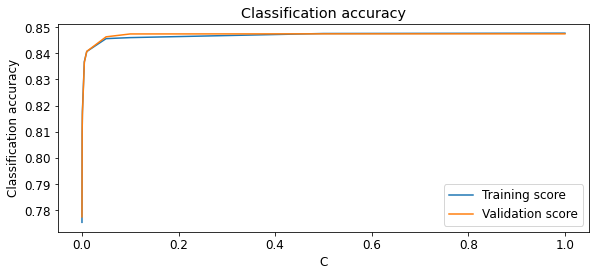

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(16, 4))
accuracy = plt.subplot(121)

accuracy.plot(C[:9], train_scores[:9], label="Training score")
accuracy.plot(C[:9], val_scores[:9], label="Validation score")


# legends and labels
accuracy.set_title("Classification accuracy")

# accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
# accuracy.set_xticks(())
# accuracy.set_ylim(0.84, 0.95)
# accuracy.set_yticks(())

accuracy.set_xlabel("C")
accuracy.set_ylabel("Classification accuracy")

accuracy.legend(loc='best')

plt.tight_layout()
plt.legend()
plt.show()

#### SVM

##### Linear SVM

In [ ]:
params = {"C": [1e-4, 5e-4, 1e-3, 5e-3, .01, .05, .1, .5, 1, 10, 100, 1000, 1e4]}
OUTPUT_DIR = 'linear_svm_C'

In [ ]:
linear_c_result = train('linear_svm', params, X_train_transformed_split, X_val_transformed, y_train_split, y_val, OUTPUT_DIR, 'linear_svm_')

  0%|          | 0/13 [00:00<?, ?it/s]

[{'C': 0.0001}, {'C': 0.0005}, {'C': 0.001}, {'C': 0.005}, {'C': 0.01}, {'C': 0.05}, {'C': 0.1}, {'C': 0.5}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}, {'C': 10000.0}]

C: 0.0001
Loading model information from linear_svm_C/linear_svm_C_0.0001.pkl

C: 0.0005


 15%|█▌        | 2/13 [00:00<00:02,  4.23it/s]

Saving model information to linear_svm_C/linear_svm_C_0.0005.pkl
Train score: 0.834862586947683
Validation score: 0.8335457782075513
----------------------------------------------------------------------------------------------------

C: 0.001


 23%|██▎       | 3/13 [00:00<00:03,  3.18it/s]

Saving model information to linear_svm_C/linear_svm_C_0.001.pkl
Train score: 0.839873410766678
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

C: 0.005


 31%|███       | 4/13 [00:01<00:03,  2.69it/s]

Saving model information to linear_svm_C/linear_svm_C_0.005.pkl
Train score: 0.8452029053987231
Validation score: 0.8451057096391368
----------------------------------------------------------------------------------------------------

C: 0.01


 38%|███▊      | 5/13 [00:01<00:03,  2.41it/s]

Saving model information to linear_svm_C/linear_svm_C_0.01.pkl
Train score: 0.8462578156764062
Validation score: 0.8461606083249088
----------------------------------------------------------------------------------------------------

C: 0.05


 46%|████▌     | 6/13 [00:02<00:03,  1.84it/s]

Saving model information to linear_svm_C/linear_svm_C_0.05.pkl
Train score: 0.8474226124413481
Validation score: 0.8468199200035164
----------------------------------------------------------------------------------------------------

C: 0.1


 54%|█████▍    | 7/13 [00:04<00:04,  1.32it/s]

Saving model information to linear_svm_C/linear_svm_C_0.1.pkl
Train score: 0.8478841356878345
Validation score: 0.846732011779702
----------------------------------------------------------------------------------------------------

C: 0.5


 62%|██████▏   | 8/13 [00:08<00:09,  1.84s/it]

Saving model information to linear_svm_C/linear_svm_C_0.5.pkl
Train score: 0.8477962264980275
Validation score: 0.8462485165487231
----------------------------------------------------------------------------------------------------

C: 1


 69%|██████▉   | 9/13 [00:16<00:14,  3.72s/it]

Saving model information to linear_svm_C/linear_svm_C_1.pkl
Train score: 0.8477632605518499
Validation score: 0.8462485165487231
----------------------------------------------------------------------------------------------------

C: 10


 77%|███████▋  | 10/13 [02:22<02:01, 40.43s/it]

Saving model information to linear_svm_C/linear_svm_C_10.pkl
Train score: 0.8478511697416569
Validation score: 0.8458968836534658
----------------------------------------------------------------------------------------------------

C: 100


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
 85%|████████▍ | 11/13 [06:46<03:34, 107.48s/it]

Saving model information to linear_svm_C/linear_svm_C_100.pkl
Train score: 0.8479061129852862
Validation score: 0.8463803788844446
----------------------------------------------------------------------------------------------------

C: 1000


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
 92%|█████████▏| 12/13 [12:06<02:51, 171.16s/it]

Saving model information to linear_svm_C/linear_svm_C_1000.pkl
Train score: 0.7846774282166522
Validation score: 0.7831743659619358
----------------------------------------------------------------------------------------------------

C: 10000.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
100%|██████████| 13/13 [19:17<00:00, 89.04s/it] 

Saving model information to linear_svm_C/linear_svm_C_10000.0.pkl
Train score: 0.8123578343571091
Validation score: 0.8124917586040175
----------------------------------------------------------------------------------------------------
Saving model information to linear_svm_C/best_model.pkl


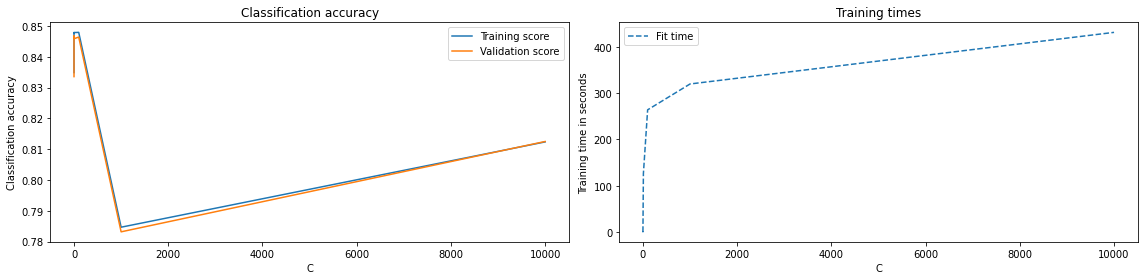

In [ ]:
plt.figure(figsize=(16, 4))
accuracy = plt.subplot(121)
# second y axis for timings
timescale = plt.subplot(122)

accuracy.plot(params["C"][1:], linear_c_result["train_scores"], label="Training score")
accuracy.plot(params["C"][1:], linear_c_result["validation_scores"], label="Validation score")

timescale.plot(params["C"][1:], linear_c_result["fit_time"], '--',
               label='Fit time')


# legends and labels
accuracy.set_title("Classification accuracy")
timescale.set_title("Training times")
# accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
# accuracy.set_xticks(())
# accuracy.set_ylim(0.84, 0.95)
# accuracy.set_yticks(())
timescale.set_xlabel("C")
accuracy.set_xlabel("C")
accuracy.set_ylabel("Classification accuracy")
timescale.set_ylabel("Training time in seconds")
accuracy.legend(loc='best')
timescale.legend(loc='best')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
linear_svm_models = []
for file in os.listdir(OUTPUT_DIR):
    with open(os.path.join(OUTPUT_DIR, file), 'rb') as f:
        linear_svm_models.append(pickle.load(f))

In [ ]:
os.listdir(OUTPUT_DIR)

['linear_svm_C_0.0001.pkl',
 'linear_svm_C_0.0005.pkl',
 'linear_svm_C_0.001.pkl',
 'linear_svm_C_0.005.pkl',
 'linear_svm_C_0.01.pkl',
 'linear_svm_C_0.05.pkl',
 'linear_svm_C_0.1.pkl',
 'linear_svm_C_0.5.pkl',
 'linear_svm_C_1.pkl',
 'linear_svm_C_10.pkl',
 'linear_svm_C_100.pkl',
 'linear_svm_C_1000.pkl',
 'linear_svm_C_10000.0.pkl',
 'best_model.pkl']

In [ ]:
linear_svm_models

[{'fit_time': 0.45816993713378906,
  'model': LinearSVC(C=0.0001, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=10000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
            verbose=0),
  'train_score': 0.8148742349153325,
  'validation_score': 0.8139861984088611},
 {'fit_time': 0.4289681911468506,
  'model': LinearSVC(C=0.0005, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=10000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
            verbose=0),
  'train_score': 0.834862586947683,
  'validation_score': 0.8335457782075513},
 {'fit_time': 0.44905614852905273,
  'model': LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=10000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      

##### Sigmoid kernel 

In [ ]:
params = {"C": [0.01, 0.1, 1, 100], "gamma": ["scale", 0.1, 1, 10]}
OUTPUT_DIR = 'sigmoid_C_gamma'

In [ ]:
sigmoid_c_gamma_result = train('sigmoid_svm', params, X_train_transformed_split, X_val_transformed, y_train_split, y_val, OUTPUT_DIR, prefix='sigmoid_')

  0%|          | 0/16 [00:00<?, ?it/s]

[{'C': 0.01, 'gamma': 'scale'}, {'C': 0.01, 'gamma': 0.1}, {'C': 0.01, 'gamma': 1}, {'C': 0.01, 'gamma': 10}, {'C': 0.1, 'gamma': 'scale'}, {'C': 0.1, 'gamma': 0.1}, {'C': 0.1, 'gamma': 1}, {'C': 0.1, 'gamma': 10}, {'C': 1, 'gamma': 'scale'}, {'C': 1, 'gamma': 0.1}, {'C': 1, 'gamma': 1}, {'C': 1, 'gamma': 10}, {'C': 100, 'gamma': 'scale'}, {'C': 100, 'gamma': 0.1}, {'C': 100, 'gamma': 1}, {'C': 100, 'gamma': 10}]

C: 0.01
gamma: scale
Loading model information from sigmoid_C_gamma/sigmoid_C_0.01_gamma_scale.pkl


  6%|▋         | 1/16 [00:01<00:19,  1.28s/it]


C: 0.01
gamma: 0.1
Loading model information from sigmoid_C_gamma/sigmoid_C_0.01_gamma_0.1.pkl


 12%|█▎        | 2/16 [00:02<00:18,  1.33s/it]


C: 0.01
gamma: 1
Loading model information from sigmoid_C_gamma/sigmoid_C_0.01_gamma_1.pkl


 19%|█▉        | 3/16 [00:04<00:19,  1.47s/it]


C: 0.01
gamma: 10
Loading model information from sigmoid_C_gamma/sigmoid_C_0.01_gamma_10.pkl


 25%|██▌       | 4/16 [00:05<00:17,  1.44s/it]


C: 0.1
gamma: scale
Loading model information from sigmoid_C_gamma/sigmoid_C_0.1_gamma_scale.pkl


 31%|███▏      | 5/16 [00:06<00:14,  1.33s/it]


C: 0.1
gamma: 0.1


 38%|███▊      | 6/16 [37:59<1:53:48, 682.83s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_0.1_gamma_0.1.pkl
Train score: 0.7876004087777326
Validation score: 0.7904707485385257
----------------------------------------------------------------------------------------------------

C: 0.1
gamma: 1


 44%|████▍     | 7/16 [1:53:56<4:36:45, 1845.00s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_0.1_gamma_1.pkl
Train score: 0.7748865422019054
Validation score: 0.776713111511582
----------------------------------------------------------------------------------------------------

C: 0.1
gamma: 10


 50%|█████     | 8/16 [2:18:52<3:52:01, 1740.22s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_0.1_gamma_10.pkl
Train score: 0.7753700427458435
Validation score: 0.7774603314140037
----------------------------------------------------------------------------------------------------

C: 1
gamma: scale


 56%|█████▋    | 9/16 [2:42:50<3:12:26, 1649.56s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_1_gamma_scale.pkl
Train score: 0.7498324231069305
Validation score: 0.7517911300602171
----------------------------------------------------------------------------------------------------

C: 1
gamma: 0.1


 62%|██████▎   | 10/16 [3:12:04<2:48:06, 1681.00s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_1_gamma_0.1.pkl
Train score: 0.7538432798918717
Validation score: 0.7551755966770691
----------------------------------------------------------------------------------------------------

C: 1
gamma: 1


 69%|██████▉   | 11/16 [3:47:23<2:31:01, 1812.30s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_1_gamma_1.pkl
Train score: 0.7136907574475567
Validation score: 0.7108698518746429
----------------------------------------------------------------------------------------------------

C: 1
gamma: 10


 75%|███████▌  | 12/16 [4:12:21<1:54:32, 1718.00s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_1_gamma_10.pkl
Train score: 0.7753700427458435
Validation score: 0.7774603314140037
----------------------------------------------------------------------------------------------------

C: 100
gamma: scale


 81%|████████▏ | 13/16 [4:42:13<1:27:00, 1740.19s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_100_gamma_scale.pkl
Train score: 0.7453930090216806
Validation score: 0.7462089578480067
----------------------------------------------------------------------------------------------------

C: 100
gamma: 0.1


 88%|████████▊ | 14/16 [5:13:11<59:10, 1775.47s/it]  

Saving model information to sigmoid_C_gamma/sigmoid_C_100_gamma_0.1.pkl
Train score: 0.7479533641748074
Validation score: 0.7489780668981583
----------------------------------------------------------------------------------------------------

C: 100
gamma: 1


 94%|█████████▍| 15/16 [5:37:05<27:53, 1673.01s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_100_gamma_1.pkl
Train score: 0.6917793918881795
Validation score: 0.6895081534877587
----------------------------------------------------------------------------------------------------

C: 100
gamma: 10


100%|██████████| 16/16 [6:02:09<00:00, 1358.10s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_100_gamma_10.pkl
Train score: 0.7753700427458435
Validation score: 0.7774603314140037
----------------------------------------------------------------------------------------------------
Saving model information to sigmoid_C_gamma/best_model.pkl


##### Polynomial Kernel

###### Gamma

In [ ]:
params = {"gamma": [0.001,'scale', 0.1, 1, 10, 100, 1000, 1e4]}

In [ ]:
poly_gamma_result = train('poly_svm', params, X_train_transformed_split, X_val_transformed, y_train_split, y_val, 'poly_gamma', 'poly_')

  0%|          | 0/8 [00:00<?, ?it/s]

[{'gamma': 0.001}, {'gamma': 'scale'}, {'gamma': 0.1}, {'gamma': 1}, {'gamma': 10}, {'gamma': 100}, {'gamma': 1000}, {'gamma': 10000.0}]

gamma: 0.001


 12%|█▎        | 1/8 [33:03<3:51:24, 1983.45s/it]

Saving model information to poly_gamma/poly_gamma_0.001.pkl
Train score: 0.7753700427458435
Validation score: 0.7774603314140037
----------------------------------------------------------------------------------------------------

gamma: scale


 25%|██▌       | 2/8 [1:05:13<3:16:45, 1967.57s/it]

Saving model information to poly_gamma/poly_gamma_scale.pkl
Train score: 0.8765425315648935
Validation score: 0.8578963562041229
----------------------------------------------------------------------------------------------------

gamma: 0.1


 38%|███▊      | 3/8 [1:36:43<2:42:00, 1944.20s/it]

Saving model information to poly_gamma/poly_gamma_0.1.pkl
Train score: 0.8714547872048174
Validation score: 0.8572370445255154
----------------------------------------------------------------------------------------------------

gamma: 1


###### Degree

In [ ]:
degrees = [2,3,4,5,6]
SAVE_DIR = 'poly_svm_degrees'

In [ ]:
poly_models = []
train_scores = []
val_scores = []
time_scores = []


In [ ]:
for degree in tqdm(degrees, desc='Polynomal kernel'):
    print()
    print('Degree: {}'.format(degree))
    poly_svm = SVC(kernel='poly', degree=degree)
    start = time.time()
    _ = poly_svm.fit(X_train_transformed_split, y_train_split)
    time_scores.append(time.time() - start)
    train_score = poly_svm.score(X_train_transformed_split, y_train_split) 
    val_score = poly_svm.score(X_val_transformed, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)
    poly_models.append(poly_svm)
    pkl_filename = 'poly_svm_degree_' + str(degree) + '.pkl'
    with open(os.path.join(SAVE_DIR, pkl_filename), 'wb') as file:
        pickle.dump(poly_svm, file)
    print('Training score: {}'.format(train_score))
    print('Validation score: {}'.format(val_score))
    print('-'*100)

Polynomal kernel:   0%|          | 0/5 [00:00<?, ?it/s]


Degree: 2


Polynomal kernel:  20%|██        | 1/5 [28:25<1:53:40, 1705.22s/it]

Training score: 0.8637187785018077
Validation score: 0.8558744670563931
----------------------------------------------------------------------------------------------------

Degree: 3


Polynomal kernel:  40%|████      | 2/5 [1:00:48<1:28:50, 1776.77s/it]

Training score: 0.8745535861455117
Validation score: 0.8555228341611357
----------------------------------------------------------------------------------------------------

Degree: 4


Polynomal kernel:  60%|██████    | 3/5 [1:46:59<1:09:10, 2075.04s/it]

Training score: 0.8887948748942343
Validation score: 0.8544239813634565
----------------------------------------------------------------------------------------------------

Degree: 5


Polynomal kernel:  80%|████████  | 4/5 [2:50:08<43:08, 2588.96s/it]  

Training score: 0.9047833587903695
Validation score: 0.8512153311942332
----------------------------------------------------------------------------------------------------

Degree: 6


Polynomal kernel: 100%|██████████| 5/5 [4:07:50<00:00, 2974.03s/it]

Training score: 0.921090513499555
Validation score: 0.8478748186892884
----------------------------------------------------------------------------------------------------


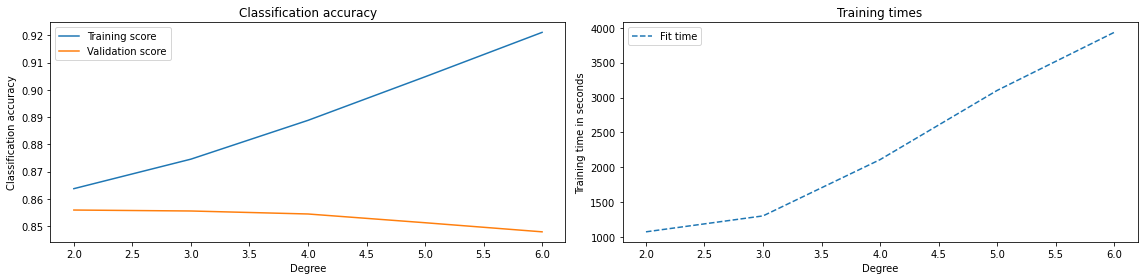

In [ ]:
plt.figure(figsize=(16, 4))
accuracy = plt.subplot(121)
# second y axis for timings
timescale = plt.subplot(122)

accuracy.plot(degrees, train_scores, label="Training score")
accuracy.plot(degrees, val_scores, label="Validation score")

timescale.plot(degrees, time_scores, '--',
               label='Fit time')


# legends and labels
accuracy.set_title("Classification accuracy")
timescale.set_title("Training times")
# accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
# accuracy.set_xticks(())
# accuracy.set_ylim(0.84, 0.95)
# accuracy.set_yticks(())
timescale.set_xlabel("Degree")
accuracy.set_xlabel("Degree")
accuracy.set_ylabel("Classification accuracy")
timescale.set_ylabel("Training time in seconds")
accuracy.legend(loc='best')
timescale.legend(loc='best')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
C_values = [0.1, 10, 100]
degrees = [2, 3, 4, 5]
time_scores = []
train_scores = []
val_scores = []
poly_models = []
OUTPUT_DIR = 'poly_degree_C'

In [ ]:
for C_val in C_values:
    for degree in tqdm(degrees, desc='Polynomial kernel'):
        print()
        print('Degree: {}'.format(degree))
        print('C: {}'.format(C_val))
        poly_svm = SVC(kernel='poly', degree=degree, C=C_val)
        start = time.time()
        _ = poly_svm.fit(X_train_scaled, y_train)
        time_scores.append(time.time() - start)
        train_score = poly_svm.score(X_train_scaled, y_train) 
        val_score = poly_svm.score(X_val_scaled, y_val)
        train_scores.append(train_score)
        val_scores.append(val_score)
        poly_models.append(poly_svm)
        pkl_filename = 'poly_svm_degree_' + str(degree) + '_C_' + str(C_val) + '.pkl'
        with open(os.path.join(OUTPUT_DIR, pkl_filename), 'wb') as file:
            pickle.dump(poly_svm, file)
        print('Training score: {}'.format(train_score))
        print('Validation score: {}'.format(val_score))
        print('-'*100)

###### C

In [ ]:
os.listdir('poly_C')
poly_C_result = []
for file in os.listdir('poly_C'):
    with open(os.path.join('poly_C', file), 'rb') as f:
        poly_C_result.append(pickle.load(f))    

In [ ]:
poly_C_result

[{'fit_time': 1074.045509338379,
  'model': SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  'train_score': 0.8240607452501566,
  'validation_score': 0.8223814337831304},
 {'fit_time': 1065.4431457519531,
  'model': SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  'train_score': 0.8534663692405745,
  'validation_score': 0.848270405696453},
 {'fit_time': 1570.5745701789856,
  'model': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, ra

In [ ]:
poly_C_values = []
poly_C_train_scores = []
poly_C_val_scores = []
for res in poly_C_result:
    poly_C_values.append(res['model'].get_params()['C'])
    poly_C_train_scores.append(res['train_score'])
    poly_C_val_scores.append(res['validation_score'])

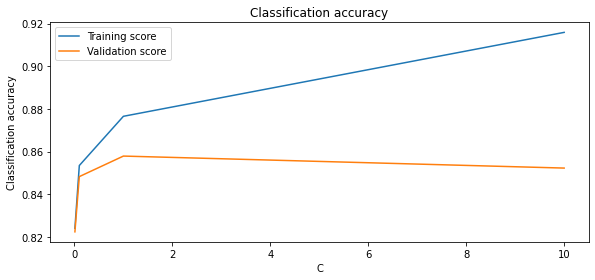

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(16, 4))
accuracy = plt.subplot(121)
# second y axis for timings
# timescale = plt.subplot(122)

accuracy.plot(poly_C_values, poly_C_train_scores, label="Training score")
accuracy.plot(poly_C_values, poly_C_val_scores, label="Validation score")

# timescale.plot(degrees, time_scores, '--',
#                label='Fit time')


# legends and labels
accuracy.set_title("Classification accuracy")
# timescale.set_title("Training times")
# accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
# accuracy.set_xticks(())
# accuracy.set_ylim(0.84, 0.95)
# accuracy.set_yticks(())
# timescale.set_xlabel("Degree")
accuracy.set_xlabel("C")
accuracy.set_ylabel("Classification accuracy")
# timescale.set_ylabel("Training time in seconds")
accuracy.legend(loc='best')
# timescale.legend(loc='best')
plt.tight_layout()
plt.legend()
plt.show()

##### RBF Kernel

###### C

In [ ]:
C_range = [1e-3, 1e-2, .1, 1, 10, 100, 1000, 1e4]
rbf_models = []
train_scores = []
val_scores = []
time_scores = []
SAVE_DIR = 'rbf_gridsearch_C'

In [ ]:
for C_val in tqdm(C_range, desc="C values"):
    pkl_filename = 'rbf_svm_C_' + str(C_val) + '.pkl'
    if os.path.isfile(os.path.join(SAVE_DIR, pkl_filename)):
        continue 
    print()
    print('C: {}'.format(C_val))
    start = time.time()
    rbf_svm = SVC(C=C_val)
    _ = rbf_svm.fit(X_train_transformed_split, y_train_split)
    train_score = rbf_svm.score(X_train_transformed_split, y_train_split)
    val_score = rbf_svm.score(X_val_transformed, y_val)
    time_scores.append(time.time() - start)
    train_scores.append(train_score)
    val_scores.append(val_score)
    rbf_models.append(rbf_svm)
    with open(os.path.join(SAVE_DIR, pkl_filename), 'wb') as file:
        pickle.dump(rbf_svm, file)
    print('Training score: {}'.format(train_score))
    print('Validation score: {}'.format(val_score))
    print('-'*100)

C values:   0%|          | 0/8 [00:00<?, ?it/s]


C: 100


C values:  75%|███████▌  | 6/8 [3:51:35<1:17:11, 2315.90s/it]

Training score: 0.9775830334331475
Validation score: 0.8269875281577935
----------------------------------------------------------------------------------------------------

C: 1000


###### Gamma

In [ ]:
# gamma_range = [1e-3, 1e-2, .1, 1, 10, 100, 1e4]
gamma_range = ['auto', 'scale', 1e-3, 1e-2, .1, 1, 10, 1000]
rbf_models = []
train_scores = []
val_scores = []
time_scores = []

In [ ]:
for gamma in tqdm(gamma_range, desc="Gamma tuning"):
    print()
    print('Gamma: {}'.format(gamma))
    rbf_svm = SVC(gamma=gamma)
    start = time.time()
    _ = rbf_svm.fit(X_train_scaled, y_train)
    rbf_models.append(rbf_svm)
    time_scores.append(time.time() - start)
    train_score = rbf_svm.score(X_train_scaled, y_train)
    val_score = rbf_svm.score(X_val_scaled, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)
    print('Training score: {}'.format(train_score))
    print('Validation score: {}'.format(val_score))
    print('-'*100)

###### C and gamma

In [ ]:
params = {"C": [10, 0.1, 1 , 100], "gamma": ["scale", 0.1, 1, 10]}
OUTPUT_DIR = 'rbf_C_gamma_new'

In [ ]:
rbf_c_gamma_result = train(SVC(), params, X_train_transformed_split, X_val_transformed, y_train_split, y_val, OUTPUT_DIR, prefix='rbf_')

  0%|          | 0/16 [00:00<?, ?it/s]

[{'C': 10, 'gamma': 'scale'}, {'C': 10, 'gamma': 0.1}, {'C': 10, 'gamma': 1}, {'C': 10, 'gamma': 10}, {'C': 0.1, 'gamma': 'scale'}, {'C': 0.1, 'gamma': 0.1}, {'C': 0.1, 'gamma': 1}, {'C': 0.1, 'gamma': 10}, {'C': 1, 'gamma': 'scale'}, {'C': 1, 'gamma': 0.1}, {'C': 1, 'gamma': 1}, {'C': 1, 'gamma': 10}, {'C': 100, 'gamma': 'scale'}, {'C': 100, 'gamma': 0.1}, {'C': 100, 'gamma': 1}, {'C': 100, 'gamma': 10}]

C: 10
gamma: scale


  6%|▋         | 1/16 [1:26:48<21:42:04, 5208.30s/it]

Saving model information to rbf_C_gamma_new/rbf_C_10_gamma_scale.pkl
Train score: 0.9106183312638045
Validation score: 0.856094237615929
----------------------------------------------------------------------------------------------------

C: 10
gamma: 0.1


 12%|█▎        | 2/16 [2:36:18<19:02:37, 4896.97s/it]

Saving model information to rbf_C_gamma_new/rbf_C_10_gamma_0.1.pkl
Train score: 0.9029922090480533
Validation score: 0.8558744670563931
----------------------------------------------------------------------------------------------------

C: 10
gamma: 1


 19%|█▉        | 3/16 [4:47:02<20:52:33, 5781.08s/it]

Saving model information to rbf_C_gamma_new/rbf_C_10_gamma_1.pkl
Train score: 0.9961319956484951
Validation score: 0.8107335941277306
----------------------------------------------------------------------------------------------------

C: 10
gamma: 10


In [ ]:
C_range = [10, 100, 1000, 1e4]
# gamma_range = [0.05, 0.1, 1, 10]
gamma_range = [0.05, 0.075, 0.1]
# param_grid = dict(gamma=gamma_range, C=C_range)
rbf_models = []
train_rbf_scores = []
val_rbf_scores = []
time_rbf_scores = []
OUTPUT_DIR = 'rbf_C_gamma'

In [ ]:
for C_val in tqdm(C_range, desc="C values"):
    for gamma_val in tqdm(gamma_range, desc="Gamma values"):
        pkl_filename = 'rbf_C_' + str(C_val) + '_gamma_' + str(gamma_val)  + '.pkl'
        if os.path.isfile(os.path.join(OUTPUT_DIR, pkl_filename)):
            continue
        print()
        print('C: {}, gamma: {}'.format(C_val, gamma_val))
        start = time.time()
        rbf_svm = SVC(C=C_val, gamma=gamma_val)
        _ = rbf_svm.fit(X_train_transformed_split, y_train_split)
        train_score = rbf_svm.score(X_train_transformed_split, y_train_split)
        val_score = rbf_svm.score(X_val_transformed, y_val)
        time_rbf_scores.append(time.time() - start)
        train_rbf_scores.append(train_score)
        val_rbf_scores.append(val_score)
        rbf_models.append(rbf_svm)
        
        with open(os.path.join(OUTPUT_DIR, pkl_filename), 'wb') as file:
            pickle.dump(rbf_svm, file)
        print('Training score: {}'.format(train_score))
        print('Validation score: {}'.format(val_score))
        print('-'*100)

Gamma values:   0%|          | 0/3 [00:00<?, ?it/s]


C: 10, gamma: 0.075



Gamma values:   0%|          | 0/3 [00:00<?, ?it/s]

Training score: 0.889553091656319
Validation score: 0.857149136301701
----------------------------------------------------------------------------------------------------

C: 100, gamma: 0.05


#### Decision Tree

In [ ]:
output_dir = "../saved_models/decision_tree"
prefix = 'DTree'

In [ ]:
param_grid = {'max_depth': np.arange(1, 10),
                  'min_samples_split': np.arange(2,13),
                  'min_samples_leaf': np.arange(2,13)}

In [ ]:
result = train('decision_tree', param_grid, X_train_tranformed_split, X_val_tranformed, y_train_split, y_val, output_dir, prefix)

  0%|          | 0/1089 [00:00<?, ?it/s]


max_depth: 1
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  0%|          | 1/1089 [00:00<09:34,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  0%|          | 2/1089 [00:01<09:38,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  0%|          | 3/1089 [00:01<09:35,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  0%|          | 4/1089 [00:02<09:34,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  0%|          | 5/1089 [00:02<09:37,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 6/1089 [00:03<09:39,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 7/1089 [00:03<09:35,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 8/1089 [00:04<09:37,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 9/1089 [00:04<09:33,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 10/1089 [00:05<09:31,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 11/1089 [00:05<09:29,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 12/1089 [00:06<09:30,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 13/1089 [00:06<09:30,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|▏         | 14/1089 [00:07<09:27,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|▏         | 15/1089 [00:07<09:28,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|▏         | 16/1089 [00:08<09:29,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 17/1089 [00:09<09:29,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 18/1089 [00:09<09:24,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 19/1089 [00:10<09:30,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 20/1089 [00:10<09:28,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 21/1089 [00:11<09:27,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 22/1089 [00:11<09:25,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 23/1089 [00:12<09:23,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 24/1089 [00:12<09:25,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 25/1089 [00:13<09:23,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 26/1089 [00:13<09:21,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 27/1089 [00:14<09:19,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 28/1089 [00:14<09:19,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 29/1089 [00:15<09:21,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 30/1089 [00:15<09:19,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 31/1089 [00:16<09:18,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 32/1089 [00:16<09:21,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 33/1089 [00:17<09:20,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 34/1089 [00:18<09:22,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 35/1089 [00:18<09:22,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 36/1089 [00:19<09:21,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 37/1089 [00:19<09:18,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 38/1089 [00:20<09:15,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▎         | 39/1089 [00:20<09:12,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▎         | 40/1089 [00:21<09:13,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 41/1089 [00:21<09:12,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 42/1089 [00:22<09:12,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 43/1089 [00:22<09:13,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 44/1089 [00:23<09:12,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 45/1089 [00:23<09:13,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 46/1089 [00:24<09:12,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 47/1089 [00:24<09:11,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 48/1089 [00:25<09:11,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 49/1089 [00:25<09:09,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▍         | 50/1089 [00:26<09:10,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▍         | 51/1089 [00:27<09:10,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▍         | 52/1089 [00:27<09:09,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▍         | 53/1089 [00:28<09:08,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▍         | 54/1089 [00:28<09:07,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▌         | 55/1089 [00:29<09:04,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▌         | 56/1089 [00:29<09:08,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▌         | 57/1089 [00:30<09:07,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▌         | 58/1089 [00:30<09:05,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▌         | 59/1089 [00:31<09:04,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 60/1089 [00:31<09:04,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 61/1089 [00:32<09:05,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 62/1089 [00:32<09:07,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 63/1089 [00:33<09:07,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 64/1089 [00:33<09:04,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 65/1089 [00:34<09:02,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 66/1089 [00:34<09:02,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 67/1089 [00:35<09:01,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 68/1089 [00:36<09:00,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▋         | 69/1089 [00:36<09:00,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▋         | 70/1089 [00:37<08:58,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 71/1089 [00:37<09:01,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 72/1089 [00:38<09:01,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 73/1089 [00:38<08:59,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 74/1089 [00:39<08:57,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 75/1089 [00:39<08:57,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 76/1089 [00:40<08:55,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 77/1089 [00:40<08:55,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 78/1089 [00:41<08:55,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 79/1089 [00:41<08:56,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 80/1089 [00:42<08:54,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 81/1089 [00:42<08:52,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 82/1089 [00:43<08:50,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 83/1089 [00:43<08:51,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 84/1089 [00:44<08:51,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 85/1089 [00:45<08:48,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 86/1089 [00:45<08:50,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 87/1089 [00:46<08:49,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 88/1089 [00:46<08:48,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 89/1089 [00:47<08:53,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 90/1089 [00:47<08:51,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 91/1089 [00:48<08:51,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 92/1089 [00:48<08:49,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▊         | 93/1089 [00:49<08:48,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▊         | 94/1089 [00:49<08:47,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▊         | 95/1089 [00:50<08:46,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 96/1089 [00:50<08:46,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 97/1089 [00:51<08:44,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 98/1089 [00:51<08:46,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 99/1089 [00:52<08:43,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 100/1089 [00:53<08:45,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 101/1089 [00:53<08:47,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 102/1089 [00:54<08:43,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 103/1089 [00:54<08:44,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|▉         | 104/1089 [00:55<08:44,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|▉         | 105/1089 [00:55<08:44,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|▉         | 106/1089 [00:56<08:43,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|▉         | 107/1089 [00:56<08:43,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|▉         | 108/1089 [00:57<08:41,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|█         | 109/1089 [00:57<08:42,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|█         | 110/1089 [00:58<08:40,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|█         | 111/1089 [00:58<08:42,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|█         | 112/1089 [00:59<08:37,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|█         | 113/1089 [00:59<08:37,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|█         | 114/1089 [01:00<08:37,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 115/1089 [01:00<08:35,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 116/1089 [01:01<08:35,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 117/1089 [01:02<08:35,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 118/1089 [01:02<08:38,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 119/1089 [01:03<08:38,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 120/1089 [01:03<08:36,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 121/1089 [01:04<08:39,  1.86it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 122/1089 [01:04<09:15,  1.74it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█▏        | 123/1089 [01:05<09:38,  1.67it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█▏        | 124/1089 [01:06<09:54,  1.62it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█▏        | 125/1089 [01:06<10:10,  1.58it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 126/1089 [01:07<10:17,  1.56it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 127/1089 [01:08<10:25,  1.54it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 128/1089 [01:08<10:30,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 129/1089 [01:09<10:28,  1.53it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 130/1089 [01:10<10:31,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 131/1089 [01:10<10:33,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 132/1089 [01:11<10:33,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 133/1089 [01:12<10:31,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 134/1089 [01:12<10:29,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 135/1089 [01:13<10:27,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 136/1089 [01:14<10:30,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 137/1089 [01:14<10:32,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 138/1089 [01:15<10:28,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 139/1089 [01:16<10:30,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 140/1089 [01:16<10:27,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 141/1089 [01:17<10:26,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 142/1089 [01:18<10:23,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 143/1089 [01:18<10:24,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 144/1089 [01:19<10:27,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 145/1089 [01:20<10:25,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 146/1089 [01:20<10:23,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 147/1089 [01:21<10:21,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▎        | 148/1089 [01:22<10:23,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▎        | 149/1089 [01:22<10:21,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 150/1089 [01:23<10:22,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 151/1089 [01:24<10:21,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 152/1089 [01:24<10:19,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 153/1089 [01:25<10:17,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 154/1089 [01:26<10:15,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 155/1089 [01:26<10:15,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 156/1089 [01:27<10:15,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 157/1089 [01:28<10:15,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▍        | 158/1089 [01:28<10:16,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▍        | 159/1089 [01:29<10:13,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▍        | 160/1089 [01:29<10:12,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▍        | 161/1089 [01:30<10:12,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▍        | 162/1089 [01:31<10:13,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▍        | 163/1089 [01:31<10:12,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▌        | 164/1089 [01:32<10:15,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▌        | 165/1089 [01:33<10:15,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▌        | 166/1089 [01:33<10:12,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▌        | 167/1089 [01:34<10:11,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▌        | 168/1089 [01:35<10:11,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 169/1089 [01:35<10:08,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 170/1089 [01:36<10:09,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 171/1089 [01:37<10:10,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 172/1089 [01:37<10:09,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 173/1089 [01:38<10:09,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 174/1089 [01:39<10:07,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 175/1089 [01:39<10:07,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 176/1089 [01:40<10:05,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▋        | 177/1089 [01:41<10:06,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▋        | 178/1089 [01:41<10:07,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▋        | 179/1089 [01:42<10:05,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 180/1089 [01:43<10:03,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 181/1089 [01:43<10:00,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 182/1089 [01:44<10:02,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 183/1089 [01:45<10:00,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 184/1089 [01:45<09:59,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 185/1089 [01:46<10:01,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 186/1089 [01:47<10:00,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 187/1089 [01:47<09:57,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 188/1089 [01:48<09:58,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 189/1089 [01:49<09:59,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 190/1089 [01:49<09:57,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 191/1089 [01:50<09:57,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 192/1089 [01:51<09:54,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 193/1089 [01:51<09:54,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 194/1089 [01:52<09:56,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 195/1089 [01:53<09:54,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 196/1089 [01:53<09:54,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 197/1089 [01:54<09:51,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 198/1089 [01:55<09:48,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 199/1089 [01:55<09:49,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 200/1089 [01:56<09:52,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 201/1089 [01:57<09:49,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▊        | 202/1089 [01:57<09:49,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▊        | 203/1089 [01:58<09:50,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▊        | 204/1089 [01:59<09:46,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 205/1089 [01:59<09:44,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 206/1089 [02:00<09:45,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 207/1089 [02:01<09:41,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 208/1089 [02:01<09:41,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 209/1089 [02:02<09:42,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 210/1089 [02:03<09:41,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 211/1089 [02:03<09:40,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 212/1089 [02:04<09:45,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|█▉        | 213/1089 [02:05<09:45,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|█▉        | 214/1089 [02:05<09:44,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|█▉        | 215/1089 [02:06<09:43,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|█▉        | 216/1089 [02:07<09:44,  1.49it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|█▉        | 217/1089 [02:07<09:43,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|██        | 218/1089 [02:08<09:43,  1.49it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|██        | 219/1089 [02:09<09:39,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|██        | 220/1089 [02:09<09:40,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|██        | 221/1089 [02:10<09:36,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|██        | 222/1089 [02:11<09:37,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|██        | 223/1089 [02:11<09:37,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 224/1089 [02:12<09:35,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 225/1089 [02:13<09:39,  1.49it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 226/1089 [02:13<09:35,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 227/1089 [02:14<09:32,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 228/1089 [02:15<09:32,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 229/1089 [02:15<09:34,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 230/1089 [02:16<09:31,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 231/1089 [02:17<09:33,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██▏       | 232/1089 [02:17<09:33,  1.49it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██▏       | 233/1089 [02:18<09:32,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██▏       | 234/1089 [02:19<09:31,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 235/1089 [02:19<09:29,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 236/1089 [02:20<09:28,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 237/1089 [02:21<09:27,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 238/1089 [02:21<09:28,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 239/1089 [02:22<09:26,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 240/1089 [02:23<09:29,  1.49it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 241/1089 [02:23<09:26,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 242/1089 [02:24<09:24,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 243/1089 [02:25<10:03,  1.40it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 244/1089 [02:26<10:24,  1.35it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 245/1089 [02:26<10:42,  1.31it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 246/1089 [02:27<10:53,  1.29it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 247/1089 [02:28<11:00,  1.27it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 248/1089 [02:29<11:08,  1.26it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 249/1089 [02:30<11:34,  1.21it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 250/1089 [02:31<11:29,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 251/1089 [02:31<11:27,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 252/1089 [02:32<11:24,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 253/1089 [02:33<11:22,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 254/1089 [02:34<11:19,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 255/1089 [02:35<11:15,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▎       | 256/1089 [02:35<11:13,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▎       | 257/1089 [02:36<11:11,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▎       | 258/1089 [02:37<11:11,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 259/1089 [02:38<11:10,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 260/1089 [02:39<11:10,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 261/1089 [02:40<11:10,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 262/1089 [02:40<11:10,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 263/1089 [02:41<11:10,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 264/1089 [02:42<11:08,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 265/1089 [02:43<11:08,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 266/1089 [02:44<11:07,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▍       | 267/1089 [02:44<11:07,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▍       | 268/1089 [02:45<11:07,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▍       | 269/1089 [02:46<11:07,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▍       | 270/1089 [02:47<11:08,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▍       | 271/1089 [02:48<11:05,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▍       | 272/1089 [02:48<11:02,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▌       | 273/1089 [02:49<11:03,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▌       | 274/1089 [02:50<11:03,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▌       | 275/1089 [02:51<11:02,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▌       | 276/1089 [02:52<11:02,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▌       | 277/1089 [02:53<10:59,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 278/1089 [02:53<10:57,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 279/1089 [02:54<10:57,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 280/1089 [02:55<10:57,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 281/1089 [02:56<10:56,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 282/1089 [02:57<10:54,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 283/1089 [02:57<10:54,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 284/1089 [02:58<10:53,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 285/1089 [02:59<10:52,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▋       | 286/1089 [03:00<10:50,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▋       | 287/1089 [03:01<10:49,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▋       | 288/1089 [03:01<10:53,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 289/1089 [03:02<10:53,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 290/1089 [03:03<10:50,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 291/1089 [03:04<10:51,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 292/1089 [03:05<10:48,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 293/1089 [03:06<10:51,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 294/1089 [03:06<10:47,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 295/1089 [03:07<10:49,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 296/1089 [03:08<10:49,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 297/1089 [03:09<10:43,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 298/1089 [03:10<10:42,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 299/1089 [03:10<10:40,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 300/1089 [03:11<10:38,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 301/1089 [03:12<10:39,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 302/1089 [03:13<10:38,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 303/1089 [03:14<11:13,  1.17it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 304/1089 [03:15<11:31,  1.14it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 305/1089 [03:16<11:44,  1.11it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 306/1089 [03:17<11:53,  1.10it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 307/1089 [03:18<11:54,  1.10it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 308/1089 [03:19<12:03,  1.08it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 309/1089 [03:19<12:14,  1.06it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 310/1089 [03:20<12:23,  1.05it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▊       | 311/1089 [03:22<13:19,  1.03s/it]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▊       | 312/1089 [03:23<12:30,  1.03it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▊       | 313/1089 [03:23<11:54,  1.09it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 314/1089 [03:24<11:28,  1.13it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 315/1089 [03:25<11:10,  1.15it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 316/1089 [03:26<10:56,  1.18it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 317/1089 [03:27<10:48,  1.19it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 318/1089 [03:27<10:40,  1.20it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 319/1089 [03:28<10:34,  1.21it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 320/1089 [03:29<10:33,  1.21it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 321/1089 [03:30<10:28,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|██▉       | 322/1089 [03:31<10:26,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|██▉       | 323/1089 [03:31<10:25,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|██▉       | 324/1089 [03:32<10:22,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|██▉       | 325/1089 [03:33<10:27,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|██▉       | 326/1089 [03:34<10:25,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|███       | 327/1089 [03:35<10:24,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|███       | 328/1089 [03:36<10:23,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|███       | 329/1089 [03:36<10:20,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|███       | 330/1089 [03:37<10:18,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|███       | 331/1089 [03:38<10:19,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|███       | 332/1089 [03:39<10:16,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 333/1089 [03:40<10:13,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 334/1089 [03:40<10:15,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 335/1089 [03:41<10:13,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 336/1089 [03:42<10:13,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 337/1089 [03:43<10:12,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 338/1089 [03:44<10:12,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 339/1089 [03:45<10:16,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 340/1089 [03:45<10:12,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███▏      | 341/1089 [03:46<10:14,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███▏      | 342/1089 [03:47<10:14,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███▏      | 343/1089 [03:48<10:14,  1.21it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 344/1089 [03:49<10:10,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 345/1089 [03:49<10:08,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 346/1089 [03:50<10:11,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 347/1089 [03:51<10:08,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 348/1089 [03:52<10:08,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 349/1089 [03:53<10:07,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 350/1089 [03:54<10:06,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 351/1089 [03:54<10:04,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 352/1089 [03:55<10:04,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 353/1089 [03:56<10:03,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 354/1089 [03:57<10:06,  1.21it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 355/1089 [03:58<10:02,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 356/1089 [03:58<09:58,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 357/1089 [03:59<09:55,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 358/1089 [04:00<09:56,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 359/1089 [04:01<09:54,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 360/1089 [04:02<09:54,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 361/1089 [04:03<09:52,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 362/1089 [04:03<09:54,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 363/1089 [04:04<09:53,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 364/1089 [04:05<10:27,  1.16it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▎      | 365/1089 [04:06<10:47,  1.12it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▎      | 366/1089 [04:07<11:06,  1.08it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▎      | 367/1089 [04:08<11:17,  1.07it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 368/1089 [04:09<11:24,  1.05it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 369/1089 [04:10<11:25,  1.05it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 370/1089 [04:11<11:27,  1.05it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 371/1089 [04:12<11:29,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 372/1089 [04:13<11:31,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 373/1089 [04:14<11:28,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 374/1089 [04:15<11:28,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 375/1089 [04:16<11:27,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▍      | 376/1089 [04:17<11:27,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▍      | 377/1089 [04:18<11:27,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▍      | 378/1089 [04:19<11:26,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▍      | 379/1089 [04:20<11:23,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▍      | 380/1089 [04:21<11:24,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▍      | 381/1089 [04:22<11:23,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▌      | 382/1089 [04:23<11:26,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▌      | 383/1089 [04:24<11:24,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▌      | 384/1089 [04:25<11:23,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▌      | 385/1089 [04:25<11:23,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▌      | 386/1089 [04:26<11:25,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 387/1089 [04:27<11:21,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 388/1089 [04:28<11:20,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 389/1089 [04:29<11:17,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 390/1089 [04:30<11:17,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 391/1089 [04:31<11:16,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 392/1089 [04:32<11:14,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 393/1089 [04:33<11:16,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 394/1089 [04:34<11:15,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▋      | 395/1089 [04:35<11:14,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▋      | 396/1089 [04:36<11:11,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▋      | 397/1089 [04:37<11:09,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 398/1089 [04:38<11:12,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 399/1089 [04:39<11:10,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 400/1089 [04:40<11:07,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 401/1089 [04:41<11:09,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 402/1089 [04:42<11:06,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 403/1089 [04:43<11:03,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 404/1089 [04:44<11:03,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 405/1089 [04:45<11:03,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 406/1089 [04:46<11:03,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 407/1089 [04:47<11:00,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 408/1089 [04:48<11:04,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 409/1089 [04:49<11:04,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 410/1089 [04:50<11:03,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 411/1089 [04:51<11:06,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 412/1089 [04:52<11:04,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 413/1089 [04:53<11:03,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 414/1089 [04:54<11:01,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 415/1089 [04:55<10:58,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 416/1089 [04:56<10:56,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 417/1089 [04:57<10:55,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 418/1089 [04:58<10:52,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 419/1089 [04:59<10:50,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▊      | 420/1089 [05:00<10:51,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▊      | 421/1089 [05:01<10:51,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 422/1089 [05:02<10:50,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 423/1089 [05:02<10:47,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 424/1089 [05:03<10:50,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 425/1089 [05:04<10:51,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 426/1089 [05:05<10:50,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 427/1089 [05:06<10:49,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 428/1089 [05:07<10:50,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 429/1089 [05:08<10:48,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 430/1089 [05:09<10:45,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|███▉      | 431/1089 [05:10<10:41,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|███▉      | 432/1089 [05:11<10:40,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|███▉      | 433/1089 [05:12<10:36,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|███▉      | 434/1089 [05:13<10:36,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|███▉      | 435/1089 [05:14<10:38,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|████      | 436/1089 [05:15<10:39,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|████      | 437/1089 [05:16<10:38,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|████      | 438/1089 [05:17<10:38,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|████      | 439/1089 [05:18<10:35,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|████      | 440/1089 [05:19<10:32,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|████      | 441/1089 [05:20<10:31,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 442/1089 [05:21<10:28,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 443/1089 [05:22<10:28,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 444/1089 [05:23<10:28,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 445/1089 [05:24<10:26,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 446/1089 [05:25<10:23,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 447/1089 [05:26<10:22,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 448/1089 [05:27<10:24,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 449/1089 [05:28<10:20,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████▏     | 450/1089 [05:29<10:19,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████▏     | 451/1089 [05:30<10:19,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 452/1089 [05:31<10:18,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 453/1089 [05:32<10:16,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 454/1089 [05:33<10:16,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 455/1089 [05:34<10:14,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 456/1089 [05:35<10:15,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 457/1089 [05:36<10:16,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 458/1089 [05:37<10:13,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 459/1089 [05:38<10:13,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 460/1089 [05:39<10:10,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 461/1089 [05:39<10:08,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 462/1089 [05:40<10:07,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 463/1089 [05:41<10:07,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 464/1089 [05:42<10:06,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 465/1089 [05:43<10:06,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 466/1089 [05:44<10:06,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 467/1089 [05:45<10:04,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 468/1089 [05:46<10:04,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 469/1089 [05:47<10:03,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 470/1089 [05:48<10:01,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 471/1089 [05:49<10:04,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 472/1089 [05:50<10:04,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 473/1089 [05:51<10:03,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▎     | 474/1089 [05:52<10:04,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▎     | 475/1089 [05:53<10:02,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▎     | 476/1089 [05:54<10:00,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 477/1089 [05:55<10:00,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 478/1089 [05:56<10:00,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 479/1089 [05:57<09:56,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 480/1089 [05:58<09:55,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 481/1089 [05:59<09:54,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 482/1089 [06:00<09:52,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 483/1089 [06:01<09:48,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 484/1089 [06:02<09:46,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▍     | 485/1089 [06:03<10:14,  1.02s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▍     | 486/1089 [06:04<10:39,  1.06s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▍     | 487/1089 [06:05<10:51,  1.08s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▍     | 488/1089 [06:07<11:03,  1.10s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▍     | 489/1089 [06:08<11:09,  1.12s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▍     | 490/1089 [06:09<11:13,  1.12s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▌     | 491/1089 [06:10<11:13,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▌     | 492/1089 [06:11<11:14,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▌     | 493/1089 [06:12<11:14,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▌     | 494/1089 [06:13<11:13,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▌     | 495/1089 [06:14<11:14,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 496/1089 [06:16<11:14,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 497/1089 [06:17<11:12,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 498/1089 [06:18<11:11,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 499/1089 [06:19<11:11,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 500/1089 [06:20<11:09,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 501/1089 [06:21<11:07,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 502/1089 [06:22<11:07,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 503/1089 [06:24<11:05,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▋     | 504/1089 [06:25<11:07,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▋     | 505/1089 [06:26<11:06,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▋     | 506/1089 [06:27<11:04,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 507/1089 [06:28<11:03,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 508/1089 [06:29<11:02,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 509/1089 [06:30<11:02,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 510/1089 [06:32<10:58,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 511/1089 [06:33<10:58,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 512/1089 [06:34<10:58,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 513/1089 [06:35<10:56,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 514/1089 [06:36<10:55,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 515/1089 [06:37<10:52,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 516/1089 [06:38<10:52,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 517/1089 [06:40<10:50,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 518/1089 [06:41<10:48,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 519/1089 [06:42<10:48,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 520/1089 [06:43<10:49,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 521/1089 [06:44<10:48,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 522/1089 [06:45<10:47,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 523/1089 [06:46<10:46,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 524/1089 [06:48<10:44,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 525/1089 [06:49<10:42,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 526/1089 [06:50<10:40,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 527/1089 [06:51<10:36,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 528/1089 [06:52<10:36,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▊     | 529/1089 [06:53<10:37,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▊     | 530/1089 [06:54<10:35,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 531/1089 [06:55<10:35,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 532/1089 [06:57<10:35,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 533/1089 [06:58<10:33,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 534/1089 [06:59<10:30,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 535/1089 [07:00<10:29,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 536/1089 [07:01<10:32,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 537/1089 [07:02<10:28,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 538/1089 [07:03<10:29,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 539/1089 [07:05<10:31,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|████▉     | 540/1089 [07:06<10:29,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|████▉     | 541/1089 [07:07<10:27,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|████▉     | 542/1089 [07:08<10:26,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|████▉     | 543/1089 [07:09<10:26,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|████▉     | 544/1089 [07:10<10:25,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|█████     | 545/1089 [07:11<10:22,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|█████     | 546/1089 [07:13<10:21,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|█████     | 547/1089 [07:14<10:18,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|█████     | 548/1089 [07:15<10:15,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|█████     | 549/1089 [07:16<10:14,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 550/1089 [07:17<10:15,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 551/1089 [07:18<10:13,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 552/1089 [07:19<10:16,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 553/1089 [07:21<10:12,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 554/1089 [07:22<10:14,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 555/1089 [07:23<10:13,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 556/1089 [07:24<10:09,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 557/1089 [07:25<10:07,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 558/1089 [07:26<10:06,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████▏    | 559/1089 [07:27<10:03,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████▏    | 560/1089 [07:29<10:04,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 561/1089 [07:30<10:02,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 562/1089 [07:31<09:58,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 563/1089 [07:32<09:58,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 564/1089 [07:33<09:58,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 565/1089 [07:34<09:58,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 566/1089 [07:35<09:57,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 567/1089 [07:37<09:57,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 568/1089 [07:38<09:56,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 569/1089 [07:39<09:53,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 570/1089 [07:40<09:52,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 571/1089 [07:41<09:54,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 572/1089 [07:42<09:51,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 573/1089 [07:43<09:51,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 574/1089 [07:45<09:50,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 575/1089 [07:46<09:50,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 576/1089 [07:47<09:48,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 577/1089 [07:48<09:46,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 578/1089 [07:49<09:44,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 579/1089 [07:50<09:42,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 580/1089 [07:51<09:42,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 581/1089 [07:53<09:41,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 582/1089 [07:54<09:38,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▎    | 583/1089 [07:55<09:38,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▎    | 584/1089 [07:56<09:38,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▎    | 585/1089 [07:57<09:38,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 586/1089 [07:58<09:34,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 587/1089 [08:00<09:34,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 588/1089 [08:01<09:32,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 589/1089 [08:02<09:29,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 590/1089 [08:03<09:28,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 591/1089 [08:04<09:29,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 592/1089 [08:05<09:28,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 593/1089 [08:06<09:27,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▍    | 594/1089 [08:08<09:27,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▍    | 595/1089 [08:09<09:25,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▍    | 596/1089 [08:10<09:24,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▍    | 597/1089 [08:11<09:24,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▍    | 598/1089 [08:12<09:21,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▌    | 599/1089 [08:13<09:24,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▌    | 600/1089 [08:14<09:21,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▌    | 601/1089 [08:16<09:17,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▌    | 602/1089 [08:17<09:16,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▌    | 603/1089 [08:18<09:15,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▌    | 604/1089 [08:19<09:12,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 605/1089 [08:20<09:11,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 606/1089 [08:21<09:36,  1.19s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 607/1089 [08:23<09:54,  1.23s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 608/1089 [08:24<10:03,  1.25s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 609/1089 [08:25<10:10,  1.27s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 610/1089 [08:27<10:17,  1.29s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 611/1089 [08:28<10:20,  1.30s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 612/1089 [08:29<10:23,  1.31s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▋    | 613/1089 [08:31<10:25,  1.31s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▋    | 614/1089 [08:32<10:22,  1.31s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▋    | 615/1089 [08:33<10:22,  1.31s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 616/1089 [08:35<10:23,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 617/1089 [08:36<10:20,  1.31s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 618/1089 [08:37<10:20,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 619/1089 [08:39<10:19,  1.32s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 620/1089 [08:40<10:17,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 621/1089 [08:41<10:20,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 622/1089 [08:43<10:20,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 623/1089 [08:44<10:18,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 624/1089 [08:45<10:16,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 625/1089 [08:47<10:14,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 626/1089 [08:48<10:15,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 627/1089 [08:49<10:13,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 628/1089 [08:50<10:10,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 629/1089 [08:52<10:08,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 630/1089 [08:53<10:06,  1.32s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 631/1089 [08:54<10:04,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 632/1089 [08:56<10:02,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 633/1089 [08:57<10:04,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 634/1089 [08:58<10:01,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 635/1089 [09:00<09:59,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 636/1089 [09:01<09:57,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 637/1089 [09:02<09:56,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▊    | 638/1089 [09:04<10:03,  1.34s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▊    | 639/1089 [09:05<09:59,  1.33s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 640/1089 [09:06<09:57,  1.33s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 641/1089 [09:08<09:55,  1.33s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 642/1089 [09:09<09:52,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 643/1089 [09:10<09:49,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 644/1089 [09:12<09:49,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 645/1089 [09:13<09:47,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 646/1089 [09:14<09:46,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 647/1089 [09:16<09:46,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|█████▉    | 648/1089 [09:17<09:43,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|█████▉    | 649/1089 [09:18<09:41,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|█████▉    | 650/1089 [09:20<09:39,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|█████▉    | 651/1089 [09:21<09:37,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|█████▉    | 652/1089 [09:22<09:39,  1.33s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|█████▉    | 653/1089 [09:24<09:38,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|██████    | 654/1089 [09:25<09:35,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|██████    | 655/1089 [09:26<09:33,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|██████    | 656/1089 [09:28<09:35,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|██████    | 657/1089 [09:29<09:32,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|██████    | 658/1089 [09:30<09:29,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 659/1089 [09:32<09:28,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 660/1089 [09:33<09:25,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 661/1089 [09:34<09:25,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 662/1089 [09:35<09:24,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 663/1089 [09:37<09:21,  1.32s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 664/1089 [09:38<09:21,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 665/1089 [09:39<09:20,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 666/1089 [09:41<09:19,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 667/1089 [09:42<09:18,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████▏   | 668/1089 [09:43<09:14,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████▏   | 669/1089 [09:45<09:15,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 670/1089 [09:46<09:15,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 671/1089 [09:47<09:12,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 672/1089 [09:49<09:11,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 673/1089 [09:50<09:09,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 674/1089 [09:51<09:07,  1.32s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 675/1089 [09:53<09:07,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 676/1089 [09:54<09:05,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 677/1089 [09:55<09:04,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 678/1089 [09:57<09:03,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 679/1089 [09:58<09:04,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 680/1089 [09:59<09:02,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 681/1089 [10:01<09:00,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 682/1089 [10:02<08:58,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 683/1089 [10:03<08:57,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 684/1089 [10:05<08:56,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 685/1089 [10:06<08:54,  1.32s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 686/1089 [10:07<08:53,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 687/1089 [10:09<08:52,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 688/1089 [10:10<08:50,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 689/1089 [10:11<08:47,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 690/1089 [10:13<08:47,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 691/1089 [10:14<08:44,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▎   | 692/1089 [10:15<08:44,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▎   | 693/1089 [10:16<08:44,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▎   | 694/1089 [10:18<08:41,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 695/1089 [10:19<08:39,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 696/1089 [10:20<08:36,  1.31s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 697/1089 [10:22<08:35,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 698/1089 [10:23<08:37,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 699/1089 [10:24<08:35,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 700/1089 [10:26<08:35,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 701/1089 [10:27<08:35,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 702/1089 [10:28<08:33,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▍   | 703/1089 [10:30<08:31,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▍   | 704/1089 [10:31<08:30,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▍   | 705/1089 [10:32<08:29,  1.33s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▍   | 706/1089 [10:34<08:26,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▍   | 707/1089 [10:35<08:25,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▌   | 708/1089 [10:36<08:26,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▌   | 709/1089 [10:38<08:24,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▌   | 710/1089 [10:39<08:22,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▌   | 711/1089 [10:40<08:22,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▌   | 712/1089 [10:42<08:19,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▌   | 713/1089 [10:43<08:16,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 714/1089 [10:44<08:15,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 715/1089 [10:46<08:14,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 716/1089 [10:47<08:13,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 717/1089 [10:48<08:13,  1.33s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 718/1089 [10:50<08:12,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 719/1089 [10:51<08:09,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 720/1089 [10:52<08:08,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 721/1089 [10:54<08:07,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▋   | 722/1089 [10:55<08:05,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▋   | 723/1089 [10:56<08:04,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▋   | 724/1089 [10:58<08:04,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 725/1089 [10:59<08:02,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 726/1089 [11:00<08:00,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 727/1089 [11:02<08:18,  1.38s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 728/1089 [11:03<08:32,  1.42s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 729/1089 [11:05<08:42,  1.45s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 730/1089 [11:06<08:45,  1.46s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 731/1089 [11:08<08:49,  1.48s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 732/1089 [11:09<08:52,  1.49s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 733/1089 [11:11<08:51,  1.49s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 734/1089 [11:12<08:51,  1.50s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 735/1089 [11:14<08:50,  1.50s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 736/1089 [11:15<08:51,  1.50s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 737/1089 [11:17<08:47,  1.50s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 738/1089 [11:18<08:49,  1.51s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 739/1089 [11:20<08:46,  1.51s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 740/1089 [11:21<08:47,  1.51s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 741/1089 [11:23<08:45,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 742/1089 [11:24<08:44,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 743/1089 [11:26<08:42,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 744/1089 [11:27<08:42,  1.52s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 745/1089 [11:29<08:39,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▊   | 746/1089 [11:30<08:36,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▊   | 747/1089 [11:32<08:35,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▊   | 748/1089 [11:33<08:33,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 749/1089 [11:35<08:32,  1.51s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 750/1089 [11:36<08:32,  1.51s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 751/1089 [11:38<08:32,  1.52s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 752/1089 [11:39<08:30,  1.52s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 753/1089 [11:41<08:32,  1.52s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 754/1089 [11:43<08:30,  1.52s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 755/1089 [11:44<08:27,  1.52s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 756/1089 [11:46<08:24,  1.52s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|██████▉   | 757/1089 [11:47<08:21,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|██████▉   | 758/1089 [11:49<08:21,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|██████▉   | 759/1089 [11:50<08:18,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|██████▉   | 760/1089 [11:52<08:17,  1.51s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|██████▉   | 761/1089 [11:53<08:16,  1.51s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|██████▉   | 762/1089 [11:55<08:13,  1.51s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|███████   | 763/1089 [11:56<08:12,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|███████   | 764/1089 [11:58<08:11,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|███████   | 765/1089 [11:59<08:09,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|███████   | 766/1089 [12:01<08:08,  1.51s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|███████   | 767/1089 [12:02<08:06,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 768/1089 [12:04<08:07,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 769/1089 [12:05<08:06,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 770/1089 [12:07<08:04,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 771/1089 [12:08<08:03,  1.52s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 772/1089 [12:10<08:03,  1.52s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 773/1089 [12:11<08:00,  1.52s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 774/1089 [12:13<07:58,  1.52s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 775/1089 [12:14<07:55,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████▏  | 776/1089 [12:16<07:53,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████▏  | 777/1089 [12:17<07:53,  1.52s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████▏  | 778/1089 [12:19<07:52,  1.52s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 779/1089 [12:20<07:50,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 780/1089 [12:22<07:48,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 781/1089 [12:23<07:45,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 782/1089 [12:25<07:45,  1.52s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 783/1089 [12:26<07:43,  1.52s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 784/1089 [12:28<07:40,  1.51s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 785/1089 [12:29<07:38,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 786/1089 [12:31<07:38,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 787/1089 [12:32<07:35,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 788/1089 [12:34<07:34,  1.51s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 789/1089 [12:36<07:33,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 790/1089 [12:37<07:32,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 791/1089 [12:39<07:31,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 792/1089 [12:40<07:30,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 793/1089 [12:42<07:29,  1.52s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 794/1089 [12:43<07:28,  1.52s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 795/1089 [12:45<07:26,  1.52s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 796/1089 [12:46<07:24,  1.52s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 797/1089 [12:48<07:23,  1.52s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 798/1089 [12:49<07:24,  1.53s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 799/1089 [12:51<07:22,  1.53s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 800/1089 [12:52<07:20,  1.52s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▎  | 801/1089 [12:54<07:18,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▎  | 802/1089 [12:55<07:16,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▎  | 803/1089 [12:57<07:13,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 804/1089 [12:58<07:11,  1.51s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 805/1089 [13:00<07:10,  1.52s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 806/1089 [13:01<07:08,  1.51s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 807/1089 [13:03<07:06,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 808/1089 [13:04<07:04,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 809/1089 [13:06<07:02,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 810/1089 [13:07<07:02,  1.51s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 811/1089 [13:09<06:59,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▍  | 812/1089 [13:10<06:57,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▍  | 813/1089 [13:12<06:56,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▍  | 814/1089 [13:13<06:55,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▍  | 815/1089 [13:15<06:52,  1.51s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▍  | 816/1089 [13:16<06:51,  1.51s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▌  | 817/1089 [13:18<06:50,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▌  | 818/1089 [13:19<06:48,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▌  | 819/1089 [13:21<06:47,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▌  | 820/1089 [13:22<06:46,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▌  | 821/1089 [13:24<06:57,  1.56s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▌  | 822/1089 [13:26<07:09,  1.61s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 823/1089 [13:28<07:16,  1.64s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 824/1089 [13:29<07:16,  1.65s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 825/1089 [13:31<07:29,  1.70s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 826/1089 [13:33<07:26,  1.70s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 827/1089 [13:34<07:12,  1.65s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 828/1089 [13:36<07:00,  1.61s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 829/1089 [13:37<06:50,  1.58s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 830/1089 [13:39<06:43,  1.56s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▋  | 831/1089 [13:40<06:39,  1.55s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▋  | 832/1089 [13:42<06:35,  1.54s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▋  | 833/1089 [13:43<06:30,  1.53s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 834/1089 [13:45<06:28,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 835/1089 [13:46<06:26,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 836/1089 [13:48<06:23,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 837/1089 [13:49<06:22,  1.52s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 838/1089 [13:51<06:18,  1.51s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 839/1089 [13:52<06:18,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 840/1089 [13:54<06:16,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 841/1089 [13:55<06:15,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 842/1089 [13:57<06:13,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 843/1089 [13:59<06:13,  1.52s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 844/1089 [14:00<06:09,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 845/1089 [14:02<06:08,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 846/1089 [14:03<06:06,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 847/1089 [14:05<06:07,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 848/1089 [14:06<06:20,  1.58s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 849/1089 [14:08<06:29,  1.62s/it]

Train score: 0.847928090282738
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 850/1089 [14:10<06:34,  1.65s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 851/1089 [14:11<06:36,  1.67s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 852/1089 [14:13<06:36,  1.67s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 853/1089 [14:15<06:37,  1.68s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 854/1089 [14:17<06:36,  1.69s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▊  | 855/1089 [14:18<06:34,  1.69s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▊  | 856/1089 [14:20<06:32,  1.69s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▊  | 857/1089 [14:22<06:31,  1.69s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 858/1089 [14:23<06:29,  1.69s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 859/1089 [14:25<06:30,  1.70s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 860/1089 [14:27<06:29,  1.70s/it]

Train score: 0.847928090282738
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 861/1089 [14:28<06:28,  1.70s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 862/1089 [14:30<06:26,  1.70s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 863/1089 [14:32<06:24,  1.70s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 864/1089 [14:33<06:22,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 865/1089 [14:35<06:20,  1.70s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|███████▉  | 866/1089 [14:37<06:19,  1.70s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|███████▉  | 867/1089 [14:39<06:16,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|███████▉  | 868/1089 [14:40<06:15,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|███████▉  | 869/1089 [14:42<06:15,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|███████▉  | 870/1089 [14:44<06:12,  1.70s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|███████▉  | 871/1089 [14:45<06:12,  1.71s/it]

Train score: 0.847928090282738
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|████████  | 872/1089 [14:47<06:10,  1.71s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|████████  | 873/1089 [14:49<06:09,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|████████  | 874/1089 [14:51<06:08,  1.72s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|████████  | 875/1089 [14:52<06:05,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|████████  | 876/1089 [14:54<06:03,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 877/1089 [14:56<06:00,  1.70s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 878/1089 [14:57<05:58,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 879/1089 [14:59<05:55,  1.69s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 880/1089 [15:01<05:54,  1.69s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 881/1089 [15:02<05:53,  1.70s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 882/1089 [15:04<05:51,  1.70s/it]

Train score: 0.847928090282738
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 883/1089 [15:06<05:50,  1.70s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 884/1089 [15:08<05:50,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████▏ | 885/1089 [15:09<05:48,  1.71s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████▏ | 886/1089 [15:11<05:46,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████▏ | 887/1089 [15:13<05:44,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 888/1089 [15:14<05:42,  1.70s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 889/1089 [15:16<05:39,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 890/1089 [15:18<05:37,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 891/1089 [15:19<05:37,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 892/1089 [15:21<05:35,  1.70s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 893/1089 [15:23<05:34,  1.71s/it]

Train score: 0.847928090282738
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 894/1089 [15:25<05:31,  1.70s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 895/1089 [15:26<05:30,  1.70s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 896/1089 [15:28<05:28,  1.70s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 897/1089 [15:30<05:25,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 898/1089 [15:31<05:24,  1.70s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 899/1089 [15:33<05:23,  1.70s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 900/1089 [15:35<05:21,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 901/1089 [15:36<05:19,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 902/1089 [15:38<05:18,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 903/1089 [15:40<05:16,  1.70s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 904/1089 [15:42<05:15,  1.71s/it]

Train score: 0.8478951243365603
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 905/1089 [15:43<05:13,  1.70s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 906/1089 [15:45<05:11,  1.70s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 907/1089 [15:47<05:10,  1.71s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 908/1089 [15:48<05:08,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 909/1089 [15:50<05:06,  1.70s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▎ | 910/1089 [15:52<05:04,  1.70s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▎ | 911/1089 [15:54<05:02,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▎ | 912/1089 [15:55<05:01,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 913/1089 [15:57<05:00,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 914/1089 [15:59<04:58,  1.71s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 915/1089 [16:00<04:56,  1.71s/it]

Train score: 0.8478951243365603
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 916/1089 [16:02<04:54,  1.70s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 917/1089 [16:04<04:53,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 918/1089 [16:05<04:52,  1.71s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 919/1089 [16:07<04:50,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 920/1089 [16:09<04:49,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▍ | 921/1089 [16:11<04:49,  1.72s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▍ | 922/1089 [16:12<04:48,  1.73s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▍ | 923/1089 [16:14<04:46,  1.72s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▍ | 924/1089 [16:16<04:43,  1.72s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▍ | 925/1089 [16:18<04:41,  1.72s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▌ | 926/1089 [16:19<04:39,  1.71s/it]

Train score: 0.8478951243365603
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▌ | 927/1089 [16:21<04:36,  1.71s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▌ | 928/1089 [16:23<04:36,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▌ | 929/1089 [16:24<04:33,  1.71s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▌ | 930/1089 [16:26<04:33,  1.72s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▌ | 931/1089 [16:28<04:30,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 932/1089 [16:29<04:28,  1.71s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 933/1089 [16:31<04:26,  1.71s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 934/1089 [16:33<04:24,  1.71s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 935/1089 [16:35<04:23,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 936/1089 [16:36<04:21,  1.71s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 937/1089 [16:38<04:20,  1.71s/it]

Train score: 0.8478951243365603
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 938/1089 [16:40<04:18,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 939/1089 [16:41<04:17,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▋ | 940/1089 [16:43<04:15,  1.71s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▋ | 941/1089 [16:45<04:13,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 942/1089 [16:47<04:11,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 943/1089 [16:48<04:10,  1.71s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 944/1089 [16:50<04:09,  1.72s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 945/1089 [16:52<04:07,  1.72s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 946/1089 [16:53<04:05,  1.72s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 947/1089 [16:55<04:03,  1.72s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 948/1089 [16:57<04:02,  1.72s/it]

Train score: 0.8478951243365603
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 949/1089 [16:59<04:00,  1.72s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 950/1089 [17:00<03:58,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 951/1089 [17:02<03:56,  1.72s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 952/1089 [17:04<03:55,  1.72s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 953/1089 [17:06<03:53,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 954/1089 [17:07<03:52,  1.72s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 955/1089 [17:09<03:50,  1.72s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 956/1089 [17:11<03:48,  1.72s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 957/1089 [17:12<03:46,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 958/1089 [17:14<03:44,  1.72s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 959/1089 [17:16<03:43,  1.72s/it]

Train score: 0.8478951243365603
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 960/1089 [17:18<03:41,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 961/1089 [17:19<03:39,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 962/1089 [17:21<03:37,  1.71s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 963/1089 [17:23<03:36,  1.72s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▊ | 964/1089 [17:24<03:33,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▊ | 965/1089 [17:26<03:32,  1.71s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▊ | 966/1089 [17:28<03:30,  1.71s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 967/1089 [17:29<03:28,  1.71s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 968/1089 [17:31<03:27,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 969/1089 [17:33<03:32,  1.77s/it]

Train score: 0.852191685988374
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 970/1089 [17:35<03:35,  1.81s/it]

Train score: 0.8520817995011154
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 971/1089 [17:37<03:37,  1.84s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 972/1089 [17:39<03:37,  1.86s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 973/1089 [17:41<03:36,  1.87s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 974/1089 [17:43<03:36,  1.88s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|████████▉ | 975/1089 [17:45<03:34,  1.88s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|████████▉ | 976/1089 [17:46<03:33,  1.89s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|████████▉ | 977/1089 [17:48<03:32,  1.89s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|████████▉ | 978/1089 [17:50<03:31,  1.90s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|████████▉ | 979/1089 [17:52<03:28,  1.90s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|████████▉ | 980/1089 [17:54<03:27,  1.90s/it]

Train score: 0.852191685988374
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|█████████ | 981/1089 [17:56<03:26,  1.91s/it]

Train score: 0.8520817995011154
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|█████████ | 982/1089 [17:58<03:24,  1.91s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|█████████ | 983/1089 [18:00<03:21,  1.90s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|█████████ | 984/1089 [18:02<03:20,  1.91s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|█████████ | 985/1089 [18:04<03:17,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 986/1089 [18:05<03:16,  1.90s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 987/1089 [18:07<03:14,  1.91s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 988/1089 [18:09<03:12,  1.90s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 989/1089 [18:11<03:10,  1.91s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 990/1089 [18:13<03:08,  1.91s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 991/1089 [18:15<03:07,  1.91s/it]

Train score: 0.852191685988374
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 992/1089 [18:17<03:05,  1.91s/it]

Train score: 0.8520817995011154
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 993/1089 [18:19<03:03,  1.91s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████▏| 994/1089 [18:21<03:01,  1.91s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████▏| 995/1089 [18:23<02:59,  1.91s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████▏| 996/1089 [18:25<02:58,  1.92s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 997/1089 [18:27<02:56,  1.92s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 998/1089 [18:28<02:53,  1.91s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 999/1089 [18:30<02:51,  1.90s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1000/1089 [18:32<02:49,  1.90s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1001/1089 [18:34<02:47,  1.90s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1002/1089 [18:36<02:45,  1.90s/it]

Train score: 0.8521697086909222
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1003/1089 [18:38<02:44,  1.91s/it]

Train score: 0.8520817995011154
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1004/1089 [18:40<02:42,  1.91s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1005/1089 [18:42<02:40,  1.91s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1006/1089 [18:44<02:38,  1.91s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1007/1089 [18:46<02:36,  1.91s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1008/1089 [18:47<02:34,  1.91s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1009/1089 [18:49<02:32,  1.90s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1010/1089 [18:51<02:29,  1.90s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1011/1089 [18:53<02:28,  1.90s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1012/1089 [18:55<02:26,  1.90s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1013/1089 [18:57<02:24,  1.90s/it]

Train score: 0.8521697086909222
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1014/1089 [18:59<02:22,  1.91s/it]

Train score: 0.8520817995011154
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1015/1089 [19:01<02:20,  1.90s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1016/1089 [19:03<02:18,  1.90s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1017/1089 [19:05<02:16,  1.90s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1018/1089 [19:06<02:14,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▎| 1019/1089 [19:08<02:13,  1.90s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▎| 1020/1089 [19:10<02:11,  1.90s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1021/1089 [19:12<02:09,  1.90s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1022/1089 [19:14<02:07,  1.90s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1023/1089 [19:16<02:04,  1.89s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1024/1089 [19:18<02:02,  1.89s/it]

Train score: 0.8521697086909222
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1025/1089 [19:20<02:00,  1.89s/it]

Train score: 0.8520378449062119
Validation score: 0.8383807305173399
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1026/1089 [19:22<01:59,  1.89s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1027/1089 [19:23<01:57,  1.89s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1028/1089 [19:25<01:55,  1.89s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1029/1089 [19:27<01:53,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▍| 1030/1089 [19:29<01:51,  1.89s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▍| 1031/1089 [19:31<01:49,  1.89s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▍| 1032/1089 [19:33<01:47,  1.89s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▍| 1033/1089 [19:35<01:45,  1.89s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▍| 1034/1089 [19:37<01:43,  1.89s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▌| 1035/1089 [19:39<01:42,  1.90s/it]

Train score: 0.8521257540960188
Validation score: 0.838424684629247
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▌| 1036/1089 [19:41<01:40,  1.90s/it]

Train score: 0.8520158676087601
Validation score: 0.8382928222935255
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▌| 1037/1089 [19:42<01:39,  1.91s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▌| 1038/1089 [19:44<01:37,  1.90s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▌| 1039/1089 [19:46<01:34,  1.90s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1040/1089 [19:48<01:32,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1041/1089 [19:50<01:30,  1.89s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1042/1089 [19:52<01:28,  1.89s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1043/1089 [19:54<01:26,  1.89s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1044/1089 [19:56<01:25,  1.89s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1045/1089 [19:58<01:23,  1.89s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1046/1089 [19:59<01:21,  1.88s/it]

Train score: 0.8520927881498412
Validation score: 0.838424684629247
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1047/1089 [20:01<01:19,  1.89s/it]

Train score: 0.8519829016625825
Validation score: 0.8382928222935255
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1048/1089 [20:03<01:17,  1.89s/it]

Train score: 0.8517411513906135
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▋| 1049/1089 [20:05<01:15,  1.90s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▋| 1050/1089 [20:07<01:14,  1.90s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1051/1089 [20:09<01:12,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1052/1089 [20:11<01:10,  1.90s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1053/1089 [20:13<01:08,  1.89s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1054/1089 [20:15<01:06,  1.89s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1055/1089 [20:16<01:04,  1.89s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1056/1089 [20:18<01:02,  1.89s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1057/1089 [20:20<01:00,  1.89s/it]

Train score: 0.8520927881498412
Validation score: 0.838424684629247
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1058/1089 [20:22<00:58,  1.90s/it]

Train score: 0.8519829016625825
Validation score: 0.8382928222935255
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1059/1089 [20:24<00:57,  1.91s/it]

Train score: 0.8517191740931618
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1060/1089 [20:26<00:55,  1.91s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1061/1089 [20:28<00:53,  1.91s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1062/1089 [20:30<00:51,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1063/1089 [20:32<00:49,  1.89s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1064/1089 [20:34<00:47,  1.89s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1065/1089 [20:35<00:45,  1.89s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1066/1089 [20:37<00:43,  1.89s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1067/1089 [20:39<00:41,  1.89s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1068/1089 [20:41<00:39,  1.90s/it]

Train score: 0.8520598222036636
Validation score: 0.8384686387411542
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1069/1089 [20:43<00:37,  1.90s/it]

Train score: 0.851949935716405
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1070/1089 [20:45<00:36,  1.90s/it]

Train score: 0.8516862081469841
Validation score: 0.8384686387411542
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1071/1089 [20:47<00:34,  1.89s/it]

Train score: 0.8515213784160962
Validation score: 0.838644455188783
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1072/1089 [20:49<00:32,  1.89s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▊| 1073/1089 [20:51<00:30,  1.89s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▊| 1074/1089 [20:53<00:28,  1.90s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▊| 1075/1089 [20:54<00:26,  1.89s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1076/1089 [20:56<00:24,  1.90s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1077/1089 [20:58<00:22,  1.90s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1078/1089 [21:00<00:20,  1.89s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1079/1089 [21:02<00:19,  1.90s/it]

Train score: 0.8520598222036636
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1080/1089 [21:04<00:17,  1.91s/it]

Train score: 0.851949935716405
Validation score: 0.8384686387411542
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1081/1089 [21:06<00:15,  1.91s/it]

Train score: 0.8516862081469841
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1082/1089 [21:08<00:13,  1.91s/it]

Train score: 0.8515213784160962
Validation score: 0.838644455188783
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1083/1089 [21:10<00:11,  1.91s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


100%|█████████▉| 1084/1089 [21:12<00:09,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


100%|█████████▉| 1085/1089 [21:13<00:07,  1.90s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


100%|█████████▉| 1086/1089 [21:15<00:05,  1.90s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


100%|█████████▉| 1087/1089 [21:17<00:03,  1.89s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


100%|█████████▉| 1088/1089 [21:19<00:01,  1.89s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


100%|██████████| 1089/1089 [21:21<00:00,  1.18s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------


In [ ]:
max_depths = []
for x in result['params']:
  max_depths.append(x['max_depth'])

In [ ]:
plot_train = result['train_scores'].values.tolist()
plot_val = result['validation_scores'].values.tolist()

No handles with labels found to put in legend.


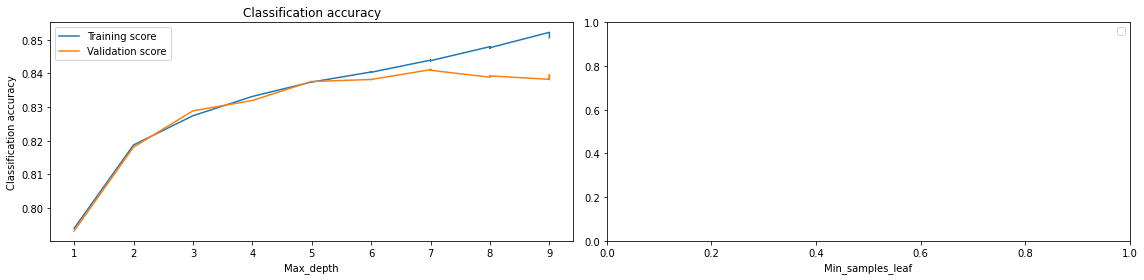

In [ ]:
plt.figure(figsize=(16, 4))
accuracy = plt.subplot(121)
leaf_plot = plt.subplot(122)
# leaf_plot.plot(leaf, plot_train, label="Training score")
# leaf_plot.plot(leaf, plot_val, label="Validation score")
accuracy.plot(degrees, plot_train, label="Training score")
accuracy.plot(degrees, plot_val, label="Validation score")
accuracy.set_title("Classification accuracy")
accuracy.set_xlabel("Max_depth")
accuracy.set_ylabel("Classification accuracy")
# leaf_plot.set_ylabel("Classification accuracy")
accuracy.legend(loc='best')
# leaf_plot.legend(loc='best')
plt.tight_layout()
plt.legend()
plt.show()

### Handle Unbalanced Data

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def fit_and_evaluate(model, X_train, y_train, X_test, y_test):
    _ = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    target_names = ['No', 'Yes']
    print(model)
    print(classification_report(y_test, y_pred, target_names=target_names))
def random_oversample(X_train, y_train, ratio=1):
    ros = RandomOverSampler(sampling_strategy=ratio, random_state=0)
    return ros.fit_sample(X_train, y_train)
def SMOTE_oversample(X_train, y_train, ratio=1):
    smote = SMOTE(sampling_strategy=ratio)
    return smote.fit_sample(X_train, y_train)
def random_undersample(X_train, y_train, ratio=1):
    rus = RandomUnderSampler(sampling_strategy=ratio, random_state=0)
    return rus.fit_sample(X_train, y_train)



####Oversampling 

##### Naive Random Oversampling

###### 1:1 ratio

In [ ]:
# 1:1 ratio
ros = RandomOverSampler(random_state=0)
X_train_ros_11, y_train_ros_11 = ros.fit_sample(X_train_transformed, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(y_train_ros).value_counts()

1    88249
0    88249
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
log_clf = LogisticRegression(random_state=0, max_iter=10000)
linear_svm = LinearSVC(random_state=0, max_iter=10000)
tree = DecisionTreeClassifier(random_state=0)

In [ ]:
_ = log_clf.fit(X_train_ros, y_train_ros)
y_pred = log_clf.predict(X_test_transformed)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.93      0.80      0.86     22067
         Yes       0.53      0.78      0.63      6372

    accuracy                           0.80     28439
   macro avg       0.73      0.79      0.75     28439
weighted avg       0.84      0.80      0.81     28439



In [ ]:
_ = linear_svm.fit(X_train_ros, y_train_ros)
y_pred = linear_svm.predict(X_test_transformed)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.93      0.81      0.86     22067
         Yes       0.54      0.78      0.64      6372

    accuracy                           0.80     28439
   macro avg       0.73      0.79      0.75     28439
weighted avg       0.84      0.80      0.81     28439



In [ ]:
_ = tree.fit(X_train_ros, y_train_ros)
y_pred = tree.predict(X_test_transformed)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.87      0.87      0.87     22067
         Yes       0.54      0.54      0.54      6372

    accuracy                           0.79     28439
   macro avg       0.70      0.70      0.70     28439
weighted avg       0.79      0.79      0.79     28439



###### 3:4 ratio

In [ ]:
ros = RandomOverSampler(random_state=0, sampling_strategy=.75)
X_train_ros_34, y_train_ros_34 = ros.fit_sample(X_train_transformed, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_ros_34, y_train_ros_34, X_test_transformed, y_test)
fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_ros_34, y_train_ros_34, X_test_transformed, y_test)
fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_ros_34, y_train_ros_34, X_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

          No       0.92      0.85      0.88     22067
         Yes       0.58      0.73      0.65      6372

    accuracy                           0.82     28439
   macro avg       0.75      0.79      0.76     28439
weighted avg       0.84      0.82      0.83     28439

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

          No       0.91      0.85      0.88     22067
         Ye

###### 2:3 ratio 

In [ ]:
X_train_ros_23, y_train_ros_23 = random_oversample(X_train_transformed, y_train, ratio=2/3)
# fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_ros_23, y_train_ros_23, X_test_transformed, y_test)
# fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_ros_23, y_train_ros_23, X_test_transformed, y_test)
# fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_ros_23, y_train_ros_23, X_test_transformed, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


###### 1:2 ratio

In [ ]:
X_train_ros_12, y_train_ros_12 = random_oversample(X_train_transformed, y_train, ratio=0.5)
# fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_ros_23, y_train_ros_23, X_test_transformed, y_test)
# fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_ros_23, y_train_ros_23, X_test_transformed, y_test)
# fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_ros_23, y_train_ros_23, X_test_transformed, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##### SMOTE 



###### 1:1

In [ ]:
X_train_smote_11, y_train_smote_11 = SMOTE_oversample(X_train_transformed, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_smote_11, y_train_smote_11, X_test_transformed, y_test)
fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_smote_11, y_train_smote_11, X_test_transformed, y_test)
fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_smote_11, y_train_smote_11, X_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

          No       0.92      0.81      0.86     22067
         Yes       0.53      0.77      0.63      6372

    accuracy                           0.80     28439
   macro avg       0.73      0.79      0.75     28439
weighted avg       0.84      0.80      0.81     28439

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

          No       0.92      0.81      0.86     22067
         Ye

###### 3:4 ratio

In [ ]:
X_train_smote_34, y_train_smote_34 = SMOTE_oversample(X_train_transformed, y_train, ratio=3/4)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_smote_34, y_train_smote_34, X_test_transformed, y_test)
fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_smote_34, y_train_smote_34, X_test_transformed, y_test)
fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_smote_34, y_train_smote_34, X_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

          No       0.91      0.85      0.88     22067
         Yes       0.58      0.72      0.65      6372

    accuracy                           0.82     28439
   macro avg       0.75      0.79      0.76     28439
weighted avg       0.84      0.82      0.83     28439

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

          No       0.91      0.85      0.88     22067
         Ye

###### 2:3 ratio

In [ ]:
X_train_smote_23, y_train_smote_23 = SMOTE_oversample(X_train_transformed, y_train, ratio=2/3)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_smote_23, y_train_smote_23, X_test_transformed, y_test)
fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_smote_23, y_train_smote_23, X_test_transformed, y_test)
fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_smote_23, y_train_smote_23, X_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

          No       0.91      0.86      0.89     22067
         Yes       0.60      0.70      0.65      6372

    accuracy                           0.83     28439
   macro avg       0.75      0.78      0.77     28439
weighted avg       0.84      0.83      0.83     28439

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

          No       0.91      0.87      0.89     22067
         Ye

###### 1:2 ratio

In [ ]:
X_train_smote_12, y_train_smote_12 = SMOTE_oversample(X_train_transformed, y_train, ratio=0.5)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_smote_12, y_train_smote_12, X_test_transformed, y_test)
fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_smote_12, y_train_smote_12, X_test_transformed, y_test)
fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_smote_12, y_train_smote_12, X_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

          No       0.90      0.90      0.90     22067
         Yes       0.65      0.64      0.64      6372

    accuracy                           0.84     28439
   macro avg       0.77      0.77      0.77     28439
weighted avg       0.84      0.84      0.84     28439

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

          No       0.89      0.90      0.90     22067
         Ye

In [ ]:
#1:1 ratio
y_pred = log_clf.predict(X_test_transformed)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.92      0.80      0.86     22067
         Yes       0.53      0.77      0.63      6372

    accuracy                           0.80     28439
   macro avg       0.73      0.79      0.75     28439
weighted avg       0.84      0.80      0.81     28439



In [ ]:
#1:3 ratio
y_pred = log_clf.predict(X_test_transformed)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.88      0.94      0.91     22067
         Yes       0.71      0.55      0.62      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.74      0.76     28439
weighted avg       0.84      0.85      0.84     28439



In [ ]:
#1:2 ratio
y_pred = log_clf.predict(X_test_transformed)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.90      0.90      0.90     22067
         Yes       0.65      0.64      0.64      6372

    accuracy                           0.84     28439
   macro avg       0.77      0.77      0.77     28439
weighted avg       0.84      0.84      0.84     28439



In [ ]:
#2:3 ratio
y_pred = log_clf.predict(X_test_transformed)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.91      0.86      0.89     22067
         Yes       0.60      0.70      0.65      6372

    accuracy                           0.83     28439
   macro avg       0.75      0.78      0.77     28439
weighted avg       0.84      0.83      0.83     28439



In [ ]:
log_clf.score(X_test_transformed, y_test)

0.8280530257744646

#### Undersampling

##### Controlled Undersampling

###### 1:1 ratio

In [ ]:
X_train_rus_11, y_train_rus_11 = random_undersample(X_train_transformed, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(y_train_rus_11).value_counts()

1    25505
0    25505
dtype: int64

In [ ]:
fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_rus_11, y_train_rus_11, X_test_transformed, y_test)
fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_rus_11, y_train_rus_11, X_test_transformed, y_test)
fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_rus_11, y_train_rus_11, X_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

          No       0.93      0.80      0.86     22067
         Yes       0.53      0.78      0.63      6372

    accuracy                           0.80     28439
   macro avg       0.73      0.79      0.75     28439
weighted avg       0.84      0.80      0.81     28439

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

          No       0.93      0.81      0.86     22067
         Ye

###### 3:4 ratio

In [ ]:
X_train_rus_34, y_train_rus_34 = random_undersample(X_train_transformed, y_train, ratio=0.75) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(y_train_rus_34).value_counts()

0    34006
1    25505
dtype: int64

In [ ]:
fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_rus_34, y_train_rus_34, X_test_transformed, y_test)
fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_rus_34, y_train_rus_34, X_test_transformed, y_test)
fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_rus_34, y_train_rus_34, X_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

          No       0.91      0.85      0.88     22067
         Yes       0.58      0.72      0.64      6372

    accuracy                           0.82     28439
   macro avg       0.75      0.79      0.76     28439
weighted avg       0.84      0.82      0.83     28439

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

          No       0.91      0.85      0.88     22067
         Ye

###### 2:3 ratio

In [ ]:
X_train_rus_23, y_train_rus_23 = random_undersample(X_train_transformed, y_train, ratio=2/3) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(y_train_rus_23).value_counts()

0    38257
1    25505
dtype: int64

In [ ]:
fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_rus_23, y_train_rus_23, X_test_transformed, y_test)
fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_rus_23, y_train_rus_23, X_test_transformed, y_test)
fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_rus_23, y_train_rus_23, X_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

          No       0.91      0.87      0.89     22067
         Yes       0.60      0.70      0.65      6372

    accuracy                           0.83     28439
   macro avg       0.76      0.78      0.77     28439
weighted avg       0.84      0.83      0.83     28439

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

          No       0.91      0.87      0.89     22067
         Ye

###### 1:2 ratio

In [ ]:
X_train_rus_12, y_train_rus_12 = random_undersample(X_train_transformed, y_train, ratio=0.5) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_rus_12.shape

(76515, 118)

In [ ]:
pd.Series(y_train_rus_12).value_counts()

0    51010
1    25505
dtype: int64

In [ ]:
fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_rus_12, y_train_rus_12, X_test_transformed, y_test)
fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_rus_12, y_train_rus_12, X_test_transformed, y_test)
fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_rus_12, y_train_rus_12, X_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

          No       0.89      0.90      0.90     22067
         Yes       0.65      0.63      0.64      6372

    accuracy                           0.84     28439
   macro avg       0.77      0.77      0.77     28439
weighted avg       0.84      0.84      0.84     28439

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

          No       0.89      0.90      0.90     22067
         Ye

##### Cleaning Undersampling

###### Tomek Links

In [ ]:
tomek = TomekLinks(random_state=0, n_jobs=-1)

In [ ]:
X_train_tomek, y_train_tomek = tomek.fit_sample(X_train_transformed, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(y_train_tomek).value_counts()

0    81474
1    25505
dtype: int64

In [ ]:
fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_tomek, y_train_tomek, X_test_transformed, y_test)
fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_tomek, y_train_tomek, X_test_transformed, y_test)
fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_tomek, y_train_tomek, X_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

          No       0.88      0.93      0.91     22067
         Yes       0.70      0.56      0.62      6372

    accuracy                           0.85     28439
   macro avg       0.79      0.75      0.76     28439
weighted avg       0.84      0.85      0.84     28439

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

          No       0.88      0.94      0.91     22067
         Ye

###### Editted Nearest Neighbor

In [ ]:
enn_all = EditedNearestNeighbours(kind_sel='all')
enn_mode = EditedNearestNeighbours(kind_sel='mode')

In [ ]:
X_train_enn_all, y_train_enn_all = enn_all.fit_sample(X_train_transformed, y_train)
X_train_enn_mode, y_train_enn_mode = enn_mode.fit_sample(X_train_transformed, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_train_enn_mode.shape

(105466, 118)

In [ ]:
pd.Series(y_train_enn_all).value_counts()

0    58889
1    25505
dtype: int64

In [ ]:
pd.Series(y_train_enn_mode).value_counts()

0    79961
1    25505
dtype: int64

In [ ]:
fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_enn_all, y_train_enn_all, X_test_transformed, y_test)
fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_enn_all, y_train_enn_all, X_test_transformed, y_test)
fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_enn_all, y_train_enn_all, X_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

          No       0.91      0.85      0.88     22067
         Yes       0.58      0.72      0.64      6372

    accuracy                           0.82     28439
   macro avg       0.75      0.78      0.76     28439
weighted avg       0.84      0.82      0.83     28439

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

          No       0.91      0.86      0.88     22067
         Ye

In [ ]:
fit_and_evaluate(LogisticRegression(random_state=0, max_iter=10000), X_train_enn_mode, y_train_enn_mode, X_test_transformed, y_test)
fit_and_evaluate(LinearSVC(random_state=0, max_iter=10000), X_train_enn_mode, y_train_enn_mode, X_test_transformed, y_test)
fit_and_evaluate(DecisionTreeClassifier(random_state=0), X_train_enn_mode, y_train_enn_mode, X_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

          No       0.89      0.92      0.90     22067
         Yes       0.68      0.59      0.63      6372

    accuracy                           0.85     28439
   macro avg       0.78      0.76      0.77     28439
weighted avg       0.84      0.85      0.84     28439

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

          No       0.88      0.92      0.90     22067
         Ye

In [ ]:
# 1:3 ratio - no sampling
y_pred = log_clf.predict(X_test_transformed)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



In [ ]:
# 1:3 ratio - TomeK Links
y_pred = log_clf.predict(X_test_transformed)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.88      0.93      0.91     22067
         Yes       0.70      0.56      0.62      6372

    accuracy                           0.85     28439
   macro avg       0.79      0.75      0.76     28439
weighted avg       0.84      0.85      0.84     28439



#### Combine

##### SMOTETomeK

In [ ]:
smote_tomek = SMOTETomek(random_state=0)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_sample(X_train_transformed, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##### SMOTEENN

In [ ]:
smote_enn = SMOTEENN(random_state=0)
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_sample(X_train_transformed, y_train)

#### Class Weights

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(LogisticRegression(class_weight='balance'), X_train_transformed, y_train, cv=5, n_jobs=-1, scoring=['roc_auc', 'f1'], return_train_score=True, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.5s finished


In [ ]:
scores 

{'fit_time': array([5.52871084, 5.66914654, 5.3084178 , 5.29882812, 3.19924784]),
 'score_time': array([0.05131459, 0.05093265, 0.04524946, 0.04461932, 0.0280056 ]),
 'test_f1': array([0.60036664, 0.59551341, 0.5945758 , 0.6026444 , 0.60163727]),
 'test_roc_auc': array([0.86746188, 0.86593195, 0.87193621, 0.87292159, 0.86923002]),
 'train_f1': array([0.59954973, 0.60104284, 0.60042723, 0.5970944 , 0.59883906]),
 'train_roc_auc': array([0.87092843, 0.87138209, 0.87001671, 0.86969852, 0.87056826])}

In [ ]:
class_weights = ['auto', 'balance', {0: .3, 1:.7}, {0: .2, 1: .8}, {0: .4, 1:.6}]

In [ ]:
for class_weight in class_weights: 
    print('Class weight: {}'.format(class_weight))
    logreg = LogisticRegression(class_weight=class_weight, max_iter=10000)
    _  = logreg.fit(X_train_transformed, y_train)
    print('Accuracy: {}'.format(logreg.score(X_test_transformed, y_test)))
    y_pred = logreg.predict(X_test_transformed)
    target_names = ['No', 'Yes']
    print(classification_report(y_test, y_pred, target_names=target_names))
    print('-'*50)

Class weight: auto
Accuracy: 0.850170540455009
              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439

--------------------------------------------------
Class weight: balance
Accuracy: 0.850170540455009
              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439

--------------------------------------------------
Class weight: {0: 0.3, 1: 0.7}
Accuracy: 0.8286156334610921
              precision    recall  f1-score   support

          No       0.91      0.8

In [ ]:
y_pred = logreg.predict(X_test_transformed)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.93      0.80      0.86     22067
         Yes       0.53      0.78      0.63      6372

    accuracy                           0.80     28439
   macro avg       0.73      0.79      0.75     28439
weighted avg       0.84      0.80      0.81     28439



In [ ]:
logreg.score(X_test_transformed, y_test)

0.850170540455009

#### Save dataset

In [ ]:
import os 

In [ ]:
import numpy as np


In [ ]:
SAVE_DIR = 'datasets'

In [ ]:
np.save(os.path.join(SAVE_DIR, 'X_train_ros_11.npy'), X_train_ros_11)
np.save(os.path.join(SAVE_DIR, 'y_train_ros_11.npy'), y_train_ros_11)
np.save(os.path.join(SAVE_DIR, 'X_train_ros_34.npy'), X_train_ros_34)
np.save(os.path.join(SAVE_DIR, 'y_train_ros_34.npy'), y_train_ros_34)
np.save(os.path.join(SAVE_DIR, 'X_train_ros_23.npy'), X_train_ros_23)
np.save(os.path.join(SAVE_DIR, 'y_train_ros_23.npy'), y_train_ros_23)
np.save(os.path.join(SAVE_DIR, 'X_train_ros_12.npy'), X_train_ros_12)
np.save(os.path.join(SAVE_DIR, 'y_train_ros_12.npy'), y_train_ros_12)

In [ ]:
np.save(os.path.join(SAVE_DIR, 'X_train_smote_11.npy'), X_train_smote_11)
np.save(os.path.join(SAVE_DIR, 'y_train_smote_11.npy'), y_train_smote_11)
np.save(os.path.join(SAVE_DIR, 'X_train_smote_34.npy'), X_train_smote_34)
np.save(os.path.join(SAVE_DIR, 'y_train_smote_34.npy'), y_train_smote_34)
np.save(os.path.join(SAVE_DIR, 'X_train_smote_23.npy'), X_train_smote_23)
np.save(os.path.join(SAVE_DIR, 'y_train_smote_23.npy'), y_train_smote_23)
np.save(os.path.join(SAVE_DIR, 'X_train_smote_12.npy'), X_train_smote_12)
np.save(os.path.join(SAVE_DIR, 'y_train_smote_12.npy'), y_train_smote_12)


In [ ]:
np.save(os.path.join(SAVE_DIR, 'X_train_rus_11.npy'), X_train_rus_11)
np.save(os.path.join(SAVE_DIR, 'y_train_rus_11.npy'), y_train_rus_11)
np.save(os.path.join(SAVE_DIR, 'X_train_rus_34.npy'), X_train_rus_34)
np.save(os.path.join(SAVE_DIR, 'y_train_rus_34.npy'), y_train_rus_34)
np.save(os.path.join(SAVE_DIR, 'X_train_rus_23.npy'), X_train_rus_23)
np.save(os.path.join(SAVE_DIR, 'y_train_rus_23.npy'), y_train_rus_23)
np.save(os.path.join(SAVE_DIR, 'X_train_rus_12.npy'), X_train_rus_12)
np.save(os.path.join(SAVE_DIR, 'y_train_rus_12.npy'), y_train_rus_12)

In [ ]:
np.save(os.path.join(SAVE_DIR, 'X_train_tomek.npy'), X_train_tomek)
np.save(os.path.join(SAVE_DIR, 'y_train_tomek.npy'), y_train_tomek)
np.save(os.path.join(SAVE_DIR, 'X_train_enn_all.npy'), X_train_enn_all)
np.save(os.path.join(SAVE_DIR, 'y_train_enn_all.npy'), y_train_enn_all)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC, SVC 

### Evaluation

##### Classification report

In [50]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier

In [51]:
best_logistic_clf = LogisticRegression(C=0.5, max_iter=10000, random_state=0)
best_svm_clf = SVC(kernel='poly', degree=2, gamma='scale', C=1, random_state=0)
best_tree_clf = DecisionTreeClassifier(max_depth=8, random_state=0)

In [52]:
_ = best_logistic_clf.fit(X_train_transformed, y_train)
# _ = best_svm_clf.fit(X_train_transformed, y_train)
_ = best_tree_clf.fit(X_train_transformed, y_train)

In [53]:
# with open('best_svm.pkl', 'wb') as f:
#     pickle.dump(best_svm_clf, f)

In [53]:
with open('best_svm.pkl', 'rb') as f:
    best_svm_clf = pickle.load(f)

In [55]:
best_svm_clf

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [54]:
y_pred_log = best_logistic_clf.predict(X_test_transformed)
y_pred_svm = best_svm_clf.predict(X_test_transformed)
y_pred_tree = best_tree_clf.predict(X_test_transformed)

In [55]:
# target_names = ['No', 'Yes']
print('Logistic Regression report:')
print(classification_report(y_test, y_pred_log))
print('-'*50)
print('SVM report:')
print(classification_report(y_test, y_pred_svm))
print('-'*50)
print('Decision Tree report:')
print(classification_report(y_test, y_pred_tree))
print('-'*50)

Logistic Regression report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22067
           1       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439

--------------------------------------------------
SVM report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22067
           1       0.79      0.50      0.61      6372

    accuracy                           0.86     28439
   macro avg       0.83      0.73      0.76     28439
weighted avg       0.85      0.86      0.85     28439

--------------------------------------------------
Decision Tree report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22067
           1       0.73      0.46      0.57      6372

    accuracy      

##### Confusion Matrix

Logistic Regression confusion matrix:


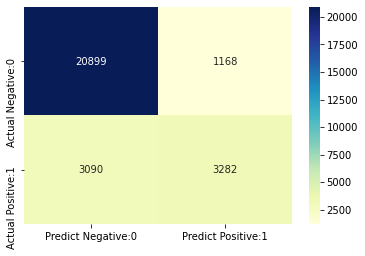

In [56]:
#confusion matrix
print('Logistic Regression confusion matrix:')
cm_log = confusion_matrix(y_test, y_pred_log)
# visualize confusion matrix with seaborn heatmap
cm_log_matrix = pd.DataFrame(data=cm_log, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_log_matrix, annot=True, fmt='d', cmap='YlGnBu')



SVM confusion matrix:


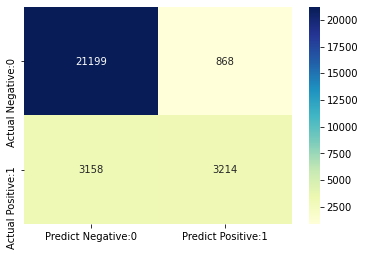

In [57]:

print('SVM confusion matrix:')
cm_svm = confusion_matrix(y_test, y_pred_svm)
# visualize confusion matrix with seaborn heatmap
cm_svm_matrix = pd.DataFrame(data=cm_svm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_svm_matrix, annot=True, fmt='d', cmap='YlGnBu')


Decision Tree confusion matrix:


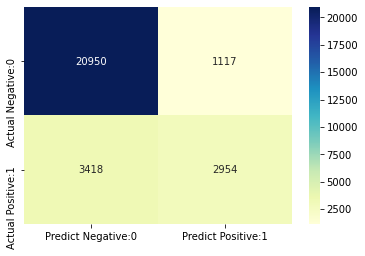

In [58]:
print('Decision Tree confusion matrix:')
cm_tree = confusion_matrix(y_test, y_pred_tree)
# visualize confusion matrix with seaborn heatmap
cm_tree_matrix = pd.DataFrame(data=cm_tree, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_tree_matrix, annot=True, fmt='d', cmap='YlGnBu')


##### Misclassified examples analysis

In [59]:
X_test_pos = X_test.iloc[np.where(y_test == 1)[0]]
X_test_neg = X_test.iloc[np.where(y_test == 0)[0]]

In [60]:
X_test_pos.shape, X_test_neg.shape 

((6372, 118), (22067, 118))

In [61]:
#logistic predictions
log_pos_pred_idx = np.where(y_pred_log == 1)[0]
log_negative_pred_idx = np.where(y_pred_log == 0)[0]
log_false_pos_pred_idx = np.where(y_test[log_pos_pred_idx] == 0)[0]
log_false_neg_pred_idx = np.where(y_test[log_negative_pred_idx] == 1)[0]

#svm predictions
svm_pos_pred_idx = np.where(y_pred_svm == 1)[0]
svm_negative_pred_idx = np.where(y_pred_svm == 0)[0]
svm_false_pos_pred_idx = np.where(y_test[svm_pos_pred_idx] == 0)[0]
svm_false_neg_pred_idx = np.where(y_test[svm_negative_pred_idx] == 1)[0]

#decision tree
tree_pos_pred_idx = np.where(y_pred_tree == 1)[0]
tree_negative_pred_idx = np.where(y_pred_tree == 0)[0]
tree_false_pos_pred_idx = np.where(y_test[tree_pos_pred_idx] == 0)[0]
tree_false_neg_pred_idx = np.where(y_test[tree_negative_pred_idx] == 1)[0]

In [62]:
#logistic 
X_test_log_false_pos = X_test.iloc[log_false_pos_pred_idx]
X_test_log_false_neg = X_test.iloc[log_false_neg_pred_idx]

#decision tree 
X_test_tree_false_pos = X_test.iloc[tree_false_pos_pred_idx]
X_test_tree_false_neg = X_test.iloc[tree_false_neg_pred_idx]

#svm
X_test_svm_false_pos = X_test.iloc[svm_false_pos_pred_idx]
X_test_svm_false_neg = X_test.iloc[svm_false_neg_pred_idx]

In [63]:
from sklearn.inspection import permutation_importance
# feature importance logistic
log_feat_importance = permutation_importance(best_logistic_clf, X_test_transformed, y_test, n_jobs = -1, random_state=0)
for i in log_feat_importance.importances_mean.argsort()[::-1][:10]:
    print(f"{X_test.columns[i]:<8} "
        f"{log_feat_importance.importances_mean[i]:.3f}")

Humidity3pm 0.075
Pressure3pm 0.047
WindGustSpeed 0.028
Pressure9am 0.015
Rainfall 0.007
MaxTemp  0.006
Sunshine 0.005
Cloud3pm 0.004
WindSpeed3pm 0.002
Location_Wollongong 0.001


In [64]:
log_important_cols = X_test.columns[log_feat_importance.importances_mean.argsort()[::-1][:9]].values.tolist()

In [65]:
log_important_cols

['Humidity3pm',
 'Pressure3pm',
 'WindGustSpeed',
 'Pressure9am',
 'Rainfall',
 'MaxTemp',
 'Sunshine',
 'Cloud3pm',
 'WindSpeed3pm']

In [66]:
X_test_log_false_pos.shape, X_test_log_false_neg.shape

((1168, 118), (3090, 118))

Plot the distribution of false positive examples (misclassified negative examples) and positive examples to see similarities

In [67]:
false_pos_label = 'False Positive'
pos_label = 'Positive'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


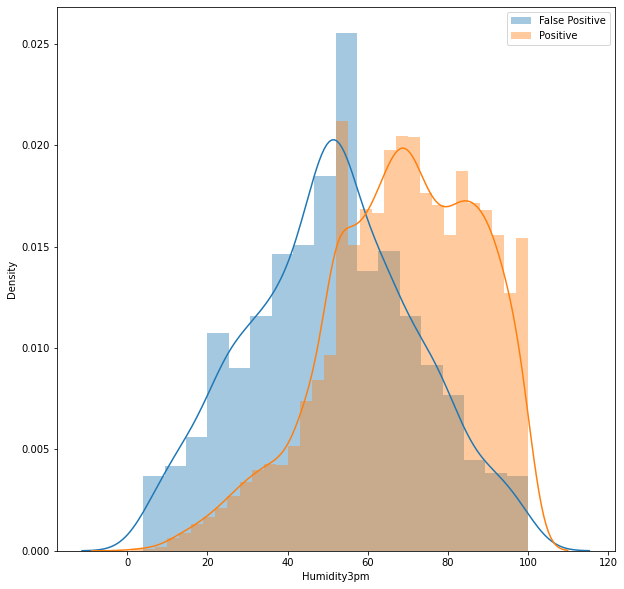

In [68]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_pos['Humidity3pm'], label=false_pos_label)
sns.distplot(X_test_pos['Humidity3pm'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


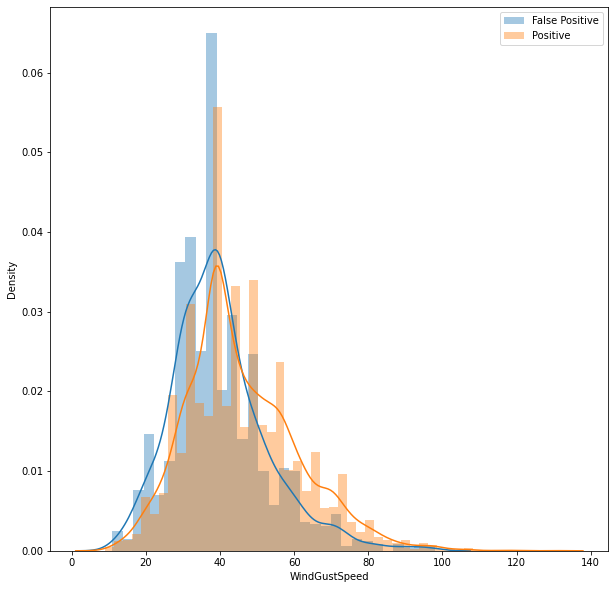

In [70]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_pos['WindGustSpeed'], label=false_pos_label)
sns.distplot(X_test_pos['WindGustSpeed'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


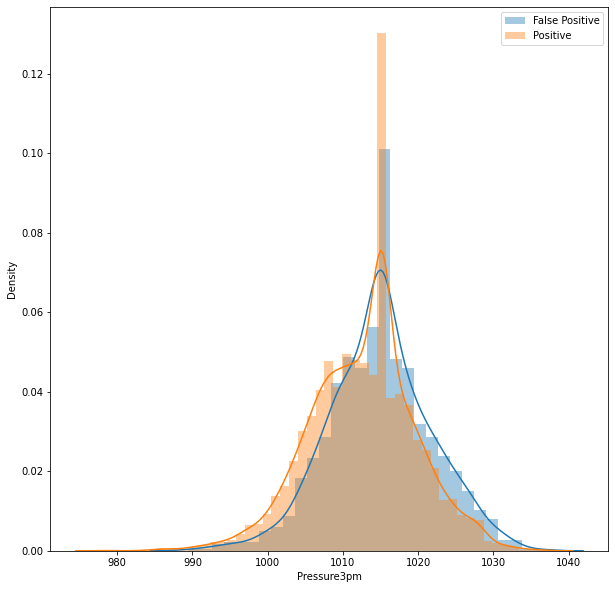

In [71]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_pos['Pressure3pm'], label=false_pos_label)
sns.distplot(X_test_pos['Pressure3pm'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


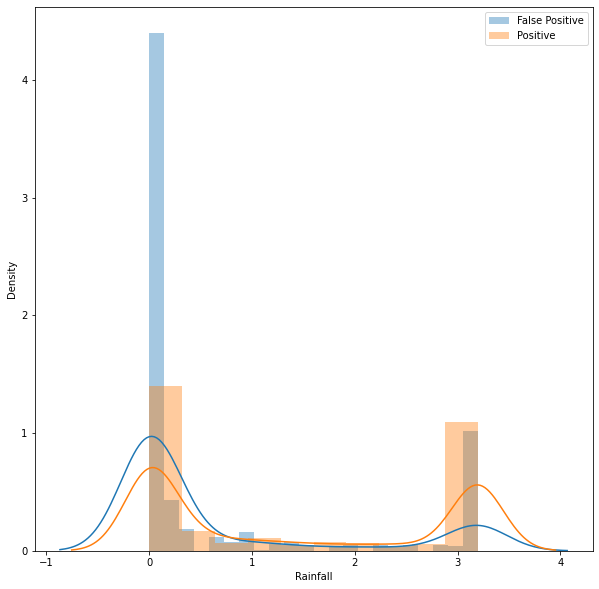

In [72]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_pos['Rainfall'], label=false_pos_label)
sns.distplot(X_test_pos['Rainfall'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


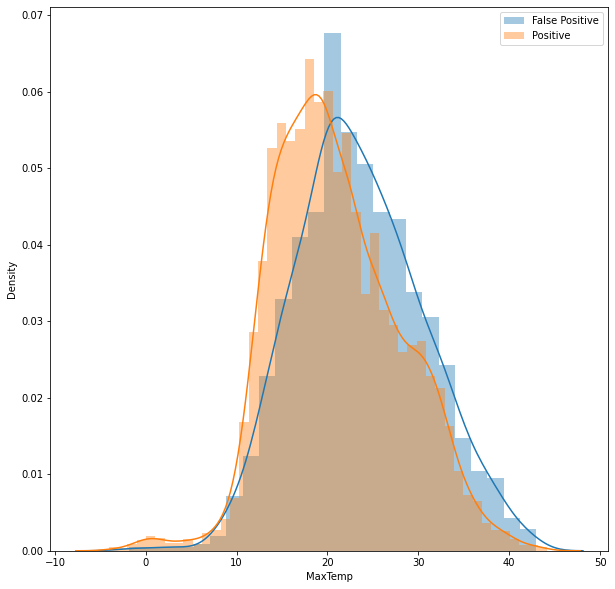

In [73]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_pos['MaxTemp'], label=false_pos_label)
sns.distplot(X_test_pos['MaxTemp'], label=pos_label)
plt.legend()

Plot the distribution of false negative examples (misclassified negative examples) and positive examples to see similarities

In [75]:
false_neg_label = 'False Negative'
neg_label = 'Negative'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


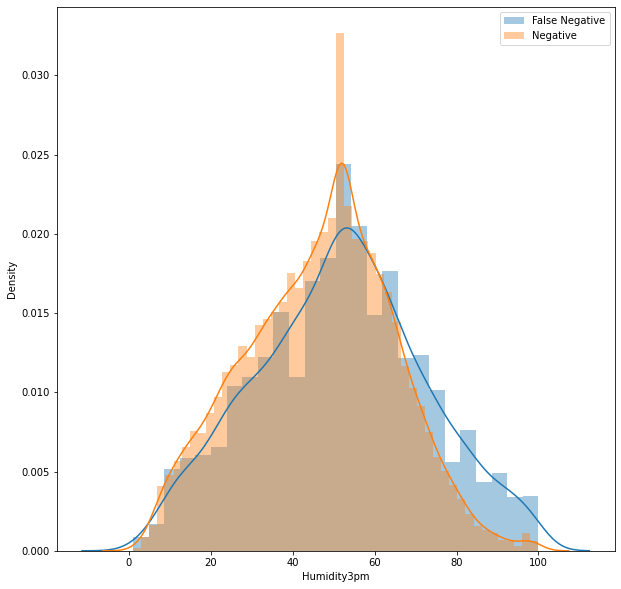

In [78]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_neg['Humidity3pm'], label=false_neg_label)
sns.distplot(X_test_neg['Humidity3pm'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


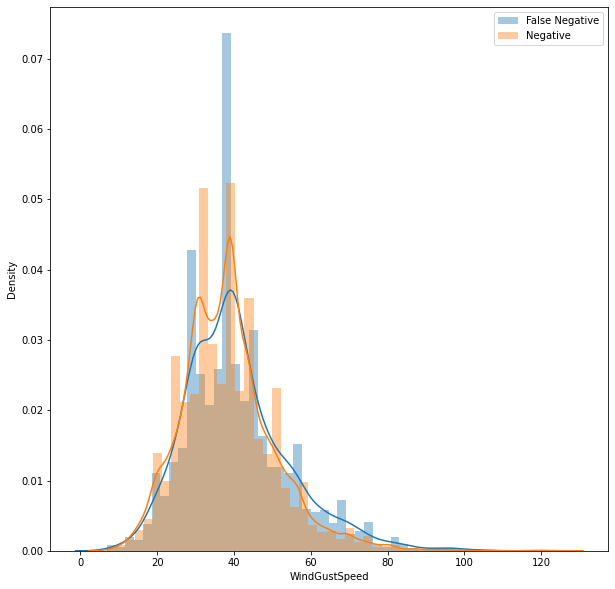

In [81]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_neg['WindGustSpeed'], label=false_neg_label)
sns.distplot(X_test_neg['WindGustSpeed'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


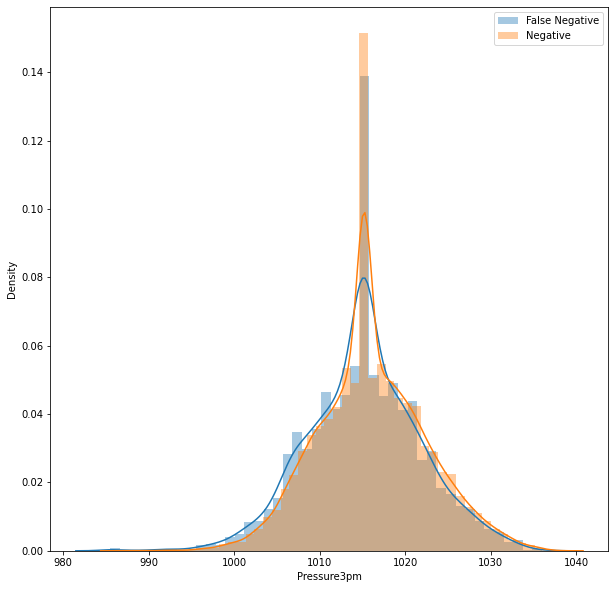

In [82]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_neg['Pressure3pm'], label=false_neg_label)
sns.distplot(X_test_neg['Pressure3pm'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


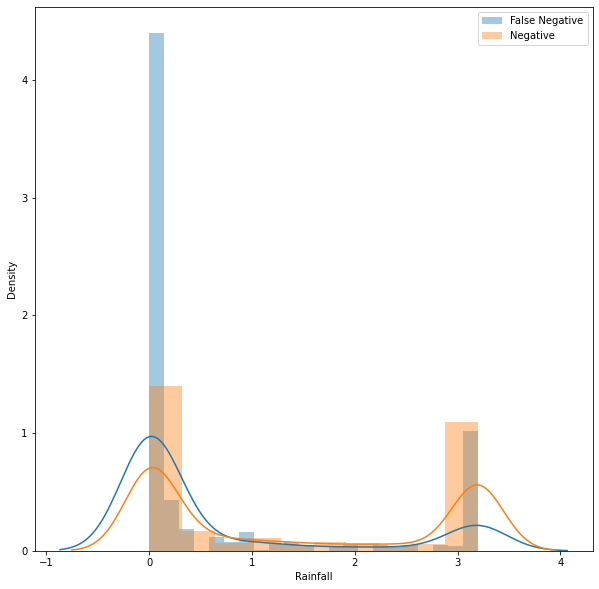

In [83]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_pos['Rainfall'], label=false_neg_label)
sns.distplot(X_test_pos['Rainfall'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


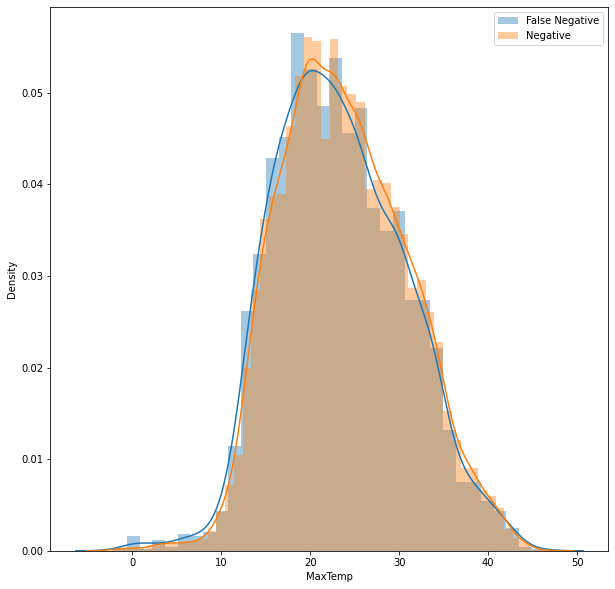

In [80]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_neg['MaxTemp'], label=false_neg_label)
sns.distplot(X_test_neg['MaxTemp'], label=neg_label)
plt.legend()

In [87]:
# important features for decision tree
for i in best_tree_clf.feature_importances_.argsort()[::-1][:10]:
         print(f"{X_test.columns[i]:<8} "
               f"{best_tree_clf.feature_importances_[i]:.3f}")

Humidity3pm 0.652
WindGustSpeed 0.098
Pressure3pm 0.072
Sunshine 0.057
Rainfall 0.045
Temp9am  0.014
Cloud3pm 0.010
Humidity9am 0.008
WindSpeed3pm 0.006
MaxTemp  0.006


Visualize tree plots to see similarities between misclassified examples and misclassified class distribution

In [84]:
tree_important_cols = X_test.columns[best_tree_clf.feature_importances_.argsort()[::-1][:10]].values.tolist()

In [85]:
tree_important_cols

['Humidity3pm',
 'WindGustSpeed',
 'Pressure3pm',
 'Sunshine',
 'Rainfall',
 'Temp9am',
 'Cloud3pm',
 'Humidity9am',
 'WindSpeed3pm',
 'MaxTemp']

False postive examples

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


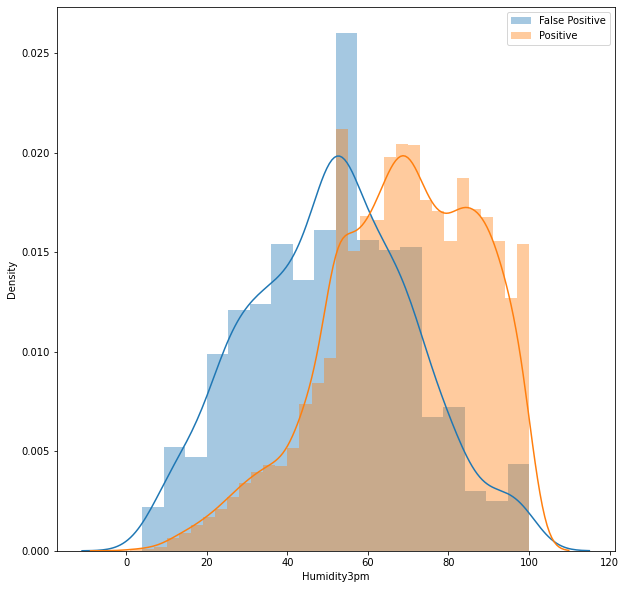

In [94]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_pos['Humidity3pm'], label=false_pos_label)
sns.distplot(X_test_pos['Humidity3pm'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


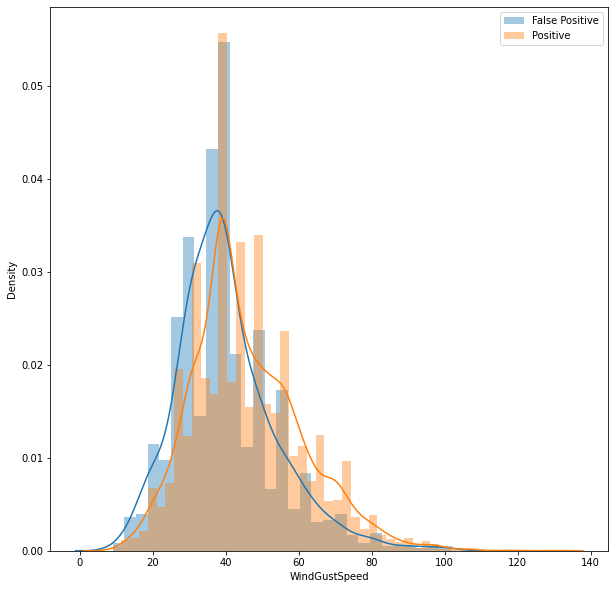

In [95]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_pos['WindGustSpeed'], label=false_pos_label)
sns.distplot(X_test_pos['WindGustSpeed'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


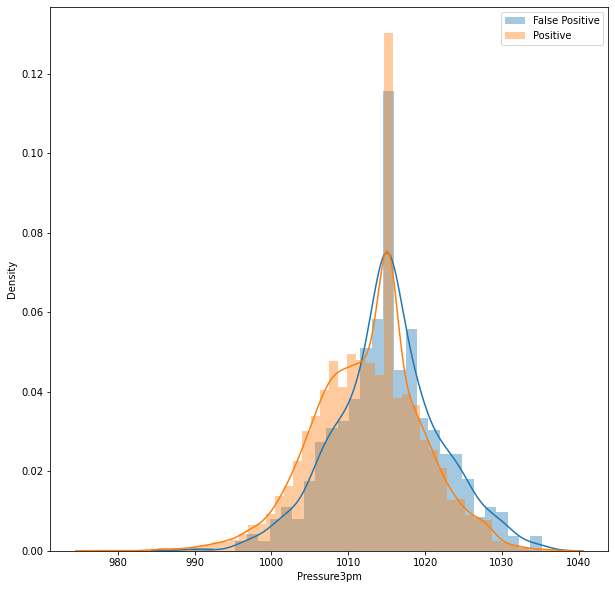

In [96]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_pos['Pressure3pm'], label=false_pos_label)
sns.distplot(X_test_pos['Pressure3pm'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


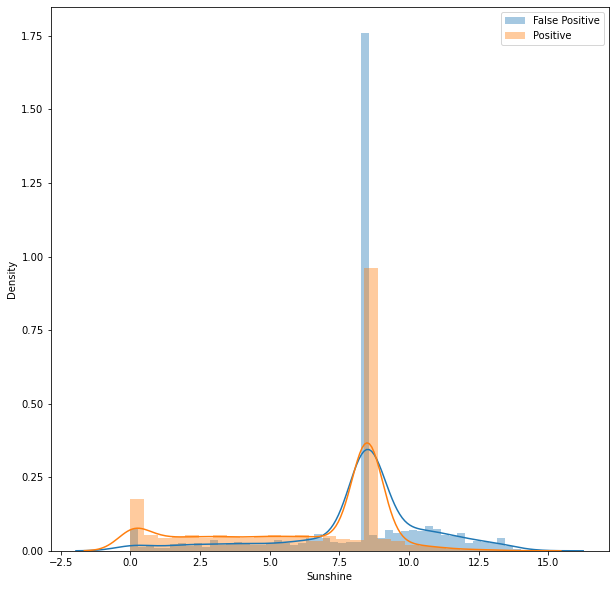

In [98]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_pos['Sunshine'], label=false_pos_label)
sns.distplot(X_test_pos['Sunshine'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


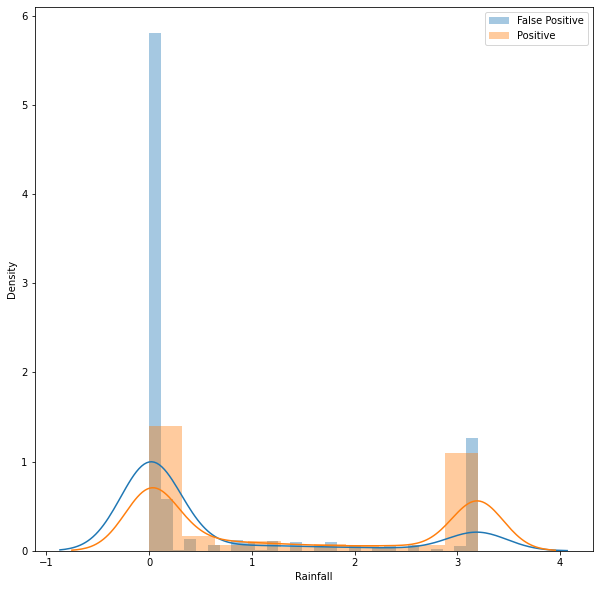

In [100]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_pos['Rainfall'], label=false_pos_label)
sns.distplot(X_test_pos['Rainfall'], label=pos_label)
plt.legend()

False Negative Examples

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


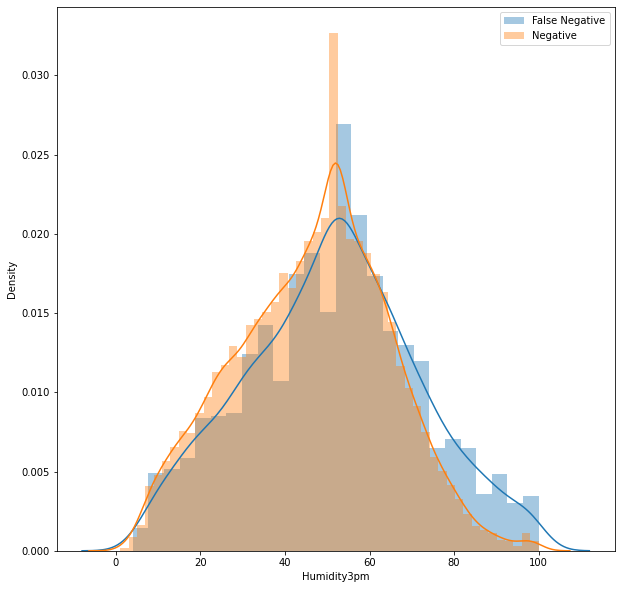

In [87]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_neg['Humidity3pm'], label=false_neg_label)
sns.distplot(X_test_neg['Humidity3pm'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


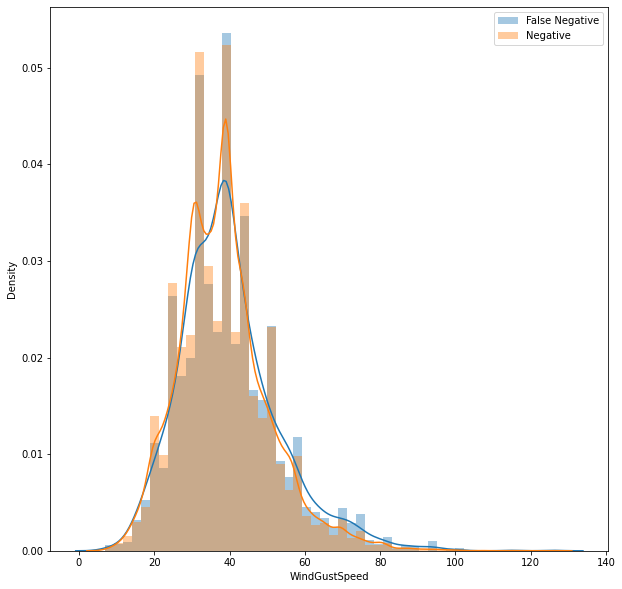

In [88]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_neg['WindGustSpeed'], label=false_neg_label)
sns.distplot(X_test_neg['WindGustSpeed'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


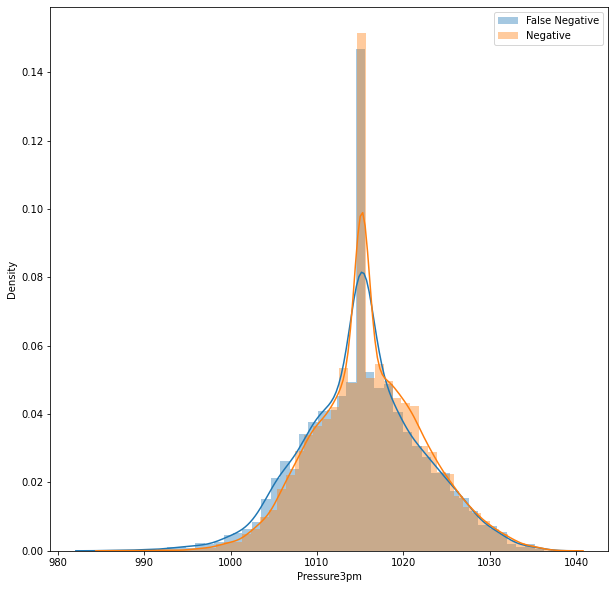

In [89]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_neg['Pressure3pm'], label=false_neg_label)
sns.distplot(X_test_neg['Pressure3pm'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


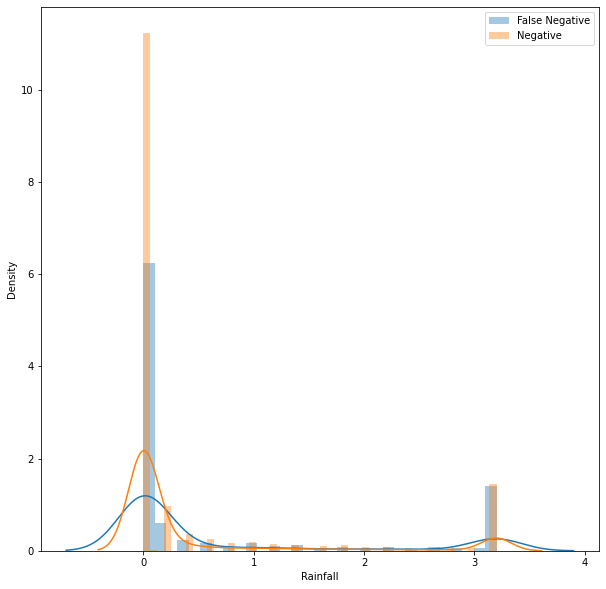

In [90]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_neg['Rainfall'], label=false_neg_label)
sns.distplot(X_test_neg['Rainfall'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


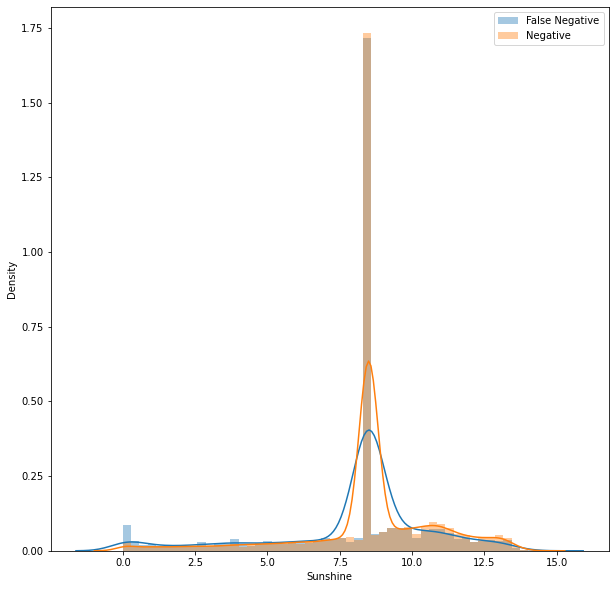

In [91]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_neg['Sunshine'], label=false_neg_label)
sns.distplot(X_test_neg['Sunshine'], label=neg_label)
plt.legend()

In [ ]:
# svm feature importance 
svm_feat_importance = permutation_importance(best_svm_clf, X_test_transformed, y_test, n_repeats=3, n_jobs = -1, random_state=0)


#### Logistic Regression

##### Evaluate on resampled data

In [70]:
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import os 
import pickle
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_fscore_support

In [81]:
datasets = os.listdir('datasets')

In [82]:
datasets

['X_train_ros_11.npy',
 'y_train_ros_11.npy',
 'X_train_ros_34.npy',
 'y_train_ros_34.npy',
 'X_train_ros_23.npy',
 'y_train_ros_23.npy',
 'X_train_ros_12.npy',
 'y_train_ros_12.npy',
 'X_train_smote_11.npy',
 'y_train_smote_11.npy',
 'X_train_smote_34.npy',
 'y_train_smote_34.npy',
 'X_train_smote_23.npy',
 'y_train_smote_23.npy',
 'X_train_smote_12.npy',
 'y_train_smote_12.npy',
 'X_train_rus_11.npy',
 'y_train_rus_11.npy',
 'X_train_rus_34.npy',
 'y_train_rus_34.npy',
 'X_train_rus_23.npy',
 'y_train_rus_23.npy',
 'X_train_rus_12.npy',
 'y_train_rus_12.npy',
 'X_train_tomek.npy',
 'y_train_tomek.npy',
 'X_train_enn_all.npy',
 'y_train_enn_all.npy',
 'X_train_origin.csv']

In [ ]:
os.listdir(SAVE_DIR)

['logistic_C_1000.pkl',
 'logistic_C_10000.pkl',
 'logistic_C_100.pkl',
 'logistic_C_10.pkl',
 'logistic_C_0.001.pkl',
 'logistic_C_0.01.pkl',
 'logistic_C_1.pkl',
 'logistic_C_0.0001.pkl',
 'logistic_C_0.1.pkl',
 'logistic_C_0.5.pkl',
 'logistic_C_0.0005.pkl',
 'logistic_C_0.005.pkl',
 'logistic_C_0.05.pkl',
 'best_model.pkl']

In [71]:
SAVE_DIR = 'grid_search_logistic'
with open(os.path.join(SAVE_DIR, 'best_model.pkl'), 'rb') as f:
    best_log_clf = pickle.load(f)

In [ ]:
best_log_clf

{'fit_time': 7.019522190093994,
 'model': LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=10000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'train_score': 0.8475654648747843,
 'validation_score': 0.8474352775702166}

In [72]:
original_log_clf = LogisticRegression()
original_log_clf.set_params(**best_log_clf['model'].get_params())

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
_ = original_log_clf.fit(X_train_transformed, y_train)
y_pred = original_log_clf.predict(X_test_transformed)
original_log_score = precision_recall_fscore_support(y_test, y_pred)

In [74]:
original_log_score

(array([0.87119096, 0.73752809]),
 array([0.94707029, 0.51506591]),
 array([0.90754733, 0.60654223]),
 array([22067,  6372]))

In [75]:
iter = ['original', '1-2', '2-3', '3-4','1-1']

(array([0.89510175, 0.64910872]), array([0.90098337, 0.63433773]), array([0.89803293, 0.64163823]), array([22067,  6372]))
(array([0.90938511, 0.6015888 ]), array([0.86590837, 0.70119272]), array([0.88711437, 0.64758316]), array([22067,  6372]))
(array([0.91504226, 0.58130489]), array([0.84877872, 0.72708726]), array([0.88066579, 0.64607447]), array([22067,  6372]))
(array([0.92745489, 0.53216   ]), array([0.80124167, 0.78295669]), array([0.85974083, 0.6336445 ]), array([22067,  6372]))


Text(0.5, 1.0, 'Random OverSample')

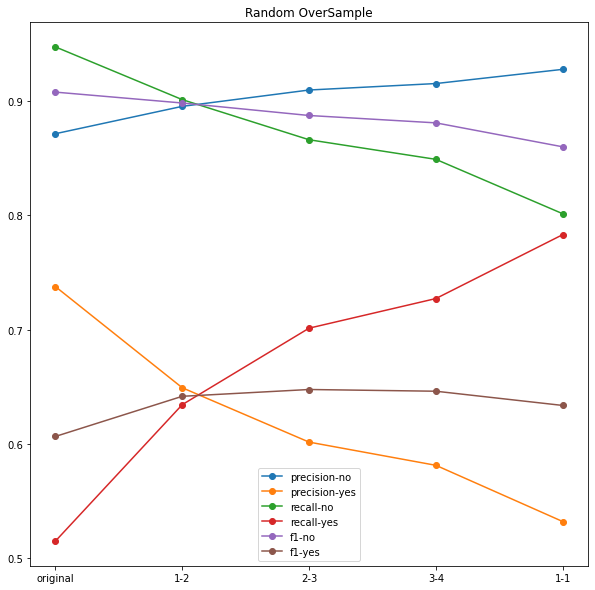

In [83]:
precisons1_log_over = []
precisons0_log_over = []
recalls1_log_over = []
recalls0_log_over = []
f1s1_log_over = []
f1s0_log_over = []
precisons0_log_over.append(original_log_score[0][0])
precisons1_log_over.append(original_log_score[0][1])
recalls0_log_over.append(original_log_score[1][0])
recalls1_log_over.append(original_log_score[1][1])
f1s0_log_over.append(original_log_score[2][0])
f1s1_log_over.append(original_log_score[2][1])
for i in range(3,-1, -1):
    X_train_resampled = np.load('datasets/{}'.format(datasets[i*2]))
    y_train_resampled = np.load('datasets/{}'.format(datasets[i*2+1]))
    model = LogisticRegression(C=0.5, max_iter=10000, random_state=0)
    model.fit(X_train_resampled, y_train_resampled)
    # model = resampled_models[i][1]
    # print(resampled_models[i][0])
    y_pred = model.predict(X_test_transformed)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0_log_over.append(score[0][0])
    precisons1_log_over.append(score[0][1])
    recalls0_log_over.append(score[1][0])
    recalls1_log_over.append(score[1][1])
    f1s0_log_over.append(score[2][0])
    f1s1_log_over.append(score[2][1])
    print(score)

# print(len(iter))
# print(precisons0_log_over)
plt.figure(figsize=(10,10))
plt.plot(iter, precisons0_log_over,'-o')
plt.plot(iter, precisons1_log_over,'-o')
plt.plot(iter, recalls0_log_over,'-o')
plt.plot(iter, recalls1_log_over,'-o')
plt.plot(iter, f1s0_log_over,'-o')
plt.plot(iter, f1s1_log_over,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Random OverSample')

(array([0.89613145, 0.64762965]), array([0.89962387, 0.63888889]), array([0.89787427, 0.64322958]), array([22067,  6372]))
(array([0.90944638, 0.59895554]), array([0.86427697, 0.7019774 ]), array([0.88628654, 0.64638728]), array([22067,  6372]))
(array([0.91407241, 0.58036501]), array([0.84891467, 0.72363465]), array([0.88028947, 0.64412936]), array([22067,  6372]))
(array([0.92470992, 0.53416486]), array([0.80536548, 0.77291274]), array([0.86092138, 0.63173422]), array([22067,  6372]))


Text(0.5, 1.0, 'SMOTE')

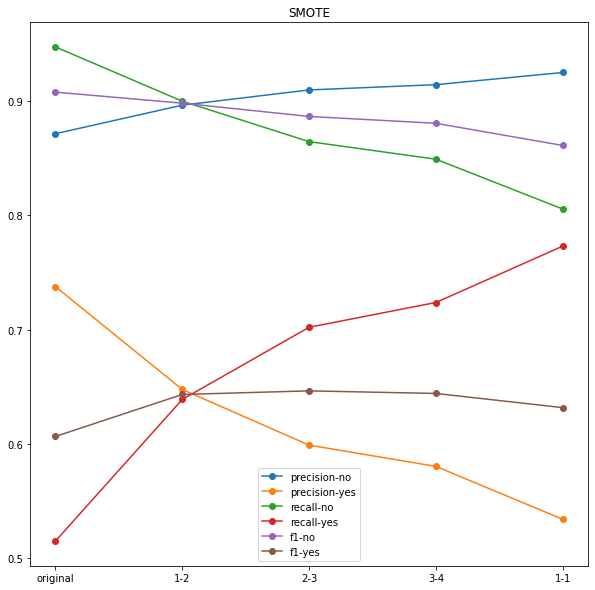

In [84]:
precisons1_log_smote = []
precisons0_log_smote = []
recalls1_log_smote = []
recalls0_log_smote = []
f1s1_log_smote = []
f1s0_log_smote = []
precisons0_log_smote.append(original_log_score[0][0])
precisons1_log_smote.append(original_log_score[0][1])
recalls0_log_smote.append(original_log_score[1][0])
recalls1_log_smote.append(original_log_score[1][1])
f1s0_log_smote.append(original_log_score[2][0])
f1s1_log_smote.append(original_log_score[2][1])
for i in range(7,3, -1):
    X_train_resampled = np.load('datasets/{}'.format(datasets[2*i]))
    y_train_resampled = np.load('datasets/{}'.format(datasets[2*i+1]))
    model = LogisticRegression(C=0.5, max_iter=10000, random_state=0)
    model.fit(X_train_resampled, y_train_resampled)
    # model = resampled_models[i][1]
    # print(resampled_models[i][0])
    y_pred = model.predict(X_test_transformed)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0_log_smote.append(score[0][0])
    precisons1_log_smote.append(score[0][1])
    recalls0_log_smote.append(score[1][0])
    recalls1_log_smote.append(score[1][1])
    f1s0_log_smote.append(score[2][0])
    f1s1_log_smote.append(score[2][1])
    print(score)
plt.figure(figsize=(10,10))
plt.plot(iter, precisons0_log_smote,'-o')
plt.plot(iter, precisons1_log_smote,'-o')
plt.plot(iter, recalls0_log_smote,'-o')
plt.plot(iter, recalls1_log_smote,'-o')
plt.plot(iter, f1s0_log_smote,'-o')
plt.plot(iter, f1s1_log_smote,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('SMOTE')

X_train_rus_12.npy
y_train_rus_12.npy
(array([0.89513698, 0.65072464]), array([0.90170843, 0.63418079]), array([0.89841069, 0.64234621]), array([22067,  6372]))
X_train_rus_23.npy
y_train_rus_23.npy
(array([0.90917732, 0.60300081]), array([0.86690533, 0.70009416]), array([0.88753828, 0.64793028]), array([22067,  6372]))
X_train_rus_34.npy
y_train_rus_34.npy
(array([0.91416581, 0.58054367]), array([0.84895999, 0.72394852]), array([0.88035714, 0.64436374]), array([22067,  6372]))
X_train_rus_11.npy
y_train_rus_11.npy
(array([0.92661176, 0.53039676]), array([0.80047129, 0.7804457 ]), array([0.85893508, 0.63157226]), array([22067,  6372]))


Text(0.5, 1.0, 'Random Undersample')

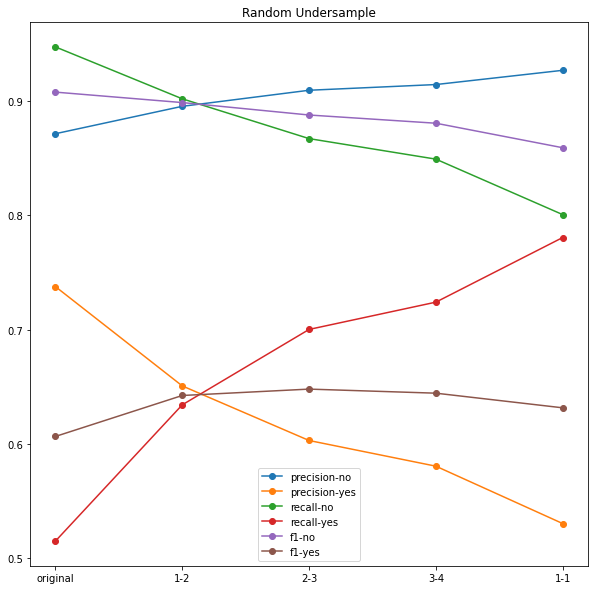

In [85]:
precisons1_log_under = []
precisons0_log_under = []
recalls1_log_under = []
recalls0_log_under = []
f1s1_log_under = []
f1s0_log_under = []
precisons0_log_under.append(original_log_score[0][0])
precisons1_log_under.append(original_log_score[0][1])
recalls0_log_under.append(original_log_score[1][0])
recalls1_log_under.append(original_log_score[1][1])
f1s0_log_under.append(original_log_score[2][0])
f1s1_log_under.append(original_log_score[2][1])
for i in range(11,7, -1):
    X_train_resampled = np.load('datasets/{}'.format(datasets[2*i]))
    y_train_resampled = np.load('datasets/{}'.format(datasets[2*i+1]))
    print(datasets[2*i])
    print(datasets[2*i + 1])
    model = LogisticRegression(C=0.5, max_iter=10000, random_state=0)
    model.fit(X_train_resampled, y_train_resampled)
    # model = LogisticRegression(C=0.5, max_iter=10000, random_state=0)
    y_pred = model.predict(X_test_transformed)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0_log_under.append(score[0][0])
    precisons1_log_under.append(score[0][1])
    recalls0_log_under.append(score[1][0])
    recalls1_log_under.append(score[1][1])
    f1s0_log_under.append(score[2][0])
    f1s1_log_under.append(score[2][1])
    print(score)
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0_log_under,'-o')
plt.plot(iter, precisons1_log_under,'-o')
plt.plot(iter, recalls0_log_under,'-o')
plt.plot(iter, recalls1_log_under,'-o')
plt.plot(iter, f1s0_log_under,'-o')
plt.plot(iter, f1s1_log_under,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Random Undersample')

##### Evaluate on subdata

In [ ]:
list_data = sorted(os.listdir('sub_data'))

In [ ]:
list_data

['X_test_origin.csv',
 'X_train.csv',
 'X_train_big.csv',
 'X_train_drop_miss.csv',
 'X_train_drop_relate.csv',
 'X_train_medium.csv',
 'X_train_small.csv',
 'y_test_origin.csv',
 'y_train.csv',
 'y_train_big.csv',
 'y_train_drop_miss.csv',
 'y_train_drop_relate.csv',
 'y_train_medium.csv',
 'y_train_small.csv']

In [ ]:

X_test_origin = pd.read_csv('sub_data/X_test_origin.csv')
y_test_origin = pd.read_csv('sub_data/y_test_origin.csv')
X_train_origin =  pd.read_csv('sub_data/X_train.csv')
y_train_origin =  pd.read_csv('sub_data/y_train.csv')
X_train_big =  pd.read_csv('sub_data/X_train_big.csv')
y_train_big =  pd.read_csv('sub_data/y_train_big.csv')
X_train_medium =  pd.read_csv('sub_data/X_train_medium.csv')
y_train_medium =  pd.read_csv('sub_data/y_train_medium.csv')
X_train_small =  pd.read_csv('sub_data/X_train_small.csv')
y_train_small =  pd.read_csv('sub_data/y_train_small.csv')
X_train_drop_miss = pd.read_csv('sub_data/X_train_drop_miss.csv')
y_train_drop_miss = pd.read_csv('sub_data/y_train_drop_miss.csv')
X_train_drop_relate = pd.read_csv('sub_data/X_train_drop_relate.csv')
y_train_drop_relate = pd.read_csv('sub_data/y_train_drop_relate.csv')

In [ ]:
X_train_drop_relate.shape 

(113754, 118)

In [ ]:
X_train_drop_miss.shape

(113754, 115)

In [ ]:
X_test_origin.drop(['Unnamed: 0'], inplace=True, axis=1)
y_test_origin.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_origin.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_origin.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_medium.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_medium.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_small.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_small.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_drop_miss.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_drop_miss.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_drop_relate.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_drop_relate.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
X_test_drop_miss = X_test_origin.drop(['Evaporation'], axis=1)
X_test_drop_miss.drop('Sunshine', axis = 1, inplace=True)
X_test_drop_miss.drop('Cloud9am', axis = 1,inplace=True)
X_test_drop_miss.drop('Cloud3pm', axis = 1,inplace=True)
X_test_drop_relate = X_test_origin.drop(['Humidity3pm'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
y_test_origin = le.fit_transform(y_test_origin)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_test_origin

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
train_test_pairs = [(X_train_origin, y_train_origin, X_test, y_test_origin), 
                    (X_train_medium, y_train_medium, X_test, y_test_origin),
                    (X_train_small, y_train_small, X_test, y_test_origin),
                    (X_train_drop_miss, y_train_drop_miss, X_test_drop_miss, y_test_origin),
                    (X_train_drop_relate, y_train_drop_relate, X_test_drop_relate, y_test_origin)] 

(113754, 118)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.94775003, 0.51318267]), array([0.87083611, 0.73931721]), array([0.9076666 , 0.60583604]), array([24016,  4423]))
--------------------------------------------------
(79627, 118)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.94716092, 0.49168236]), array([0.86582436, 0.72877413]), array([0.90466812, 0.58719895]), array([24140,  4299]))
--------------------------------------------------
(22751, 118)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.93954774, 0.53405524]), array([0.87473631, 0.71838716]), array([0.9059844, 0.6126564]), array([23702,  4737]))
--------------------------------------------------
(113754, 114)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.95812752, 0.46516008]), array([0.86118692, 0.76234568]), array([0.90707452, 0.57777778]), array([24551,  3888]))
--------------------------------------------------
(113754, 117)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.95667739, 0.42906466]), array([0.85300416, 0.74092141]), array([0.90187116, 0.54343073]), array([24749,  3690]))
--------------------------------------------------


Text(0.5, 1.0, 'Subdatasets')

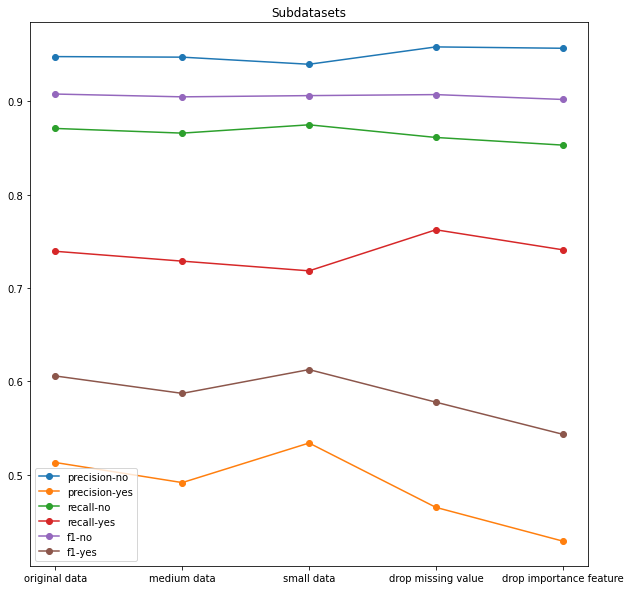

In [ ]:
subdata_models = []
subdata_scores = []
precisons1 = []
precisons0 = []
recalls1 = []
recalls0 = []
f1s1 = []
f1s0 = []
for i in range(5):
    X_train_sub = train_test_pairs[i][0]
    y_train_sub = train_test_pairs[i][1]
    X_test_sub = train_test_pairs[i][2]
    y_test_sub = train_test_pairs[i][3]
    print(X_train_sub.shape)
    y_train_sub = le.transform(y_train_sub)
    model = LogisticRegression(C=0.5, max_iter=10000, random_state=0)
    model.fit(X_train_sub,y_train_sub)
    subdata_models.append(model)
    y_pred = model.predict(X_test_sub)
    score = precision_recall_fscore_support(y_pred, y_test_sub)
    subdata_scores.append(score)
    precisons0.append(score[0][0])
    precisons1.append(score[0][1])
    recalls0.append(score[1][0])
    recalls1.append(score[1][1])
    f1s0.append(score[2][0])
    f1s1.append(score[2][1])
    print(score)
    print('-'*50)


iter =['original data', 'medium data', 'small data', 'drop missing value', 'drop importance feature']
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0,'o-')
plt.plot(iter, precisons1, 'o-')
plt.plot(iter, recalls0, 'o-')
plt.plot(iter, recalls1, 'o-')
plt.plot(iter, f1s0, 'o-')
plt.plot(iter, f1s1, 'o-')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Subdatasets')

#### SVM

###### Evaluate on test set

Best poly params: **gamma** = 'scale', **C** = 1.0, **degree** = 2

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
import os 
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
best_poly_model = SVC(kernel='poly', gamma='scale', C=1.0, degree=2)

In [ ]:
y_pred = best_poly_model.predict(X_test_transformed)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22067
         Yes       0.79      0.50      0.61      6372

    accuracy                           0.86     28439
   macro avg       0.83      0.73      0.76     28439
weighted avg       0.85      0.86      0.85     28439



In [ ]:
datasets = os.listdir('datasets')

In [ ]:
datasets 

['X_train_ros_11.npy',
 'y_train_ros_11.npy',
 'X_train_ros_34.npy',
 'y_train_ros_34.npy',
 'X_train_ros_23.npy',
 'y_train_ros_23.npy',
 'X_train_ros_12.npy',
 'y_train_ros_12.npy',
 'X_train_smote_11.npy',
 'y_train_smote_11.npy',
 'X_train_smote_34.npy',
 'y_train_smote_34.npy',
 'X_train_smote_23.npy',
 'y_train_smote_23.npy',
 'X_train_smote_12.npy',
 'y_train_smote_12.npy',
 'X_train_rus_11.npy',
 'y_train_rus_11.npy',
 'X_train_rus_34.npy',
 'y_train_rus_34.npy',
 'X_train_rus_23.npy',
 'y_train_rus_23.npy',
 'X_train_rus_12.npy',
 'y_train_rus_12.npy',
 'X_train_tomek.npy',
 'y_train_tomek.npy',
 'X_train_enn_all.npy',
 'y_train_enn_all.npy',
 'X_train_origin.csv']

In [ ]:
resampled_models = []

for i in tqdm(range(8, 28, 2)):
    best_svm = SVC(kernel='poly', degree=2)
    print()
    print('Loading data from {}'.format(datasets[i]))
    X_train_resampled = np.load(os.path.join('datasets', datasets[i]))
    print('Loading labels from {}'.format(datasets[i + 1]))
    y_train_resampled = np.load(os.path.join('datasets', datasets[i+1]))
    _ = best_svm.fit(X_train_resampled, y_train_resampled)
    y_pred = best_svm.predict(X_test_transformed)
    target_names = ['No', 'Yes']
    print(classification_report(y_test, y_pred, target_names=target_names))
    filename = 'resampled_model_{}.pkl'.format(datasets[i])
    print('Saving model fit on {} to resampled_models'.format(datasets[i]))
    with open(os.path.join('resampled_models', filename), 'wb') as f:
        pickle.dump(best_svm, f)
    resampled_models.append(best_svm)
    
    

  0%|          | 0/10 [00:00<?, ?it/s]


Loading data from X_train_smote_11.npy
Loading labels from y_train_smote_11.npy
              precision    recall  f1-score   support

          No       0.92      0.85      0.88     22067
         Yes       0.59      0.76      0.67      6372

    accuracy                           0.83     28439
   macro avg       0.76      0.80      0.77     28439
weighted avg       0.85      0.83      0.84     28439

Saving model fit on X_train_smote_11.npy to resampled_models


 10%|█         | 1/10 [1:13:47<11:04:05, 4427.26s/it]


Loading data from X_train_smote_34.npy
Loading labels from y_train_smote_34.npy


 20%|██        | 2/10 [2:11:08<9:10:51, 4131.50s/it] 

              precision    recall  f1-score   support

          No       0.92      0.88      0.90     22067
         Yes       0.63      0.72      0.67      6372

    accuracy                           0.84     28439
   macro avg       0.77      0.80      0.78     28439
weighted avg       0.85      0.84      0.85     28439

Saving model fit on X_train_smote_34.npy to resampled_models

Loading data from X_train_smote_23.npy
Loading labels from y_train_smote_23.npy


 30%|███       | 3/10 [3:03:17<7:26:54, 3830.71s/it]

              precision    recall  f1-score   support

          No       0.91      0.89      0.90     22067
         Yes       0.64      0.70      0.67      6372

    accuracy                           0.85     28439
   macro avg       0.78      0.79      0.79     28439
weighted avg       0.85      0.85      0.85     28439

Saving model fit on X_train_smote_23.npy to resampled_models

Loading data from X_train_smote_12.npy
Loading labels from y_train_smote_12.npy


 40%|████      | 4/10 [3:44:46<5:42:48, 3428.07s/it]

              precision    recall  f1-score   support

          No       0.90      0.92      0.91     22067
         Yes       0.69      0.65      0.67      6372

    accuracy                           0.86     28439
   macro avg       0.80      0.78      0.79     28439
weighted avg       0.85      0.86      0.86     28439

Saving model fit on X_train_smote_12.npy to resampled_models

Loading data from X_train_rus_11.npy
Loading labels from y_train_rus_11.npy


 50%|█████     | 5/10 [3:51:59<3:30:48, 2529.79s/it]

              precision    recall  f1-score   support

          No       0.93      0.82      0.87     22067
         Yes       0.56      0.80      0.66      6372

    accuracy                           0.81     28439
   macro avg       0.75      0.81      0.77     28439
weighted avg       0.85      0.81      0.82     28439

Saving model fit on X_train_rus_11.npy to resampled_models

Loading data from X_train_rus_34.npy
Loading labels from y_train_rus_34.npy


 60%|██████    | 6/10 [4:01:51<2:09:53, 1948.46s/it]

              precision    recall  f1-score   support

          No       0.92      0.86      0.89     22067
         Yes       0.61      0.74      0.67      6372

    accuracy                           0.84     28439
   macro avg       0.77      0.80      0.78     28439
weighted avg       0.85      0.84      0.84     28439

Saving model fit on X_train_rus_34.npy to resampled_models

Loading data from X_train_rus_23.npy
Loading labels from y_train_rus_23.npy


 70%|███████   | 7/10 [4:12:46<1:18:00, 1560.18s/it]

              precision    recall  f1-score   support

          No       0.92      0.88      0.90     22067
         Yes       0.63      0.72      0.67      6372

    accuracy                           0.84     28439
   macro avg       0.77      0.80      0.78     28439
weighted avg       0.85      0.84      0.85     28439

Saving model fit on X_train_rus_23.npy to resampled_models

Loading data from X_train_rus_12.npy
Loading labels from y_train_rus_12.npy


 80%|████████  | 8/10 [4:27:33<45:16, 1358.23s/it]  

              precision    recall  f1-score   support

          No       0.90      0.92      0.91     22067
         Yes       0.69      0.65      0.67      6372

    accuracy                           0.86     28439
   macro avg       0.80      0.78      0.79     28439
weighted avg       0.85      0.86      0.85     28439

Saving model fit on X_train_rus_12.npy to resampled_models

Loading data from X_train_tomek.npy
Loading labels from y_train_tomek.npy


 90%|█████████ | 9/10 [4:52:28<23:19, 1399.46s/it]

              precision    recall  f1-score   support

          No       0.88      0.95      0.91     22067
         Yes       0.75      0.56      0.64      6372

    accuracy                           0.86     28439
   macro avg       0.82      0.75      0.78     28439
weighted avg       0.85      0.86      0.85     28439

Saving model fit on X_train_tomek.npy to resampled_models

Loading data from X_train_enn_all.npy
Loading labels from y_train_enn_all.npy


100%|██████████| 10/10 [5:04:31<00:00, 1827.15s/it]

              precision    recall  f1-score   support

          No       0.92      0.86      0.89     22067
         Yes       0.60      0.73      0.66      6372

    accuracy                           0.83     28439
   macro avg       0.76      0.80      0.78     28439
weighted avg       0.85      0.83      0.84     28439

Saving model fit on X_train_enn_all.npy to resampled_models


In [ ]:
RESAMPLED_DIR = 'resampled_models'

In [ ]:
resampled_models = []
for file in os.listdir(RESAMPLED_DIR):
    with open(os.path.join(RESAMPLED_DIR, file), 'rb') as f:
        resampled_models.append((file, pickle.load(f)))

In [ ]:
sorted(datasets)

['X_train_enn_all.npy',
 'X_train_origin.csv',
 'X_train_ros_11.npy',
 'X_train_ros_12.npy',
 'X_train_ros_23.npy',
 'X_train_ros_34.npy',
 'X_train_rus_11.npy',
 'X_train_rus_12.npy',
 'X_train_rus_23.npy',
 'X_train_rus_34.npy',
 'X_train_smote_11.npy',
 'X_train_smote_12.npy',
 'X_train_smote_23.npy',
 'X_train_smote_34.npy',
 'X_train_tomek.npy',
 'y_train_enn_all.npy',
 'y_train_ros_11.npy',
 'y_train_ros_12.npy',
 'y_train_ros_23.npy',
 'y_train_ros_34.npy',
 'y_train_rus_11.npy',
 'y_train_rus_12.npy',
 'y_train_rus_23.npy',
 'y_train_rus_34.npy',
 'y_train_smote_11.npy',
 'y_train_smote_12.npy',
 'y_train_smote_23.npy',
 'y_train_smote_34.npy',
 'y_train_tomek.npy']

In [ ]:
original_model = SVC(degree=2)
_ = original_model.fit(X_train_transformed, y_train)

In [ ]:
iter = ['original', '1-2', '2-3', '3-4', '1-1']

In [ ]:
resampled_models = sorted(resampled_models, key = lambda x: x[0])

In [ ]:
resampled_models

[('resampled_model_X_train_enn_all.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('resampled_model_X_train_ros_11.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('resampled_model_X_train_ros_12.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('resampled_model_X_train_ros_23.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_siz

In [ ]:
precisons1_ros = []
precisons0_ros = []
recalls1_ros = []
recalls0_ros = []
f1s1_ros = []
f1s0_ros = []

original_score = precision_recall_fscore_support(y_test, y_pred_svm)
precisons1_ros.append(original_score[0][1])
precisons0_ros.append(original_score[0][0])
recalls1_ros.append(original_score[1][1])
recalls0_ros.append(original_score[1][0])
f1s1_ros.append(original_score[2][1])
f1s0_ros.append(original_score[2][0])
for i in range(2,5):
    # X_train = np.load('datasets/{}'.format(list_data[2*i]))
    # y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
    # model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=7, min_samples_split=2, min_samples_leaf=9)
    # model.fit(X_train,y_train)
    model = resampled_models[i][1]
    print(resampled_models[i][0])
    y_pred = model.predict(X_test_transformed)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0_ros.append(score[0][0])
    precisons1_ros.append(score[0][1])
    recalls0_ros.append(score[1][0])
    recalls1_ros.append(score[1][1])
    f1s0_ros.append(score[2][0])
    f1s1_ros.append(score[2][1])
    print(score)

model = resampled_models[1][1]
print(resampled_models[1][0])
y_pred11 = model.predict(X_test_transformed)
score = precision_recall_fscore_support(y_test, y_pred11)
precisons0_ros.append(score[0][0])
precisons1_ros.append(score[0][1])
recalls0_ros.append(score[1][0])
recalls1_ros.append(score[1][1])
f1s0_ros.append(score[2][0])
f1s1_ros.append(score[2][1])


resampled_model_X_train_ros_12.npy.pkl
(array([0.90044987, 0.69088176]), array([0.91611909, 0.6492467 ]), array([0.9082169 , 0.66941748]), array([22067,  6372]))
resampled_model_X_train_ros_23.npy.pkl
(array([0.91696462, 0.64137547]), array([0.8832646 , 0.72300691]), array([0.89979918, 0.67974917]), array([22067,  6372]))
resampled_model_X_train_ros_34.npy.pkl
(array([0.92156014, 0.62006278]), array([0.86835546, 0.74403641]), array([0.89416706, 0.67641604]), array([22067,  6372]))
resampled_model_X_train_ros_11.npy.pkl


Text(0.5, 1.0, 'Random OverSamples')

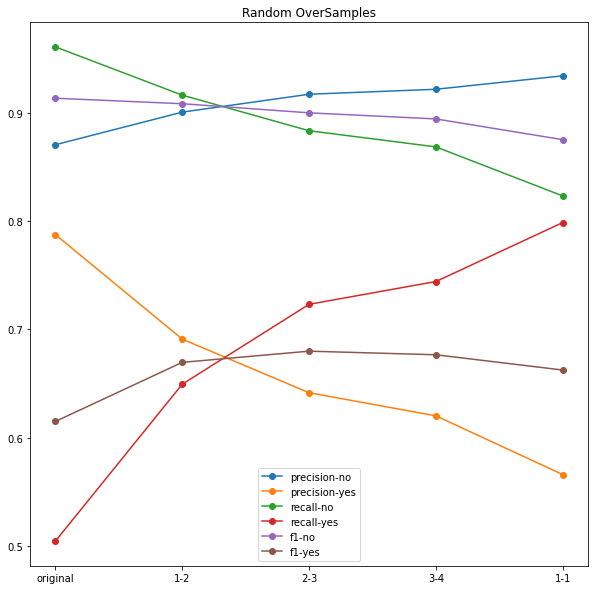

In [ ]:

plt.figure(figsize=(10,10))
plt.plot(iter,precisons0_ros,'-o')
plt.plot(iter, precisons1_ros,'-o')
plt.plot(iter, recalls0_ros,'-o')
plt.plot(iter, recalls1_ros,'-o')
plt.plot(iter, f1s0_ros,'-o')
plt.plot(iter, f1s1_ros,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Random OverSamples')

In [ ]:
smote_results = {'precisions1': precisons1_smote, 'precisions0': precisons0_smote, 'recalls1':recalls1_smote, 'recalls0': recalls0_smote, 'f1s1': f1s1_smote, 'f1s0': f1s0_smote}
with open('resampled_results/svm/smote_results.pkl', 'wb') as f:
    pickle.dump(smote_results, f)

NameError: ignored

In [ ]:
rus_results = {'precisions1': precisons1_under, 'precisions0': precisons0_under, 'recalls1':recalls1_under, 'recalls0': recalls0_under, 'f1s1': f1s1_under, 'f1s0': f1s0_under}
with open('resampled_results/svm/rus_results.pkl', 'wb') as f:
    pickle.dump(rus_results, f)

In [ ]:
# with open('resampled_results/svm/ros_results.pkl', 'rb') as f:
#     ros_results = pickle.load(f)
with open('resampled_results/svm/smote_results.pkl', 'rb') as f:
    smote_results = pickle.load(f)
with open('resampled_results/svm/rus_results.pkl', 'rb') as f:
    rus_results = pickle.load(f)

In [ ]:
resampled_models

[('resampled_model_X_train_enn_all.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('resampled_model_X_train_ros_11.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('resampled_model_X_train_ros_12.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('resampled_model_X_train_ros_23.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_siz

resampled_model_X_train_smote_11.npy.pkl
(array([0.84750986, 0.76177024]), array([0.92492582, 0.5905828 ]), array([0.88452716, 0.66534165]), array([20220,  8219]))
resampled_model_X_train_smote_34.npy.pkl
(array([0.87624054, 0.72222222]), array([0.91613759, 0.62757398]), array([0.89574503, 0.67157972]), array([21106,  7333]))
resampled_model_X_train_smote_23.npy.pkl
(array([0.88838537, 0.70150659]), array([0.91155956, 0.64474254]), array([0.89982329, 0.67192785]), array([21506,  6933]))
resampled_model_X_train_smote_12.npy.pkl
(array([0.91716137, 0.65112994]), array([0.90103286, 0.69416095]), array([0.90902558, 0.67195724]), array([22462,  5977]))


Text(0.5, 1.0, 'Smote')

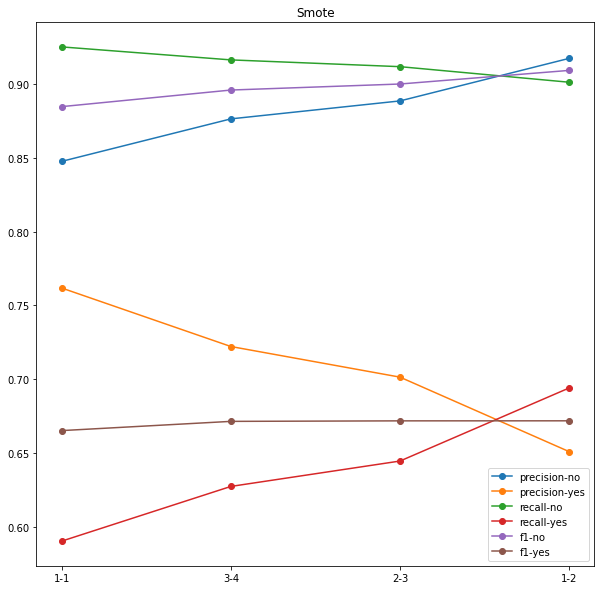

In [ ]:
# precisons1_smote = []
# precisons0_smote = []
# recalls1_smote = []
# recalls0_smote = []
# f1s1_smote = []
# f1s0_smote = []
# original_score = precision_recall_fscore_support(y_pred_svm, y_test)
# precisons1_ros.append(original_score[0][1])
# precisons0_ros.append(original_score[0][0])
# recalls1_ros.append(original_score[1][1])
# recalls0_ros.append(original_score[1][0])
# f1s1_ros.append(original_score[2][1])
# f1s0_ros.append(original_score[2][0])
# for i in range(4,8):
#     # X_train = np.load('datasets/{}'.format(list_data[2*i]))
#     # y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
#     # model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=7, min_samples_split=2, min_samples_leaf=9)
#     # model.fit(X_train,y_train)
#     print(resampled_models[i][0])
#     model = resampled_models[i][1]
#     y_pred = model.predict(X_test_transformed)
#     score = precision_recall_fscore_support(y_pred, y_test)
#     precisons0_smote.append(score[0][0])
#     precisons1_smote.append(score[0][1])
#     recalls0_smote.append(score[1][0])
#     recalls1_smote.append(score[1][1])
#     f1s0_smote.append(score[2][0])
#     f1s1_smote.append(score[2][1])
#     print(score)
# plt.figure(figsize=(10,10))
# plt.plot(iter,precisons0_smote,'-o')
# plt.plot(iter, precisons1_smote,'-o')
# plt.plot(iter, recalls0_smote,'-o')
# plt.plot(iter, recalls1_smote,'-o')
# plt.plot(iter, f1s0_smote,'-o')
# plt.plot(iter, f1s1_smote,'-o')
# plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
# plt.title('Smote')

In [ ]:
smote_results

{'f1s0': [0.8845271596471729,
  0.8957450258263266,
  0.8998232850618502,
  0.9090255788362639],
 'f1s1': [0.6653416489616888,
  0.6715797154323239,
  0.6719278466741827,
  0.6719572435014981],
 'precisions0': [0.8475098563465808,
  0.8762405401731092,
  0.8883853718221779,
  0.9171613721847102],
 'precisions1': [0.7617702448210922,
  0.7222222222222222,
  0.7015065913370998,
  0.6511299435028248],
 'recalls0': [0.9249258160237389,
  0.916137591206292,
  0.9115595647726216,
  0.9010328554892708],
 'recalls1': [0.5905827959605792,
  0.6275739806354834,
  0.6447425356988317,
  0.6941609503095199]}

In [ ]:

precisons1_smote = [original_score[0][1]] + smote_results['recalls1'][::-1]
precisons0_smote = [original_score[0][0]] + smote_results['recalls0'][::-1]
recalls1_smote = [original_score[1][1]] + smote_results['precisions1'][::-1]
recalls0_smote = [original_score[1][0]] + smote_results['precisions0'][::-1]
f1s1_smote = [original_score[2][1]] + smote_results['f1s1'][::-1]
f1s0_smote = [original_score[2][0]] + smote_results['f1s0'][::-1]

Text(0.5, 1.0, 'Smote')

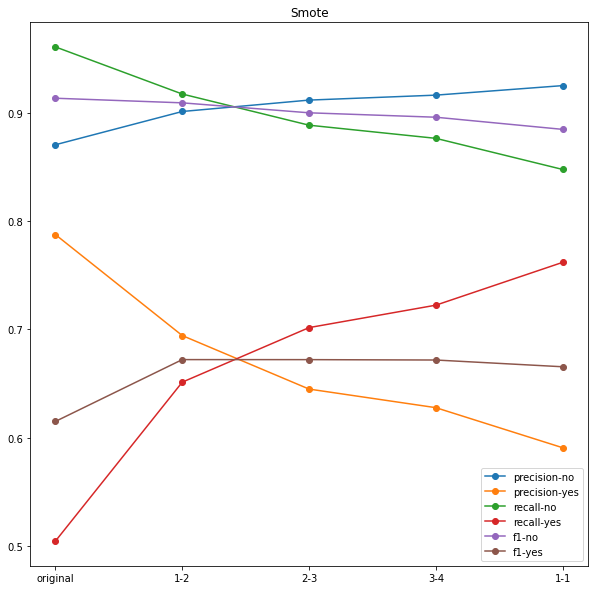

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0_smote,'-o')
plt.plot(iter, precisons1_smote,'-o')
plt.plot(iter, recalls0_smote,'-o')
plt.plot(iter, recalls1_smote,'-o')
plt.plot(iter, f1s0_smote,'-o')
plt.plot(iter, f1s1_smote,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Smote')

resampled_model_X_train_smote_11.npy.pkl
(array([0.84750986, 0.76177024]), array([0.92492582, 0.5905828 ]), array([0.88452716, 0.66534165]), array([20220,  8219]))
resampled_model_X_train_smote_34.npy.pkl
(array([0.87624054, 0.72222222]), array([0.91613759, 0.62757398]), array([0.89574503, 0.67157972]), array([21106,  7333]))
resampled_model_X_train_smote_23.npy.pkl
(array([0.88838537, 0.70150659]), array([0.91155956, 0.64474254]), array([0.89982329, 0.67192785]), array([21506,  6933]))
resampled_model_X_train_smote_12.npy.pkl
(array([0.91716137, 0.65112994]), array([0.90103286, 0.69416095]), array([0.90902558, 0.67195724]), array([22462,  5977]))


Text(0.5, 1.0, 'Smote')

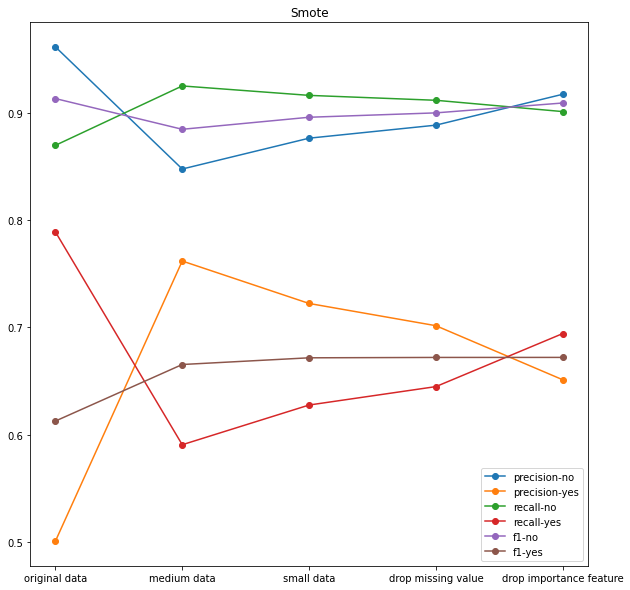

In [ ]:
# precisons1_smote = []
# precisons0_smote = []
# recalls1_smote = []
# recalls0_smote = []
# f1s1_smote = []
# f1s0_smote = []
# precisons0_smote.append(0.96129968)
# precisons1_smote.append(0.50078468)
# recalls0_smote.append(0.86959908)
# recalls1_smote.append(0.78887515)
# f1s0_smote.append(0.91315297)
# f1s1_smote.append(0.6126524)
# for i in range(4,8):
#     # X_train = np.load('datasets/{}'.format(list_data[2*i]))
#     # y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
#     # model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=7, min_samples_split=2, min_samples_leaf=9)
#     # model.fit(X_train,y_train)
#     print(resampled_models[i][0])
#     model = resampled_models[i][1]
#     y_pred = model.predict(X_test_transformed)
#     score = precision_recall_fscore_support(y_pred, y_test)
#     precisons0_smote.append(score[0][0])
#     precisons1_smote.append(score[0][1])
#     recalls0_smote.append(score[1][0])
#     recalls1_smote.append(score[1][1])
#     f1s0_smote.append(score[2][0])
#     f1s1_smote.append(score[2][1])
#     print(score)
# plt.figure(figsize=(10,10))
# plt.plot(iter,precisons0_smote,'-o')
# plt.plot(iter, precisons1_smote,'-o')
# plt.plot(iter, recalls0_smote,'-o')
# plt.plot(iter, recalls1_smote,'-o')
# plt.plot(iter, f1s0_smote,'-o')
# plt.plot(iter, f1s1_smote,'-o')
# plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
# plt.title('Smote')

resampled_model_X_train_rus_11.npy.pkl
(array([0.81823537, 0.79896422]), array([0.93375394, 0.55932762]), array([0.87218626, 0.65800698]), array([19337,  9102]))
resampled_model_X_train_rus_34.npy.pkl
(array([0.86495672, 0.74340866]), array([0.92109835, 0.61383957]), array([0.89214518, 0.67243949]), array([20722,  7717]))
resampled_model_X_train_rus_23.npy.pkl
(array([0.87959396, 0.71814187]), array([0.91530699, 0.63265588]), array([0.89709519, 0.67269386]), array([21206,  7233]))
resampled_model_X_train_rus_12.npy.pkl
(array([0.91670821, 0.64736347]), array([0.9000267 , 0.69176589]), array([0.90829087, 0.66882854]), array([22476,  5963]))


Text(0.5, 1.0, 'Random Undersample')

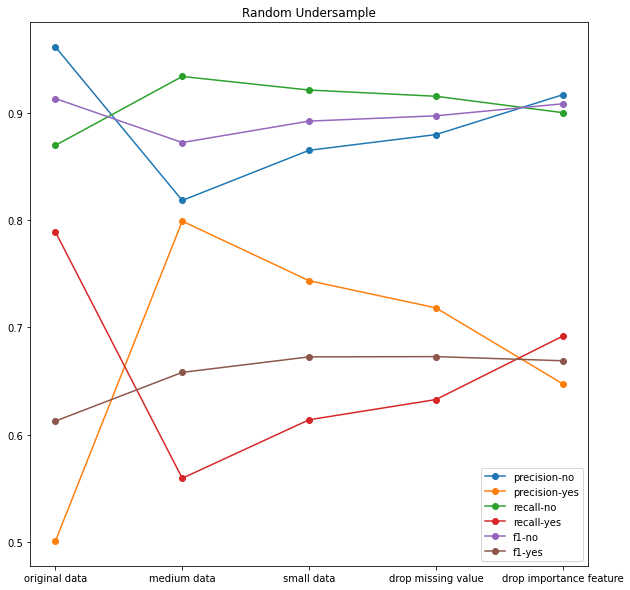

In [ ]:
# precisons1_under = []
# precisons0_under = []
# recalls1_under = []
# recalls0_under = []
# f1s1_under = []
# f1s0_under = []
# precisons0_under.append(0.96129968)
# precisons1_under.append(0.50078468)
# recalls0_under.append(0.86959908)
# recalls1_under.append(0.78887515)
# f1s0_under.append(0.91315297)
# f1s1_under.append(0.6126524)
# for i in range(8,12):
#     # X_train = np.load('datasets/{}'.format(list_data[2*i]))
#     # y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
#     # model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=7, min_samples_split=2, min_samples_leaf=9)
#     # model.fit(X_train,y_train)
#     print(resampled_models[i][0])
#     model = resampled_models[i][1]
#     y_pred = model.predict(X_test_transformed)
#     score = precision_recall_fscore_support(y_pred, y_test)
#     precisons0_under.append(score[0][0])
#     precisons1_under.append(score[0][1])
#     recalls0_under.append(score[1][0])
#     recalls1_under.append(score[1][1])
#     f1s0_under.append(score[2][0])
#     f1s1_under.append(score[2][1])
#     print(score)
# plt.figure(figsize=(10,10))
# plt.plot(iter,precisons0_under,'-o')
# plt.plot(iter, precisons1_under,'-o')
# plt.plot(iter, recalls0_under,'-o')
# plt.plot(iter, recalls1_under,'-o')
# plt.plot(iter, f1s0_under,'-o')
# plt.plot(iter, f1s1_under,'-o')
# plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
# plt.title('Random Undersample')

In [ ]:
precisons1_under = [original_score[0][1]] + rus_results['recalls1'][::-1]
precisons0_under = [original_score[0][0]] + rus_results['recalls0'][::-1]
recalls1_under = [original_score[1][1]] + rus_results['precisions1'][::-1]
recalls0_under = [original_score[1][0]] + rus_results['precisions0'][::-1]
f1s1_under = [original_score[2][1]] + rus_results['f1s1'][::-1]
f1s0_under = [original_score[2][0]] + rus_results['f1s0'][::-1]

Text(0.5, 1.0, 'Random Undersample')

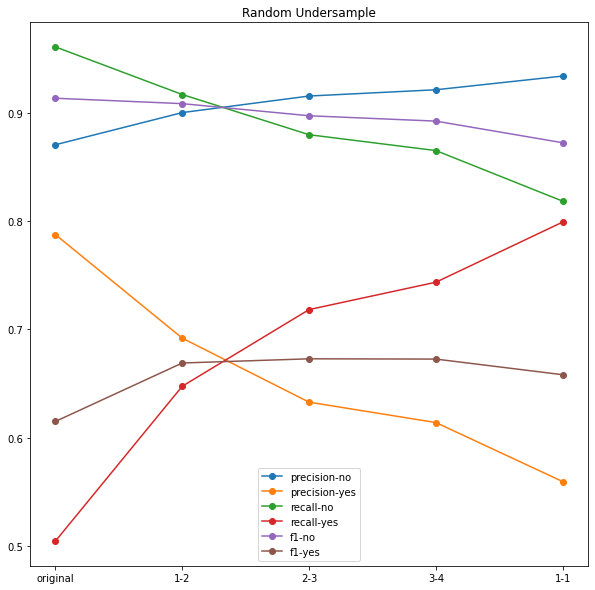

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0_under,'-o')
plt.plot(iter, precisons1_under,'-o')
plt.plot(iter, recalls0_under,'-o')
plt.plot(iter, recalls1_under,'-o')
plt.plot(iter, f1s0_under,'-o')
plt.plot(iter, f1s1_under,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Random Undersample')

###### Evaluate on subdata

In [ ]:
list_data = sorted(os.listdir('sub_data'))

In [ ]:
list_data

['X_test_origin.csv',
 'X_train.csv',
 'X_train_big.csv',
 'X_train_drop_miss.csv',
 'X_train_drop_relate.csv',
 'X_train_medium.csv',
 'X_train_small.csv',
 'y_test_origin.csv',
 'y_train.csv',
 'y_train_big.csv',
 'y_train_drop_miss.csv',
 'y_train_drop_relate.csv',
 'y_train_medium.csv',
 'y_train_small.csv']

In [ ]:

X_test = pd.read_csv('sub_data/X_test_origin.csv')
y_test = pd.read_csv('sub_data/y_test_origin.csv')
X_train_origin =  pd.read_csv('sub_data/X_train.csv')
y_train_origin =  pd.read_csv('sub_data/y_train.csv')
X_train_big =  pd.read_csv('sub_data/X_train_big.csv')
y_train_big =  pd.read_csv('sub_data/y_train_big.csv')
X_train_medium =  pd.read_csv('sub_data/X_train_medium.csv')
y_train_medium =  pd.read_csv('sub_data/y_train_medium.csv')
X_train_small =  pd.read_csv('sub_data/X_train_small.csv')
y_train_small =  pd.read_csv('sub_data/y_train_small.csv')
X_train_drop_miss = pd.read_csv('sub_data/X_train_drop_miss.csv')
y_train_drop_miss = pd.read_csv('sub_data/y_train_drop_miss.csv')
X_train_drop_relate = pd.read_csv('sub_data/X_train_drop_relate.csv')
y_train_drop_relate = pd.read_csv('sub_data/y_train_drop_relate.csv')

In [ ]:
X_train_drop_relate.shape 

(113754, 118)

In [ ]:
X_train_drop_miss.shape

(113754, 115)

In [ ]:
X_train_medium.head()

Unnamed: 0   MinTemp   MaxTemp  Rainfall  ...  SW.2  W.2  WNW.2  WSW.2
0           0  0.490566  0.550095  0.003264  ...   0.0  0.0    0.0    0.0
1           1  0.396226  0.389414  0.000000  ...   0.0  1.0    0.0    0.0
2           2  0.471698  0.480151  0.000000  ...   0.0  0.0    0.0    0.0
3           3  0.558962  0.483932  0.003264  ...   0.0  0.0    1.0    0.0
4           4  0.377358  0.379962  0.000000  ...   0.0  0.0    0.0    1.0

[5 rows x 119 columns]

In [ ]:
X_test.drop(['Unnamed: 0'], inplace=True, axis=1)
y_test.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_origin.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_origin.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_medium.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_medium.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_small.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_small.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_drop_miss.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_drop_miss.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_drop_relate.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_drop_relate.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
X_test_drop_miss = X_test.drop(['Evaporation'], axis=1)
X_test_drop_miss.drop('Sunshine', axis = 1, inplace=True)
X_test_drop_miss.drop('Cloud9am', axis = 1,inplace=True)
X_test_drop_miss.drop('Cloud3pm', axis = 1,inplace=True)
X_test_drop_relate = X_test.drop(['Humidity3pm'], axis=1)

In [ ]:
train_test_pairs = [(X_train_origin, y_train_origin, X_test, y_test), 
                    (X_train_medium, y_train_medium, X_test, y_test),
                    (X_train_small, y_train_small, X_test, y_test),
                    (X_train_drop_miss, y_train_drop_miss, X_test_drop_miss, y_test),
                    (X_train_drop_relate, y_train_drop_relate, X_test_drop_relate, y_test)] 

(113754, 118)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.96129968, 0.50078468]), array([0.86959908, 0.78887515]), array([0.91315297, 0.6126524 ]), array([24394,  4045]))
--------------------------------------------------
(79627, 118)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.96510627, 0.47394852]), array([0.86401071, 0.79683377]), array([0.91176471, 0.59437119]), array([24649,  3790]))
--------------------------------------------------
(22751, 118)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.95839942, 0.49231011]), array([0.86733104, 0.77361282]), array([0.91059396, 0.60170711]), array([24384,  4055]))
--------------------------------------------------
(113754, 114)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.96891286, 0.48634652]), array([0.86724264, 0.81875826]), array([0.91526294, 0.61021955]), array([24654,  3785]))
--------------------------------------------------
(113754, 117)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.96746273, 0.46406152]), array([0.86209821, 0.80462585]), array([0.91174649, 0.58863342]), array([24764,  3675]))
--------------------------------------------------


Text(0.5, 1.0, 'Subdatasets')

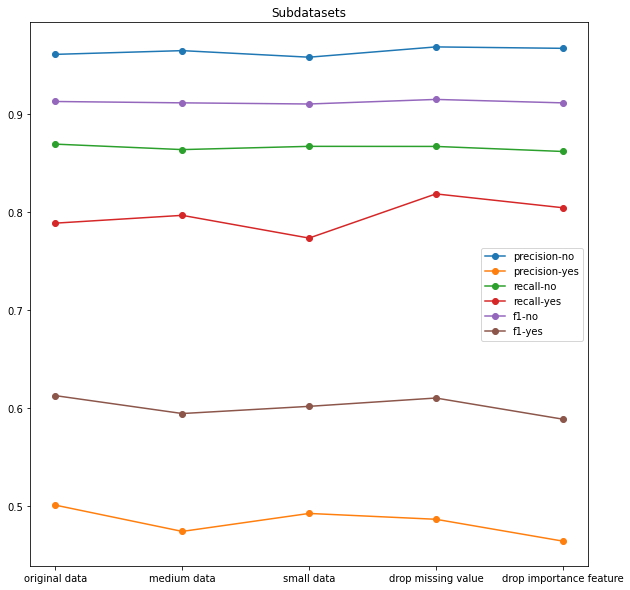

In [ ]:
subdata_models = []
subdata_scores = []
precisons1 = []
precisons0 = []
recalls1 = []
recalls0 = []
f1s1 = []
f1s0 = []
for i in range(5):
    X_train_sub = train_test_pairs[i][0]
    y_train_sub = train_test_pairs[i][1]
    X_test_sub = train_test_pairs[i][2]
    y_test_sub = train_test_pairs[i][3]
    print(X_train_sub.shape)
    model = SVC(kernel='poly', degree=2)
    model.fit(X_train_sub,y_train_sub)
    subdata_models.append(model)
    y_pred = model.predict(X_test_sub)
    score = precision_recall_fscore_support(y_pred, y_test_sub)
    subdata_scores.append(score)
    precisons0.append(score[0][0])
    precisons1.append(score[0][1])
    recalls0.append(score[1][0])
    recalls1.append(score[1][1])
    f1s0.append(score[2][0])
    f1s1.append(score[2][1])
    print(score)
    print('-'*50)


iter =['original data', 'medium data', 'small data', 'drop missing value', 'drop importance feature']
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0,'o-')
plt.plot(iter, precisons1, 'o-')
plt.plot(iter, recalls0, 'o-')
plt.plot(iter, recalls1, 'o-')
plt.plot(iter, f1s0, 'o-')
plt.plot(iter, f1s1, 'o-')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Subdatasets')

#### Decision Tree

##### Evaluate on resampled data

(array([0.87204278, 0.66765403]), array([0.92373227, 0.53060264]), array([0.89714361, 0.59129066]), array([22067,  6372]))
(array([0.88501868, 0.61386298]), array([0.891195  , 0.59902699]), array([0.8880961 , 0.60635425]), array([22067,  6372]))
(array([0.90282503, 0.53960275]), array([0.82983641, 0.69067797]), array([0.86479339, 0.60586454]), array([22067,  6372]))
(array([0.90552215, 0.52070322]), array([0.81220827, 0.70652856]), array([0.85633063, 0.59954721]), array([22067,  6372]))


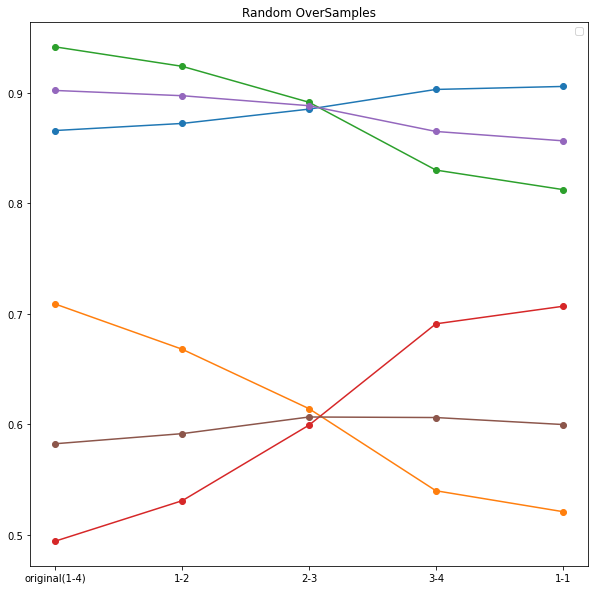

In [ ]:
precisons1 = []
precisons0 = []
recalls1 = []
recalls0 = []
f1s1 = []
f1s0 = []
model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
model.fit(X_train_origin,y_train_origin)
y_pred = model.predict(X_test)
score = precision_recall_fscore_support(y_test, y_pred)
precisons0.append(score[0][0])
precisons1.append(score[0][1])
recalls0.append(score[1][0])
recalls1.append(score[1][1])
f1s0.append(score[2][0])
f1s1.append(score[2][1])
plt.figure(figsize=(10,10))
for i in range(3,-1, -1):
    X_train = np.load('datasets/{}'.format(list_data[2*i]))
    y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
    model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
    model.fit(X_train_transformed ,y_train)
    y_pred = model.predict(X_test)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0.append(score[0][0])
    precisons1.append(score[0][1])
    recalls0.append(score[1][0])
    recalls1.append(score[1][1])
    f1s0.append(score[2][0])
    f1s1.append(score[2][1])
    print(score)
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Random OverSamples')
plt.plot(iter,precisons0,'-o')
plt.plot(iter, precisons1,'-o')
plt.plot(iter, recalls0,'-o')
plt.plot(iter, recalls1,'-o')
plt.plot(iter, f1s0,'-o')
plt.plot(iter, f1s1,'-o')

(array([0.88790069, 0.57685009]), array([0.86862736, 0.62021343]), array([0.87815829, 0.59774635]), array([22067,  6372]))
(array([0.89614213, 0.48049802]), array([0.78633253, 0.6844005 ]), array([0.83765387, 0.56460383]), array([22067,  6372]))
(array([0.90989195, 0.49653259]), array([0.78615127, 0.73038293]), array([0.84350765, 0.5911718 ]), array([22067,  6372]))
(array([0.90612352, 0.4871468 ]), array([0.78121176, 0.71971124]), array([0.8390441 , 0.58102116]), array([22067,  6372]))


Text(0.5, 1.0, 'Smote')

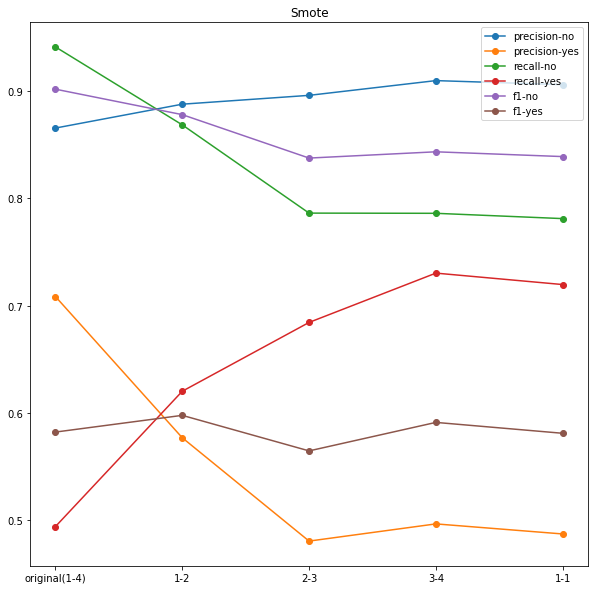

In [ ]:
precisons1 = []
precisons0 = []
recalls1 = []
recalls0 = []
f1s1 = []
f1s0 = []
model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
model.fit(X_train_origin,y_train_origin)
y_pred = model.predict(X_test)
score = precision_recall_fscore_support(y_test, y_pred)
precisons0.append(score[0][0])
precisons1.append(score[0][1])
recalls0.append(score[1][0])
recalls1.append(score[1][1])
f1s0.append(score[2][0])
f1s1.append(score[2][1])
for i in range(7,3,-1):
    X_train = np.load('datasets/{}'.format(list_data[2*i]))
    y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
    model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0.append(score[0][0])
    precisons1.append(score[0][1])
    recalls0.append(score[1][0])
    recalls1.append(score[1][1])
    f1s0.append(score[2][0])
    f1s1.append(score[2][1])
    print(score)
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0,'-o')
plt.plot(iter, precisons1,'-o')
plt.plot(iter, recalls0,'-o')
plt.plot(iter, recalls1,'-o')
plt.plot(iter, f1s0,'-o')
plt.plot(iter, f1s1,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Smote')

(array([0.8723844 , 0.65375024]), array([0.91820365, 0.53483992]), array([0.89470779, 0.588347  ]), array([22067,  6372]))
(array([0.87959583, 0.61392935]), array([0.89550007, 0.5754865 ]), array([0.8874767 , 0.59408667]), array([22067,  6372]))
(array([0.88360597, 0.61128172]), array([0.89101373, 0.59353421]), array([0.88729439, 0.60227725]), array([22067,  6372]))
(array([0.90788934, 0.51283776]), array([0.80309965, 0.717828  ]), array([0.85228557, 0.59826041]), array([22067,  6372]))


Text(0.5, 1.0, 'UnderSamples')

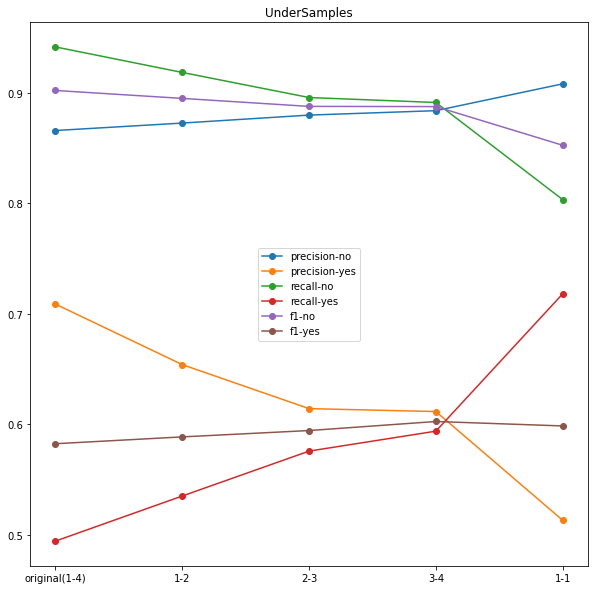

In [ ]:
precisons1 = []
precisons0 = []
recalls1 = []
recalls0 = []
f1s1 = []
f1s0 = []
model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
model.fit(X_train_origin,y_train_origin)
y_pred = model.predict(X_test)
score = precision_recall_fscore_support(y_test, y_pred)
precisons0.append(score[0][0])
precisons1.append(score[0][1])
recalls0.append(score[1][0])
recalls1.append(score[1][1])
f1s0.append(score[2][0])
f1s1.append(score[2][1])
for i in range(11,7,-1):
    X_train = np.load('datasets/{}'.format(list_data[2*i]))
    y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
    model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0.append(score[0][0])
    precisons1.append(score[0][1])
    recalls0.append(score[1][0])
    recalls1.append(score[1][1])
    f1s0.append(score[2][0])
    f1s1.append(score[2][1])
    print(score)
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0,'-o')
plt.plot(iter, precisons1,'-o')
plt.plot(iter, recalls0,'-o')
plt.plot(iter, recalls1,'-o')
plt.plot(iter, f1s0,'-o')
plt.plot(iter, f1s1,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('UnderSamples')

##### Evaluate on subdata

In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
clf.fit(X_train_origin,y_train_origin)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
precisons1 = []
precisons0 = []
recalls1 = []
recalls0 = []
f1s1 = []
f1s0 = []
for i in range(4,7):
    X_train = pd.read_csv('datasets/{}'.format(list_data[2*i]))
    y_train = pd.read_csv('datasets/{}'.format(list_data[2*i+1]))
    X_train.drop(['Unnamed: 0'], inplace=True, axis=1)
    y_train.drop(['Unnamed: 0'], inplace=True, axis=1)
    print(len(X_train))
    model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9, )
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = precision_recall_fscore_support(y_pred, y_test)
    precisons0.append(score[0][0])
    precisons1.append(score[0][1])
    recalls0.append(score[1][0])
    recalls1.append(score[1][1])
    f1s0.append(score[2][0])
    f1s1.append(score[2][1])
    print(score)


model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
model.fit(X_train_drop_miss,y_train_drop_miss )
y_pred = model.predict(X_test_drop_miss)
score = precision_recall_fscore_support(y_pred, y_test)
precisons0.append(score[0][0])
precisons1.append(score[0][1])
recalls0.append(score[1][0])
recalls1.append(score[1][1])
f1s0.append(score[2][0])
f1s1.append(score[2][1])


model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
model.fit(X_train_drop_relate,y_train_drop_relate )
y_pred = model.predict(X_test_drop_relate)
score = precision_recall_fscore_support(y_pred, y_test)
precisons0.append(score[0][0])
precisons1.append(score[0][1])
recalls0.append(score[1][0])
recalls1.append(score[1][1])
f1s0.append(score[2][0])
f1s1.append(score[2][1])


113754
(array([0.95160194, 0.47818581]), array([0.86330373, 0.74046173]), array([0.90530491, 0.58110041]), array([24324,  4115]))
79627
(array([0.95223637, 0.47457627]), array([0.86256722, 0.74153997]), array([0.90518653, 0.57875598]), array([24361,  4078]))
22751
(array([0.92346037, 0.49780289]), array([0.86428026, 0.65254063]), array([0.89289079, 0.56476453]), array([23578,  4861]))


Text(0.5, 1.0, 'Subdatasets')

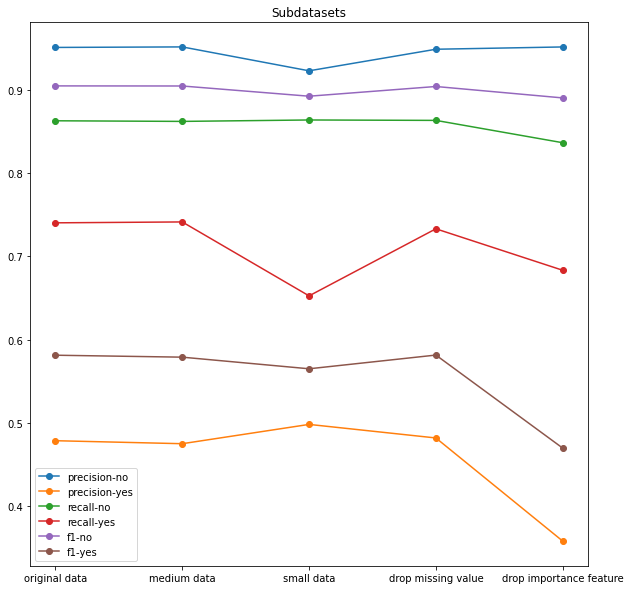

In [ ]:
iter =['original data', 'medium data', 'small data', 'drop missing value', 'drop importance feature']
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0,'o-')
plt.plot(iter, precisons1, 'o-')
plt.plot(iter, recalls0, 'o-')
plt.plot(iter, recalls1, 'o-')
plt.plot(iter, f1s0, 'o-')
plt.plot(iter, f1s1, 'o-')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Subdatasets')